# Read and summarize results

In [1]:
import os
import pickle
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyomo.environ as pyo
import PyComplexHeatmap as pch
from glycowork.motif.draw import GlycoDraw

In [2]:
mainDir = '/home/cabsel/gfa/'
inputDir = os.path.join(mainDir, 'inputfiles')

In [3]:
sys.path.insert(0, '/home/cabsel/gfa/')
# from gfapy.plotter import plot_fig, plot_meas
from gfapy.igfa_fitflux import parse_model, res_plotter

/home/cabsel/gfa/gfapy/igfa_fitflux.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
mainDir = '/home/cabsel/gfa/'
inputDir = os.path.join(mainDir, 'inputfiles')

## Read GFA model from Excel

Ent_Man7  Ex_Man7  Ex_Man6  Ex_Man5  Ex_G0-GlcNAc  Ex_G0  Ex_G0F  \
Glycoforms                                                                     
Man7             1.0     -1.0      0.0      0.0           0.0    0.0     0.0   
Man6             0.0      0.0     -1.0      0.0           0.0    0.0     0.0   
Man5             0.0      0.0      0.0     -1.0           0.0    0.0     0.0   
G0-GlcNAc        0.0      0.0      0.0      0.0          -1.0    0.0     0.0   
G0               0.0      0.0      0.0      0.0           0.0   -1.0     0.0   
G0F              0.0      0.0      0.0      0.0           0.0    0.0    -1.0   
G0F-GlcNAc       0.0      0.0      0.0      0.0           0.0    0.0     0.0   
G0F+GlcNAc       0.0      0.0      0.0      0.0           0.0    0.0     0.0   
G1a/b            0.0      0.0      0.0      0.0           0.0    0.0     0.0   
G1Fa/b           0.0      0.0      0.0      0.0           0.0    0.0     0.0   
G2F              0.0      0.0      0.0      0.0           0.0    0.0     0.0   
A1G1F            0.0      0.0      0.0      0.0           0.0    0.0     0.0   
A1G2F            0.0      0.0      0.0      0.0           0.0    0.0     0.0   

            Ex_G0F-GlcNAc  Ex_G0F+GlcNAc  Ex_G1a/b  ...  R8  R6  R7  R9 R10  \
Glycoforms                                          ...                       
Man7                  0.0            0.0       0.0  ...   0   0   0   0   0   
Man6                  0.0            0.0       0.0  ...   0   0   0   0   0   
Man5                  0.0            0.0       0.0  ...   0   0   0   0   0   
G0-GlcNAc             0.0            0.0       0.0  ...   0   0  -1   0   0   
G0                    0.0            0.0       0.0  ...   0  -1   0   0  -1   
G0F                   0.0            0.0       0.0  ...  -1   1   0   0   0   
G0F-GlcNAc           -1.0            0.0       0.0  ...   0   0   1   0   0   
G0F+GlcNAc            0.0           -1.0       0.0  ...   1   0   0   0   0   
G1a/b                 0.0            0.0      -1.0  ...   0   0   0  -1   1   
G1Fa/b                0.0            0.0       0.0  ...   0   0   0   1   0   
G2F                   0.0            0.0       0.0  ...   0   0   0   0   0   
A1G1F                 0.0            0.0       0.0  ...   0   0   0   0   0   
A1G2F                 0.0            0.0       0.0  ...   0   0   0   0   0   

           R11 R12 R13 R14 R15  
Glycoforms                      
Man7         0   0   0   0   0  
Man6         0   0   0   0   0  
Man5         0   0   0   0   0  
G0-GlcNAc    0   0   0   0   0  
G0           0   0   0   0   0  
G0F         -1   0   0   0   0  
G0F-GlcNAc   0   0   0   0   0  
G0F+GlcNAc   0   0   0   0   0  
G1a/b        0   0   0   0   0  
G1Fa/b       1  -1   0  -1   0  
G2F          0   1   0   0  -1  
A1G1F        0   0  -1   1   0  
A1G2F        0   0   1   0   1  

[13 rows x 29 columns]

Compartments                                          Structure
Glycoforms                                                                 
Man7           cis_golgi  {Man(1-?)}{Man(2-?)}Man(?)[Man(?)]Man(?)[Man(?...
Man6           cis_golgi  {Man(1-?)}Man(?)[Man(?)]Man(?)[Man(?)]Man(?)Gl...
Man5           cis_golgi  Man(?)[Man(?)]Man(?)[Man(?)]Man(?)GlcNAc(?)GlcNAc
G0-GlcNAc   medial_golgi       Man(?)[GlcNAc(?)Man(?)]Man(?)GlcNAc(?)GlcNAc
G0          medial_golgi  GlcNAc(?)Man(?)[GlcNAc(?)Man(?)]Man(?)GlcNAc(?...
G0F         medial_golgi  GlcNAc(?)Man(?)[GlcNAc(?)Man(?)]Man(?)GlcNAc(?...
G0F-GlcNAc  medial_golgi  Man(?)[GlcNAc(?)Man(?)]Man(?)GlcNAc(?)[Fuc(?)]...
G0F+GlcNAc  medial_golgi  GlcNAc(?)[GlcNAc(?)]Man(?)[GlcNAc(?)Man(?)]Man...
G1a/b        trans Golgi  {Gal(1-?)}GlcNAc(?)Man(?)[GlcNAc(?)Man(?)]Man(...
G1Fa/b       trans Golgi  {Gal(1-?)}GlcNAc(?)Man(?)[GlcNAc(?)Man(?)]Man(...
G2F          trans Golgi  Gal(?)GlcNAc(?)Man(?)[Gal(?)GlcNAc(?)Man(?)]Ma...
A1G1F        trans Golgi  {Neu5Ac(1-?)Gal()}GlcNAc(?)Man(?)[GlcNAc(?)Man...
A1G2F        trans Golgi  {Neu5Ac(1-?)}Gal(?)GlcNAc(?)Man(?)[Gal(?)GlcNA...

Reaction Description     Enzymes  \
Reaction ID                                                                    
Ent_Man7                                           Entry of Man7         NaN   
Ex_Man7                                        Secretion of Man7         NaN   
Ex_Man6                                        Secretion of Man6         NaN   
Ex_Man5                                        Secretion of Man5         NaN   
Ex_G0-GlcNAc                              Secretion of G0-GlcNAc         NaN   
Ex_G0                                            Secretion of G0         NaN   
Ex_G0F                                          Secretion of G0F         NaN   
Ex_G0F-GlcNAc                            Secretion of G0F-GlcNAc         NaN   
Ex_G0F+GlcNAc                            Secretion of G0F+GlcNAc         NaN   
Ex_G1a/b                                      Secretion of G1a/b         NaN   
Ex_G1Fa/b                                    Secretion of G1Fa/b         NaN   
Ex_G2F                                          Secretion of G2F         NaN   
Ex_A1G1F                                      Secretion of A1G1F         NaN   
Ex_A1G2F                                      Secretion of A1G2F         NaN   
R1                                          Man7 trimmed to Man6        ManI   
R2                                         Man 6 trimmed to Man5        ManI   
R3             Man5 undergoes trimming and GlcNAc addition to...  GnTI/ManII   
R4                                    GlcNAc addition to form G0       GnTII   
R5                                   GlcNAc addition to form G0F       GnTII   
R8                            GlcNAc addition to form G0F+GlcNAc       GnTIV   
R6                                     Fucosylation of N-glycans        FucT   
R7                                     Fucosylation of N-glycans        FucT   
R9                                     Fucosylation of N-glycans        FucT   
R10                                          Galactose addition         GalT   
R11                                          Galactose addition         GalT   
R12                                          Galactose addition         GalT   
R13                                          Galactose addition         GalT   
R14                                              Neu5Ac addition        SiaT   
R15                                              Neu5Ac addition        SiaT   

                           Enzyme Name                                 Notes  \
Reaction ID                                                                    
Ent_Man7                           NaN                                   NaN   
Ex_Man7                            NaN                                   NaN   
Ex_Man6                            NaN                                   NaN   
Ex_Man5                            NaN                                   NaN   
Ex_G0-GlcNAc                       NaN                                   NaN   
Ex_G0                              NaN                                   NaN   
Ex_G0F                             NaN                                   NaN   
Ex_G0F-GlcNAc                      NaN                                   NaN   
Ex_G0F+GlcNAc                      NaN                                   NaN   
Ex_G1a/b                           NaN                                   NaN   
Ex_G1Fa/b                          NaN                                   NaN   
Ex_G2F                             NaN                                   NaN   
Ex_A1G1F                           NaN                                   NaN   
Ex_A1G2F                           NaN                                   NaN   
R1                         Mannosidase                                   NaN   
R2                         Mannosidase                                   NaN   
R3                    Multiple enzymes       MGAT1 followed by MAN2A1/MAN2A2   
R4             Glucosaminyltransferase     

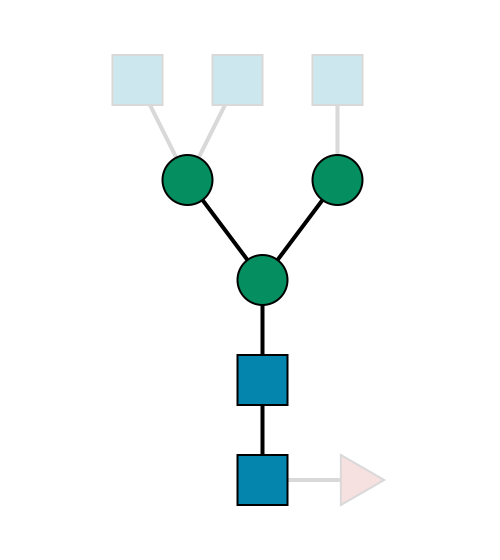

In [5]:
rxn_models = pd.read_excel(os.path.join(inputDir, 'Lee et al', 'Leeetal_model.xlsx'), sheet_name=None)
stoich_data = rxn_models['Stoichiometry'].iloc[1:, :].set_index("Glycoforms")
rxn_meta = rxn_models['Enzyme-Reaction Relations'].set_index("Reaction ID")

met_meta_cols = sorted(set(stoich_data.columns) - set(rxn_meta.index))
met_meta = stoich_data[met_meta_cols].copy()
stoich_data = stoich_data.drop(columns=met_meta_cols)

display(stoich_data)
display(met_meta)
display(rxn_meta)
display(GlycoDraw(met_meta.loc['G0F+GlcNAc', 'Structure'], show_linkage=False, vertical=True, highlight_motif = "Man(?)[Man(?)]Man(?)GlcNAc(?)GlcNAc"))

In [6]:
rxn_meta

Reaction Description     Enzymes  \
Reaction ID                                                                    
Ent_Man7                                           Entry of Man7         NaN   
Ex_Man7                                        Secretion of Man7         NaN   
Ex_Man6                                        Secretion of Man6         NaN   
Ex_Man5                                        Secretion of Man5         NaN   
Ex_G0-GlcNAc                              Secretion of G0-GlcNAc         NaN   
Ex_G0                                            Secretion of G0         NaN   
Ex_G0F                                          Secretion of G0F         NaN   
Ex_G0F-GlcNAc                            Secretion of G0F-GlcNAc         NaN   
Ex_G0F+GlcNAc                            Secretion of G0F+GlcNAc         NaN   
Ex_G1a/b                                      Secretion of G1a/b         NaN   
Ex_G1Fa/b                                    Secretion of G1Fa/b         NaN   
Ex_G2F                                          Secretion of G2F         NaN   
Ex_A1G1F                                      Secretion of A1G1F         NaN   
Ex_A1G2F                                      Secretion of A1G2F         NaN   
R1                                          Man7 trimmed to Man6        ManI   
R2                                         Man 6 trimmed to Man5        ManI   
R3             Man5 undergoes trimming and GlcNAc addition to...  GnTI/ManII   
R4                                    GlcNAc addition to form G0       GnTII   
R5                                   GlcNAc addition to form G0F       GnTII   
R8                            GlcNAc addition to form G0F+GlcNAc       GnTIV   
R6                                     Fucosylation of N-glycans        FucT   
R7                                     Fucosylation of N-glycans        FucT   
R9                                     Fucosylation of N-glycans        FucT   
R10                                          Galactose addition         GalT   
R11                                          Galactose addition         GalT   
R12                                          Galactose addition         GalT   
R13                                          Galactose addition         GalT   
R14                                              Neu5Ac addition        SiaT   
R15                                              Neu5Ac addition        SiaT   

                           Enzyme Name                                 Notes  \
Reaction ID                                                                    
Ent_Man7                           NaN                                   NaN   
Ex_Man7                            NaN                                   NaN   
Ex_Man6                            NaN                                   NaN   
Ex_Man5                            NaN                                   NaN   
Ex_G0-GlcNAc                       NaN                                   NaN   
Ex_G0                              NaN                                   NaN   
Ex_G0F                             NaN                                   NaN   
Ex_G0F-GlcNAc                      NaN                                   NaN   
Ex_G0F+GlcNAc                      NaN                                   NaN   
Ex_G1a/b                           NaN                                   NaN   
Ex_G1Fa/b                          NaN                                   NaN   
Ex_G2F                             NaN                                   NaN   
Ex_A1G1F                           NaN                                   NaN   
Ex_A1G2F                           NaN                                   NaN   
R1                         Mannosidase                                   NaN   
R2                         Mannosidase                                   NaN   
R3                    Multiple enzymes       MGAT1 followed by MAN2A1/MAN2A2   
R4             Glucosaminyltransferase     

In [7]:
pH_scales = ['lowpH', 'medpH', 'highpH']

In [8]:
results_pH = {}
for i, e in enumerate(pH_scales):
    with open(os.path.join(mainDir, 'results', 'Lee et al', e+'_fitlux_fitbeta.pickle'), "rb") as f:
        results_pH[e] = pickle.load(f)

In [9]:
res_data_lowpH = res_plotter(results_pH['lowpH'], multi_result=True, met_meta=met_meta, rxn_meta=rxn_meta, time_col_name='Time (WD)')
res_data_medpH = res_plotter(results_pH['medpH'], multi_result=True, met_meta=met_meta, rxn_meta=rxn_meta, time_col_name='Time (WD)')
res_data_highpH = res_plotter(results_pH['highpH'], multi_result=True, met_meta=met_meta, rxn_meta=rxn_meta, time_col_name='Time (WD)')

## Create Perturb model

In [10]:
timepoints = results_pH['lowpH'][1]['secreted_flux'].index.tolist()
linear_rxns = []
init_model = parse_model(stoich_data, rxn_meta, met_meta, 1, linear_rxns)
init_model.time_col = timepoints
model_perturb = init_model.create_perturb_model()  # For perturb model, set all reactions as non-linear.i.e. linear_rxns = [] if perturbing linear
perturb_alpha = {}
perturb_vref = {}

## Choose enzymes/reactions to perturb

In [11]:
enzyme_list = ['ManI', 'GnTI/ManII', 'FucT', 'GnTII', 'GnTIV', 'GalT', 'SiaT']  # init_model.enzymes.cat.categories.tolist()
reaction_list = init_model.feat_meta[init_model.feat_meta.internal].index.tolist()
color_temp = mpl.colormaps['Set2'].colors
color_enz = {e: mpl.colors.to_hex(color_temp[i]) for i, e in enumerate(enzyme_list)}
color_rxn = {e: color_enz[init_model.feat_meta.loc[e, 'Enzymes']] for i, e in enumerate(reaction_list)}

## Plot 1 pH at a time

In [12]:
palette = sns.color_palette('tab10').as_hex()
pH_labels = {'lowpH': 'low', 'medpH': 'medium', 'highpH': 'high'}
pH_markers = {'lowpH': 'D', 'medpH': 'o', 'highpH': 's'}
pH_hatch_patterns = {'lowpH': '///', 'medpH': '\\\\\\', 'highpH': '|||'}
pH_colors = {'lowpH': palette[1], 'medpH': palette[2], 'highpH': palette[0]}

### high pH

In [13]:
pH_scale = 'highpH'

In [14]:
display(res_data_highpH.summarize_runs())

In [15]:
top_n_results_highpH = res_data_highpH.choose_top_n('obj', 10, ascending=True)  # Used to plot error bars with lines

In [16]:
res_data_highpH.sel_result(top_n_results_highpH[0])
print(res_data_highpH)


- Name: <undefined>
  Status: ok
  Return code: <undefined>
  Message: Ipopt 3.14.16\x3a Optimal Solution Found
  User time: <undefined>
  System time: <undefined>
  Wallclock time: <undefined>
  Termination condition: optimal
  Termination message: <undefined>
  Id: 0
  Error rc: 0
  Time: 0.4461855888366699

Results class (name=None) with 99 experiments (Active=80):
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99


#### Alpha

{'marker': 's', 'estimator': <function <lambda> at 0x7f0bf1bd9080>}


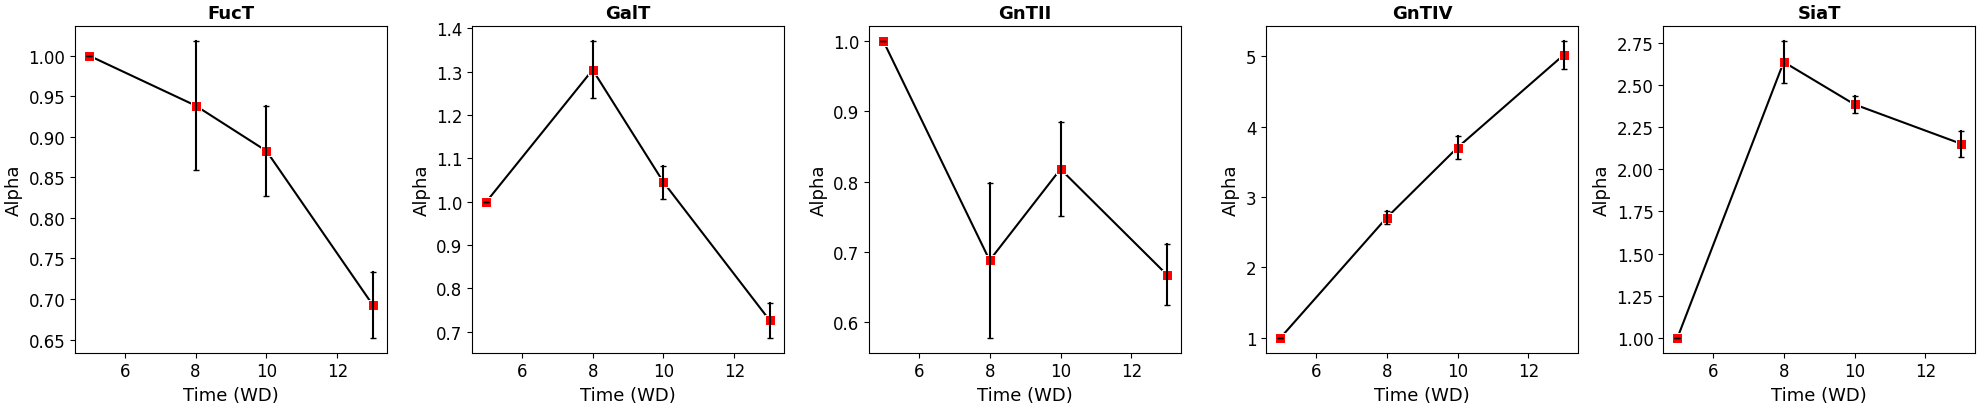

In [17]:
fig = res_data_highpH.plot_alphas(time_col='Time (WD)', meas_cols=None, ncols=5, res_ids=top_n_results_highpH, figsize=None, marker=pH_markers['highpH'],
                                  estimator=lambda x: x.xs(top_n_results_highpH[0], level=0).values)

#### Beta

{'marker': 's', 'estimator': <function <lambda> at 0x7f0be9942020>}
{'marker': 's', 'estimator': <function <lambda> at 0x7f0be99420c0>}


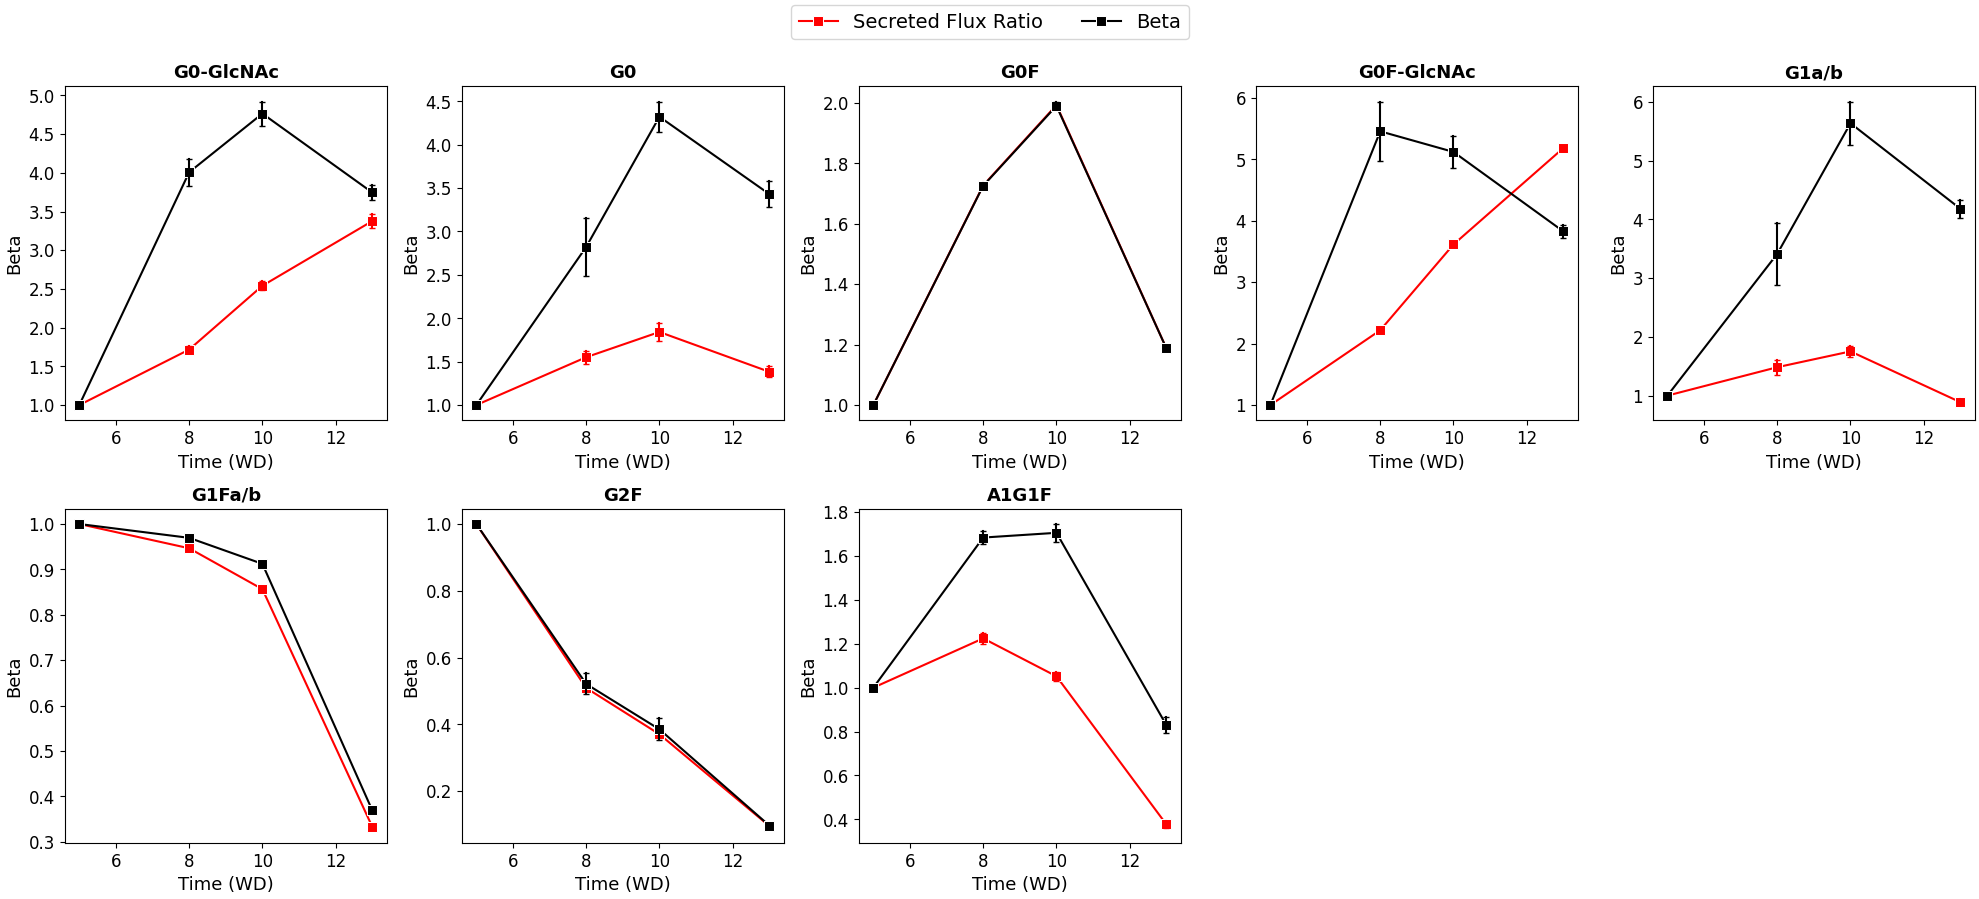

In [18]:
fig = res_data_highpH.plot_betas(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_highpH,
                                  orig_kwargs={'marker': pH_markers['highpH'],
                                              'estimator': lambda x: x.xs(top_n_results_highpH[0], level=0).values},
                                 smooth_kwargs={'marker': pH_markers['highpH'],
                                                'estimator': lambda x: x.xs(top_n_results_highpH[0], level=0).values})

#### Gamma

{'marker': 's', 'estimator': <function <lambda> at 0x7f0be3c83ce0>}


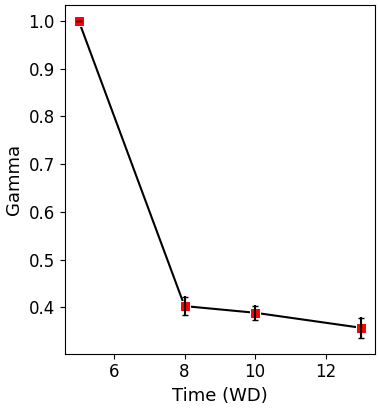

In [19]:
fig = res_data_highpH.plot_gamma(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_highpH, marker=pH_markers['highpH'], estimator=lambda x: x.xs(top_n_results_highpH[0], level=0).values)

#### Entry Flux

{'marker': 's', 'estimator': <function <lambda> at 0x7f0be3ceb060>}


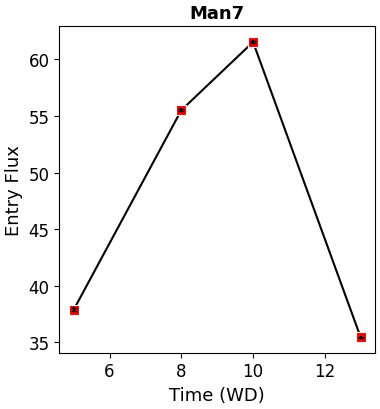

In [20]:
fig = res_data_highpH.plot_entry_flux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_highpH, marker=pH_markers['highpH'], estimator=lambda x: x.xs(top_n_results_highpH[0], level=0).values)

#### Reference Fluxes

None
{'hatch': '|||', 'estimator': <function <lambda> at 0x7f0be3c83ce0>, 'zorder': 10}


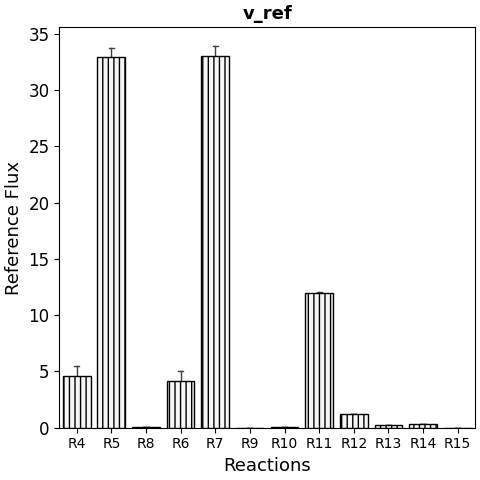

In [21]:
fig = res_data_highpH.plot_vref(x_col='Reactions', meas_cols=None, ncols=5, figsize=(5, 5), res_ids=top_n_results_highpH, hatch=pH_hatch_patterns['highpH'], estimator=lambda x: x.xs(top_n_results_highpH[0], level=0).values[0], zorder=10)
plt.setp(fig.axes[0].get_xticklabels(), fontsize=10)
plt.show()

#### Secreted Fluxes

{'marker': 's'}
{'markersize': 0, 'estimator': <function <lambda> at 0x7f0be3b8a700>}


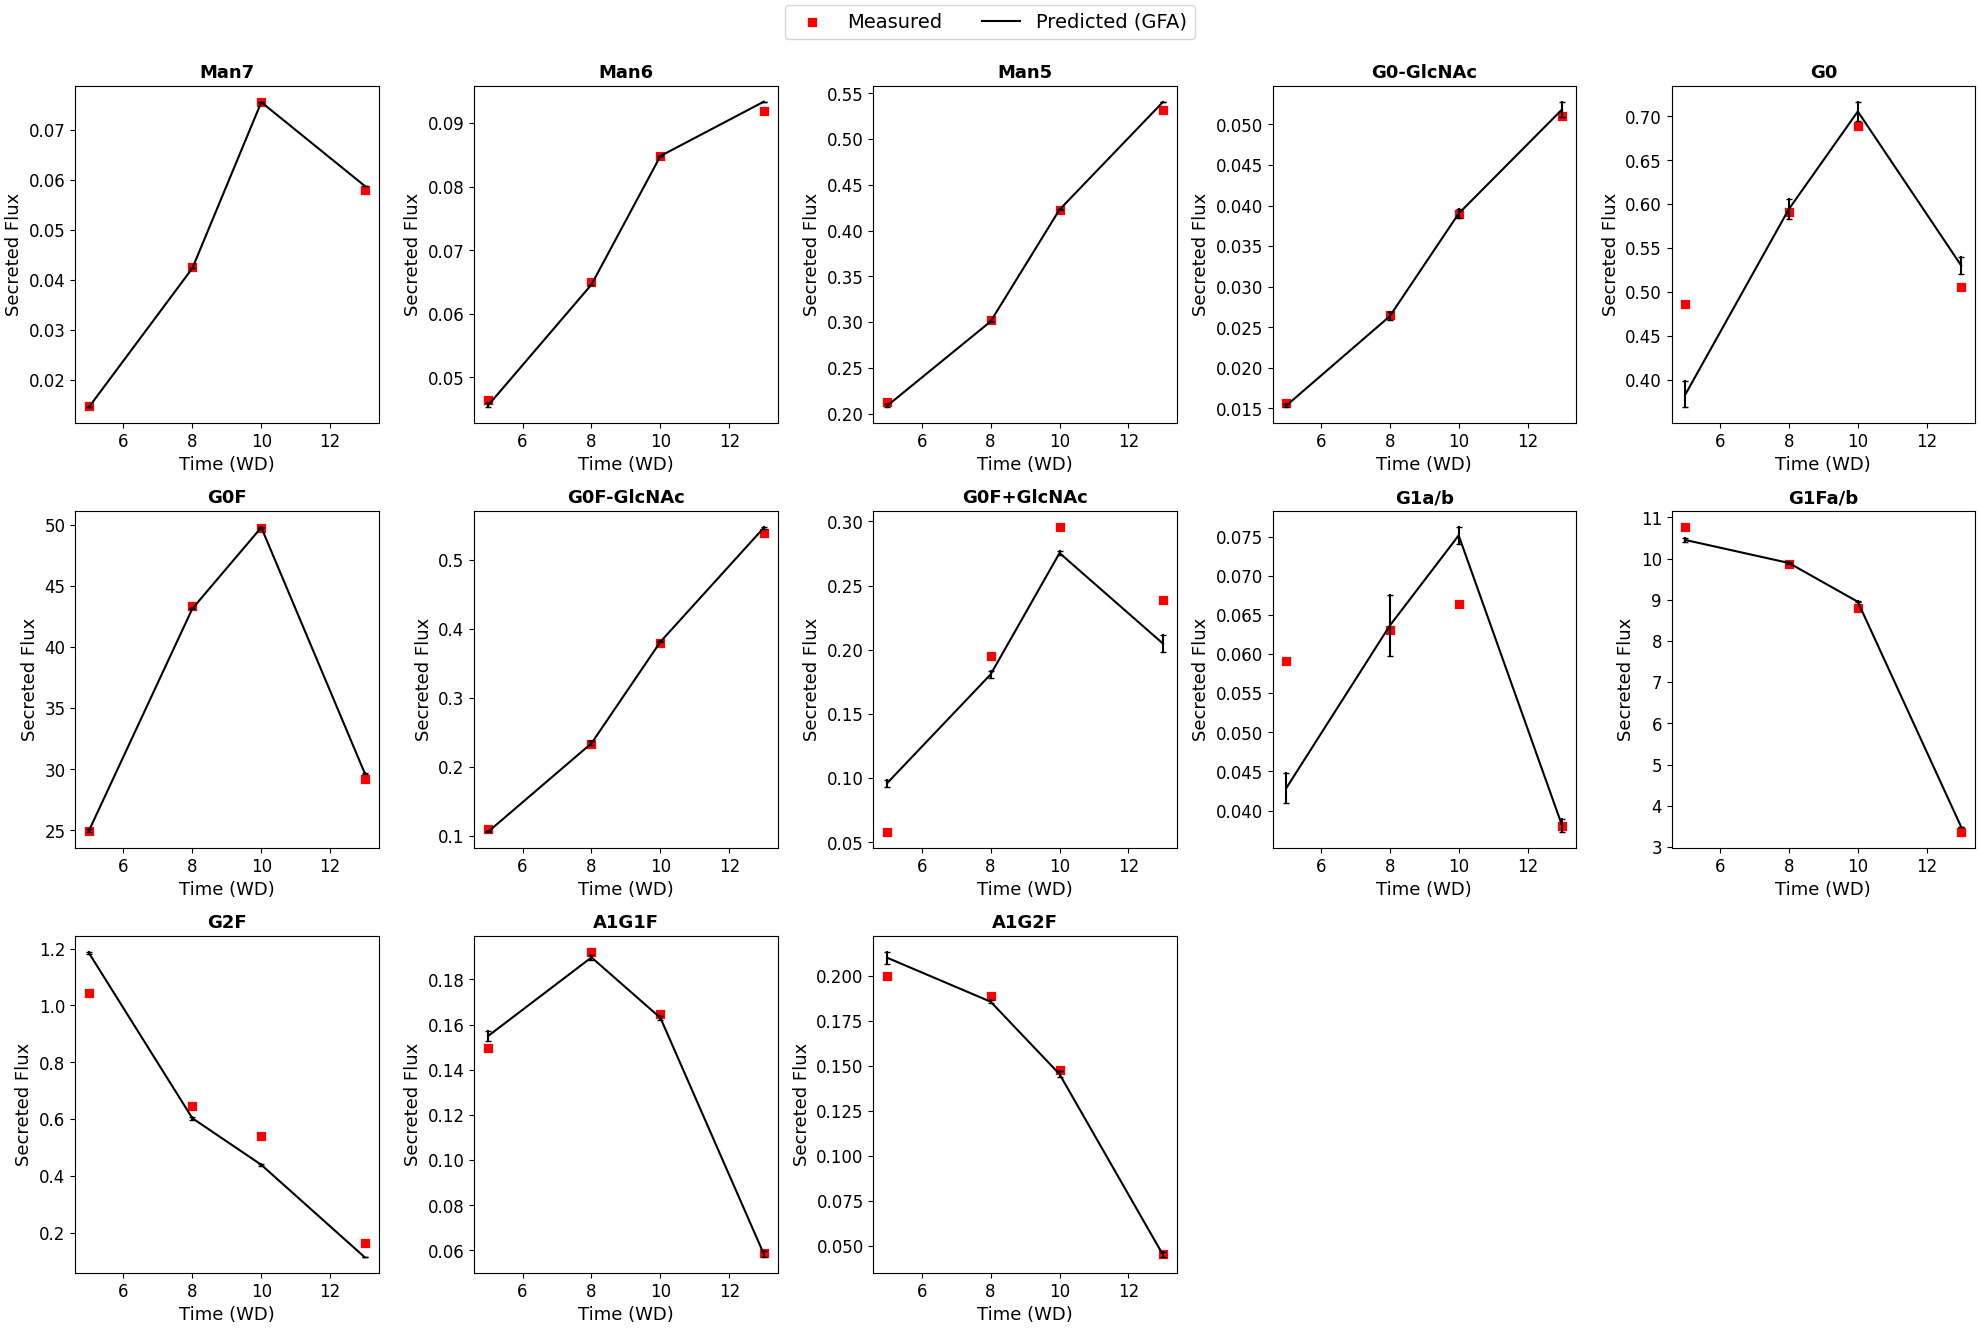

In [22]:
fig = res_data_highpH.plot_secretedflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_highpH, orig_kwargs={'marker': pH_markers['highpH']}, smooth_kwargs={'markersize': 0, 'estimator': lambda x: x.xs(top_n_results_highpH[0], level=0).values})

#### Internal Fluxes

{'marker': 's', 'estimator': <function <lambda> at 0x7f0be3487100>}


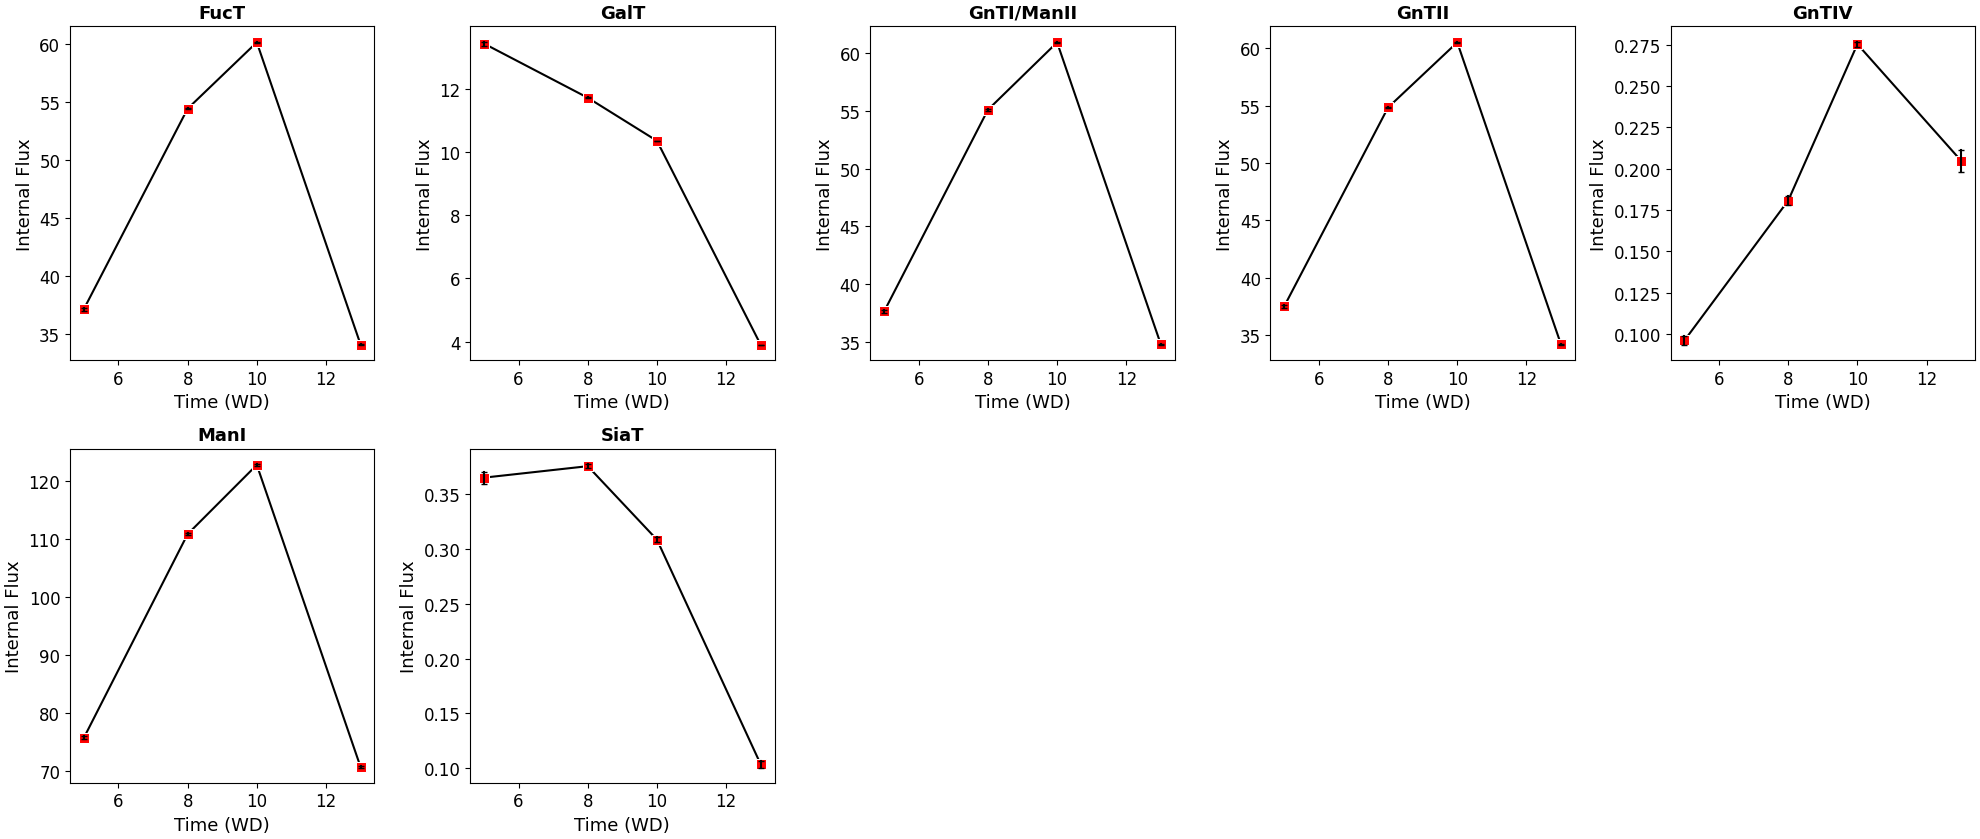

In [23]:
fig = res_data_highpH.plot_internalflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_highpH, marker=pH_markers['highpH'], estimator=lambda x: x.xs(top_n_results_highpH[0], level=0).values)

### Perturbation Analysis

In [24]:
perturb_results = res_data_highpH.curr_result.copy()

#### Perturb alpha

In [25]:
result_alpha = res_data_highpH.perturb_alpha(model_perturb, enzyme_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_alpha[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Enzymes'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/7 [00:00<?]

alpha_deltapert : Size=28, Index=timepoints*enzymes, Domain=NonNegativeReals, Default=None, Mutable=False
    Key                : Value
           (5, 'FucT') :     1
           (5, 'GalT') :     1
     (5, 'GnTI/ManII') :     1
          (5, 'GnTII') :     1
          (5, 'GnTIV') :     1
           (5, 'ManI') :   1.1
           (5, 'SiaT') :     1
           (8, 'FucT') :     1
           (8, 'GalT') :     1
     (8, 'GnTI/ManII') :     1
          (8, 'GnTII') :     1
          (8, 'GnTIV') :     1
           (8, 'ManI') :   1.1
           (8, 'SiaT') :     1
          (10, 'FucT') :     1
          (10, 'GalT') :     1
    (10, 'GnTI/ManII') :     1
         (10, 'GnTII') :     1
         (10, 'GnTIV') :     1
          (10, 'ManI') :   1.1
          (10, 'SiaT') :     1
          (13, 'FucT') :     1
          (13, 'GalT') :     1
    (13, 'GnTI/ManII') :     1
         (13, 'GnTII') :     1
         (13, 'GnTIV') :     1
          (13, 'ManI') :   1.1
          (13, 'SiaT') :  

##### Unnormalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


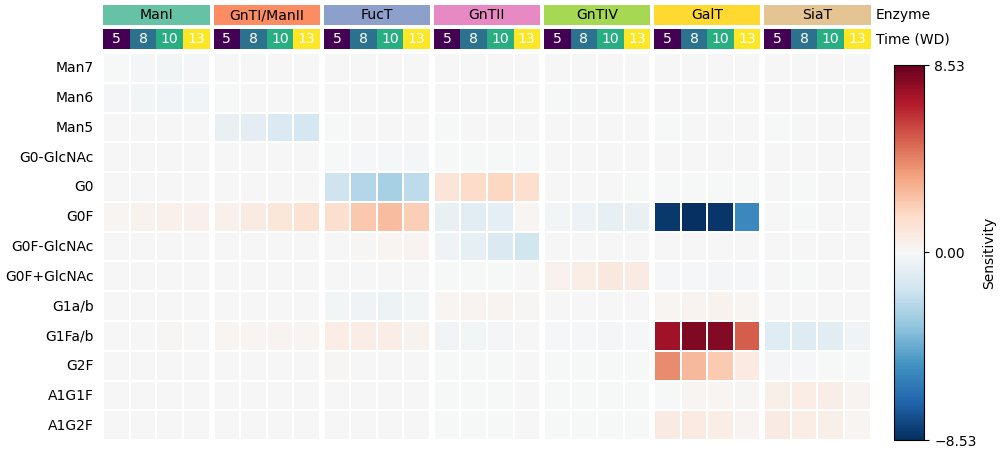

In [26]:
df = perturb_alpha[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', norm=n1, vmin=-df_range, vmax=df_range,
                           annot=False,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Normalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


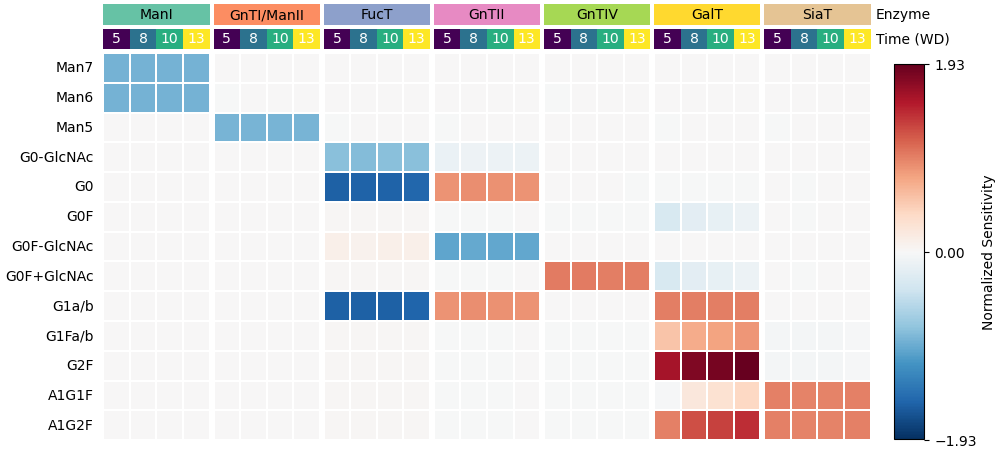

In [27]:
df = perturb_alpha[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Unnormalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


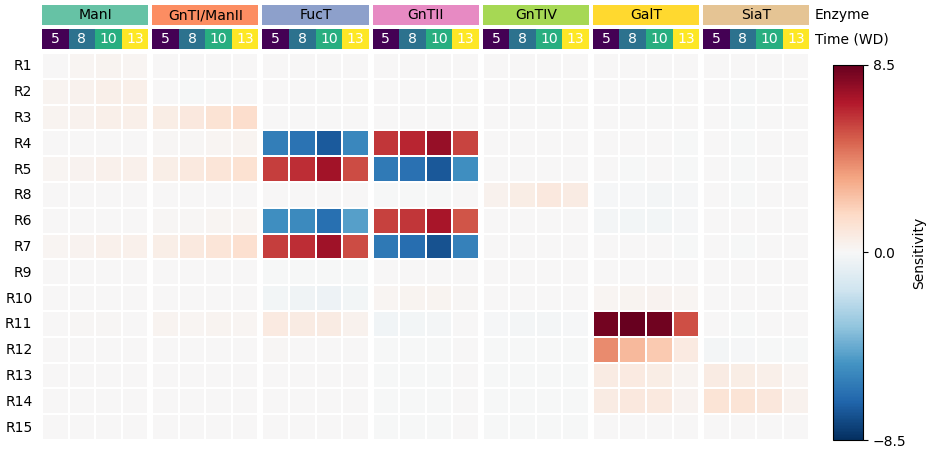

In [28]:
df = perturb_alpha[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


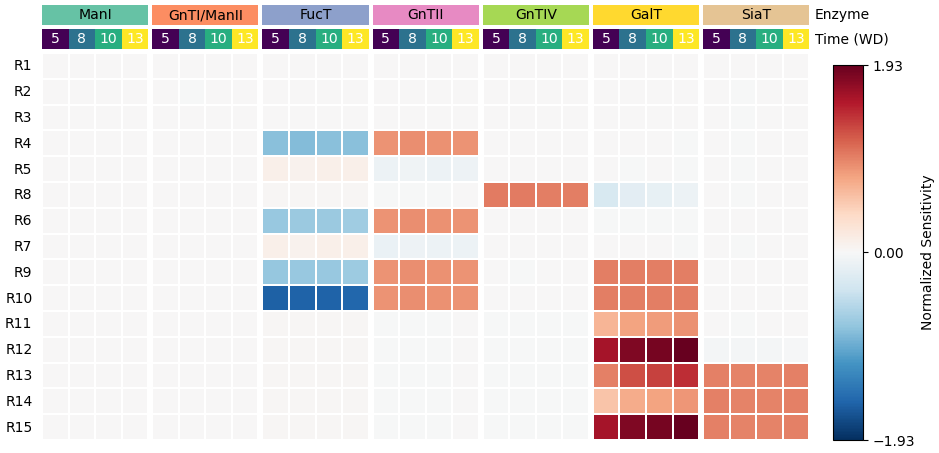

In [29]:
df = perturb_alpha[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


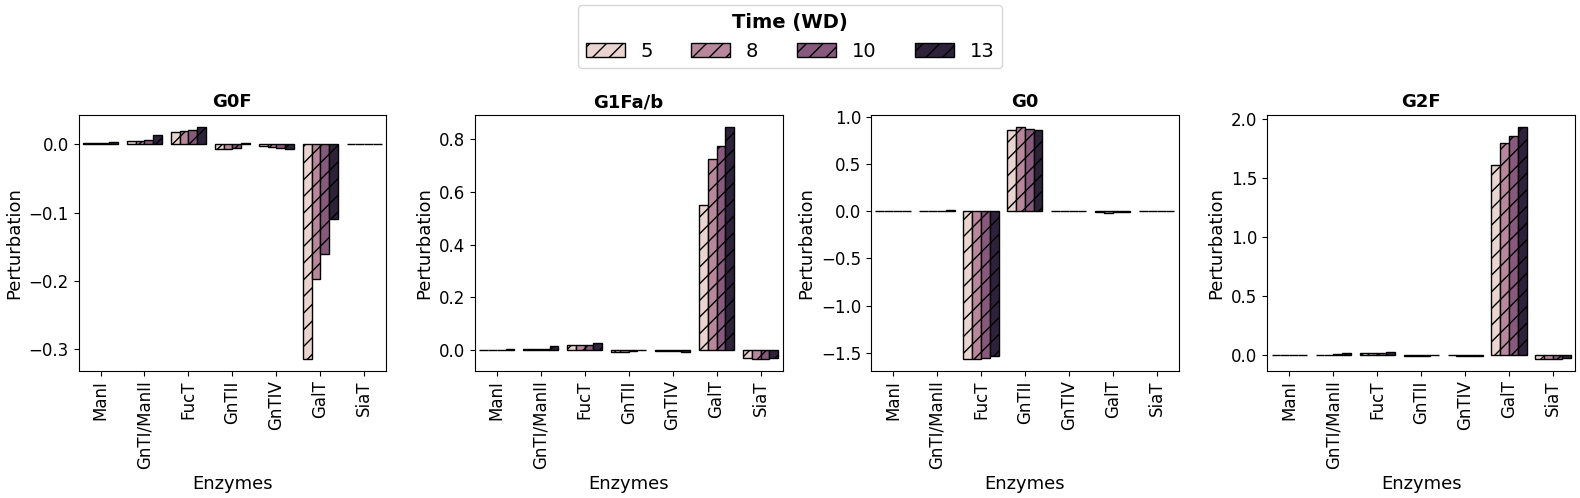

In [30]:
fig = res_data_highpH.plot_perturb(perturb_alpha[pH_scale]['norm_dsecreted_flux'], x_col='Enzymes', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


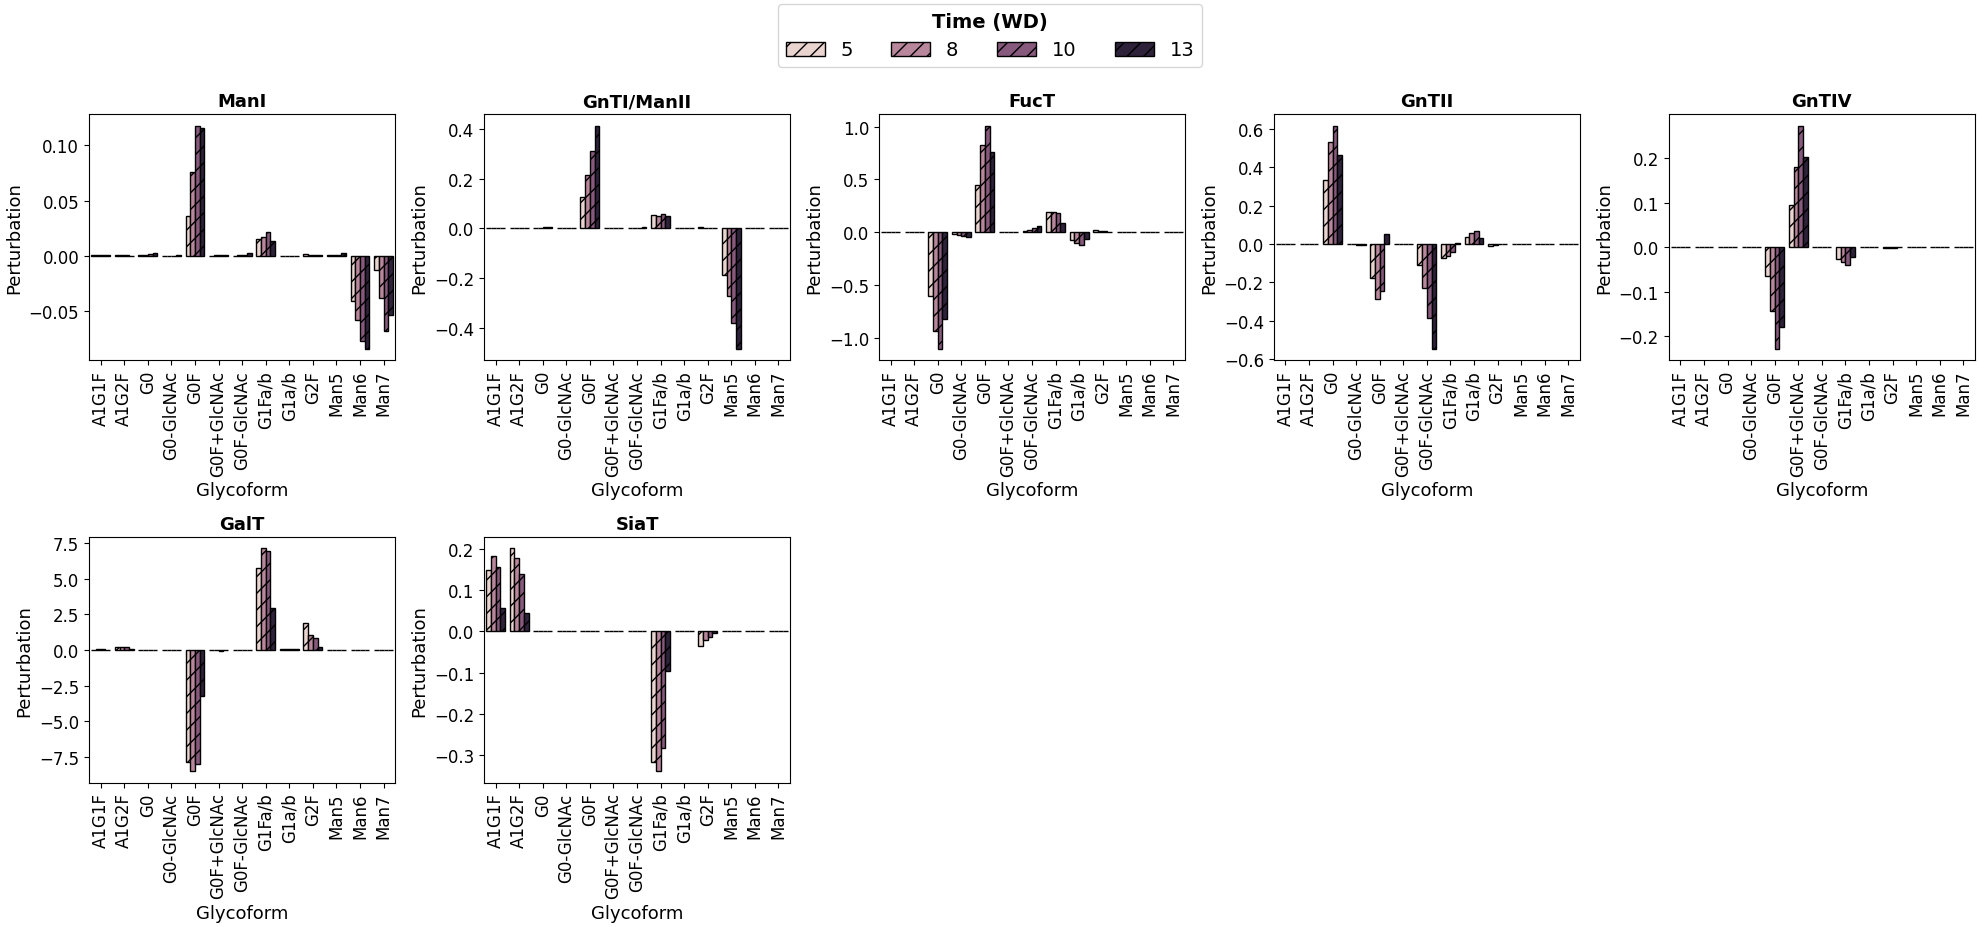

In [31]:
transposed_data = (perturb_alpha[pH_scale]['dsecreted_flux'].reset_index().
                   melt(id_vars=['Enzymes', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Enzymes', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_highpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=enzyme_list, hatch='//')

#### Perturb 1 reaction at a time

In [32]:
result_alpha = res_data_highpH.perturb_vref(model_perturb, reaction_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_vref[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Reaction ID'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/15 [00:00<?]

vref_deltapert : Size=15, Index=internal_rxns, Domain=NonNegativeReals, Default=None, Mutable=False
    Key : Value
     R1 :   1.1
    R10 :     1
    R11 :     1
    R12 :     1
    R13 :     1
    R14 :     1
    R15 :     1
     R2 :     1
     R3 :     1
     R4 :     1
     R5 :     1
     R6 :     1
     R7 :     1
     R8 :     1
     R9 :     1
Ipopt 3.14.16: max_iter=100000
linear_solver=mumps
warm_start_init_point=yes
print_level=4


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:       44
                     variables with only lower bounds:        0
                variables with lower 

##### Unnormalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


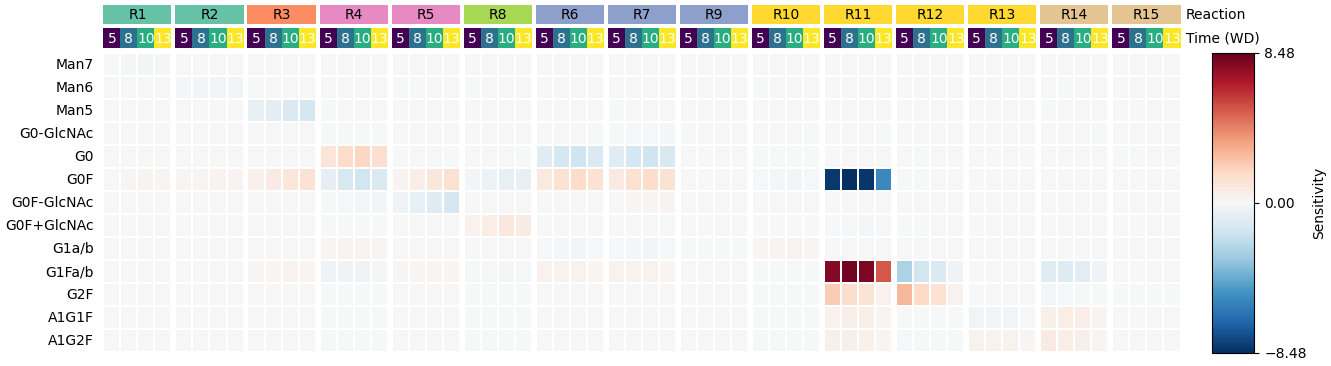

In [33]:
df = perturb_vref[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


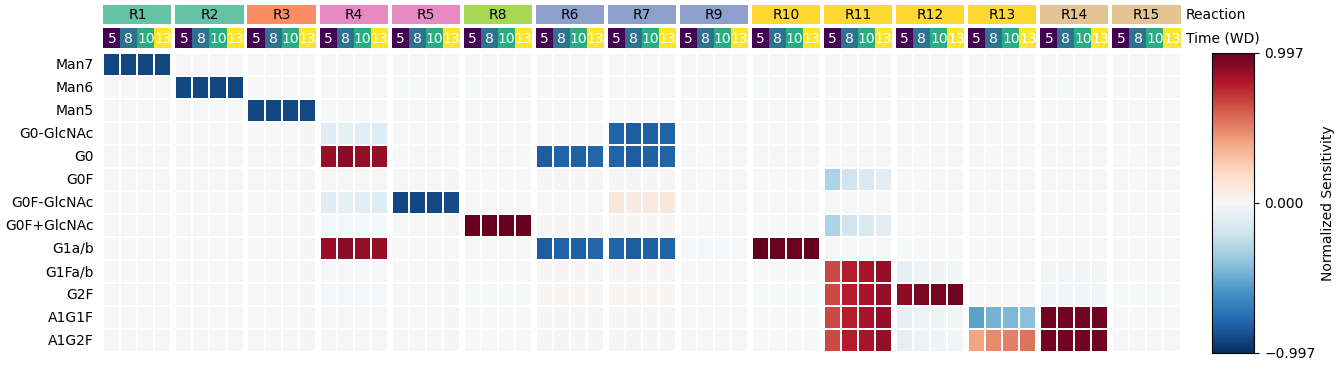

In [34]:
df = perturb_vref[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Unnormalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


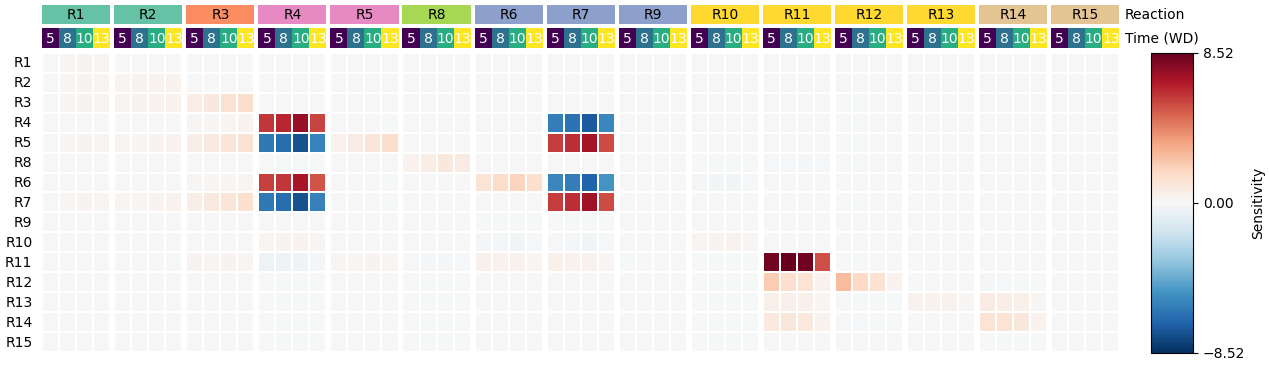

In [35]:
df = perturb_vref[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


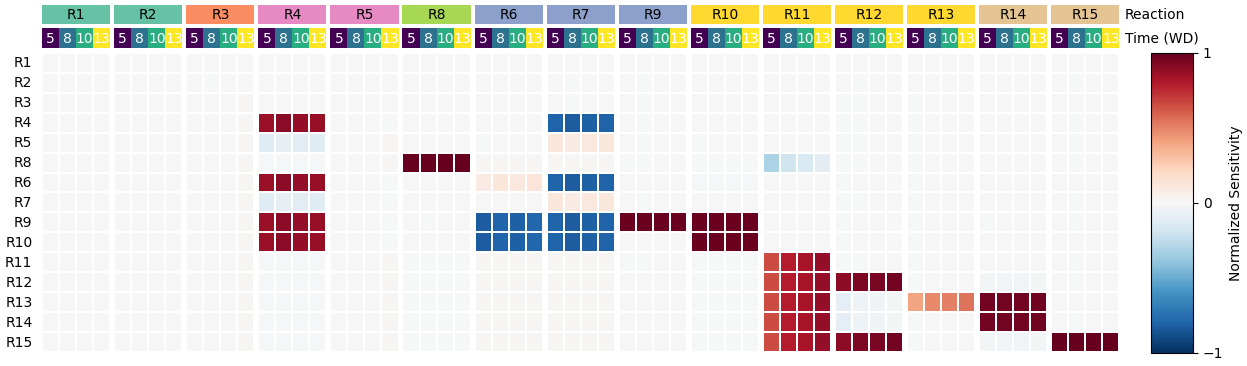

In [36]:
df = perturb_vref[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


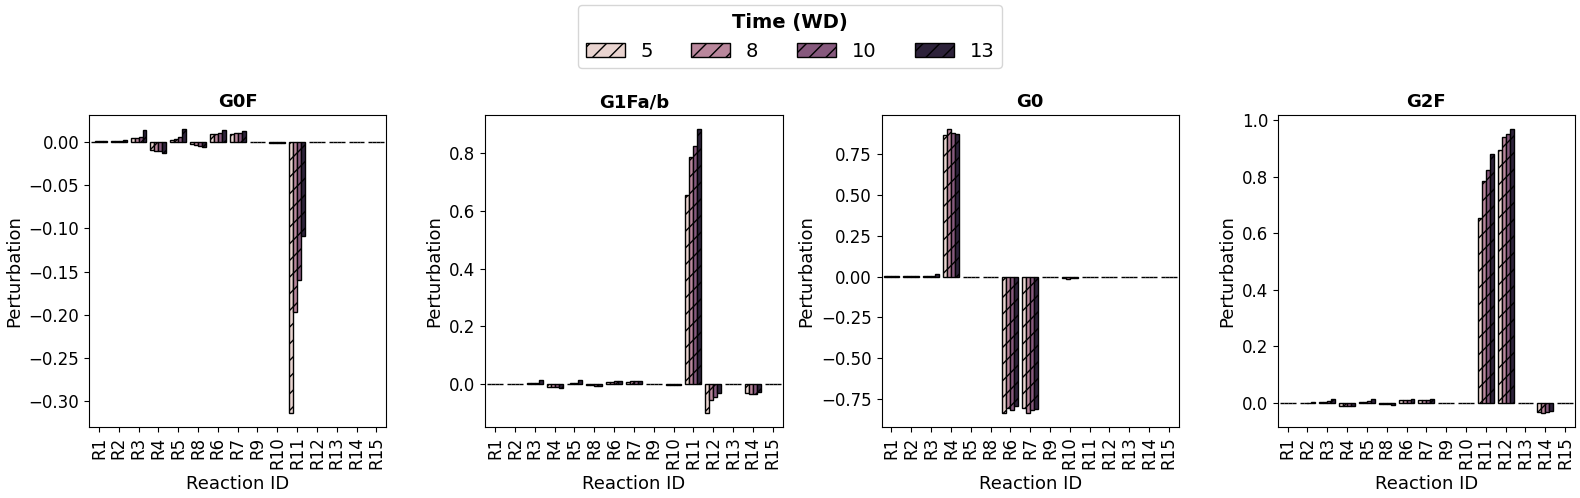

In [37]:
fig = res_data_highpH.plot_perturb(perturb_vref[pH_scale]['norm_dsecreted_flux'], x_col='Reaction ID', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


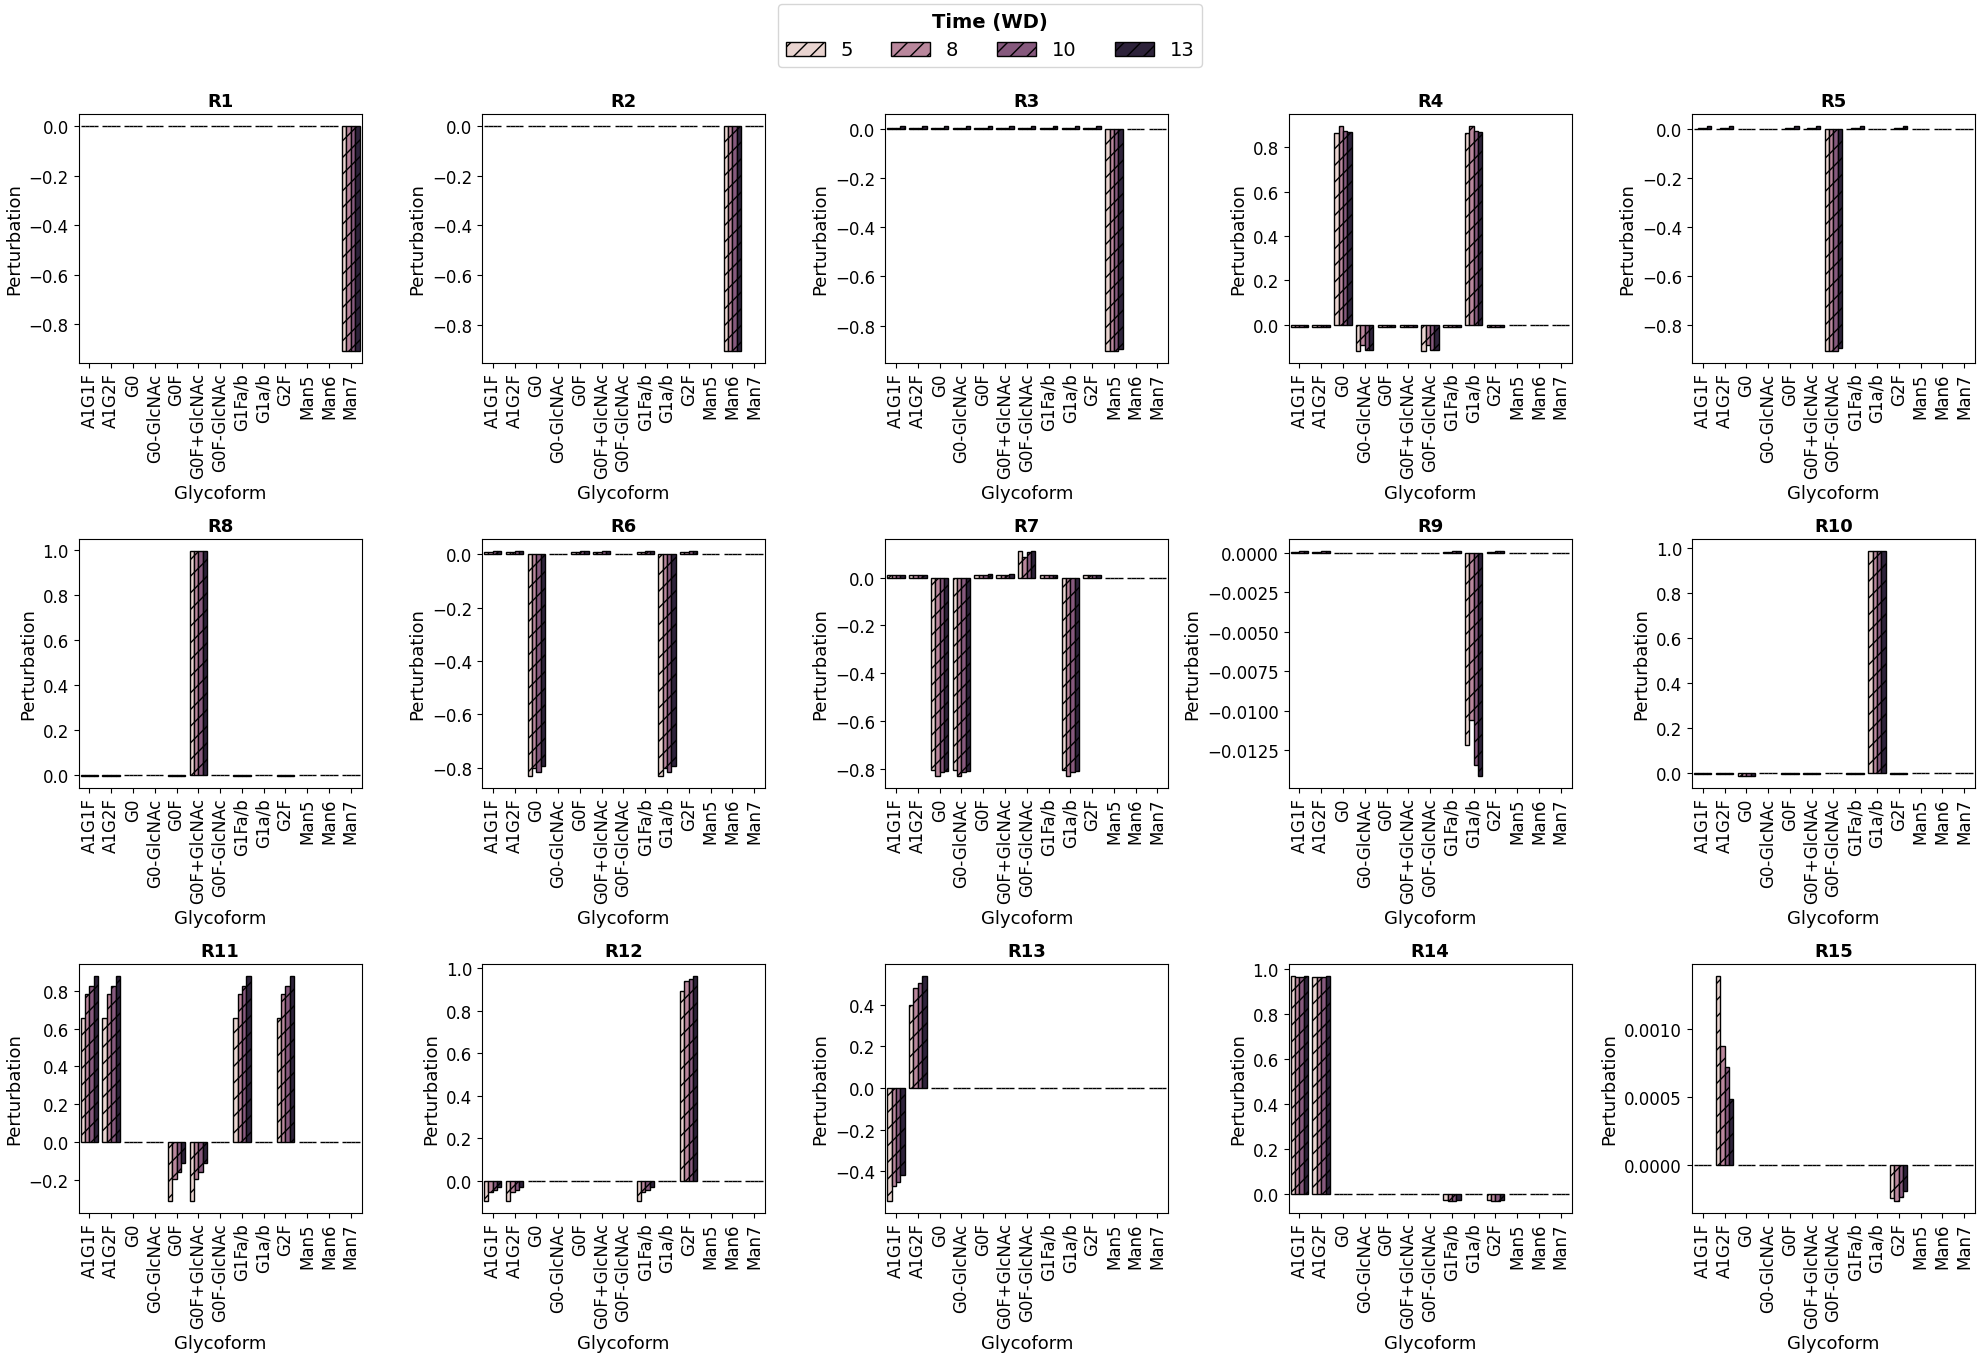

In [38]:
transposed_data = (perturb_vref[pH_scale]['norm_dsecreted_flux'].reset_index().
                   melt(id_vars=['Reaction ID', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Reaction ID', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_highpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=reaction_list, hatch='//')

### med pH

In [39]:
pH_scale = 'medpH'

In [40]:
display(res_data_medpH.summarize_runs())

In [41]:
top_n_results_medpH = res_data_medpH.choose_top_n('obj', 10, ascending=True)  # Used to plot error bars with lines

In [42]:
res_data_medpH.sel_result(top_n_results_medpH[0])
print(res_data_medpH)


- Name: <undefined>
  Status: ok
  Return code: <undefined>
  Message: Ipopt 3.14.16\x3a Solved To Acceptable Level.
  User time: <undefined>
  System time: <undefined>
  Wallclock time: <undefined>
  Termination condition: optimal
  Termination message: <undefined>
  Id: 1
  Error rc: 0
  Time: 0.7008740901947021

Results class (name=None) with 100 experiments (Active=65):
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99


#### Alpha

{'marker': 'o', 'estimator': <function <lambda> at 0x7f0be12a7420>}


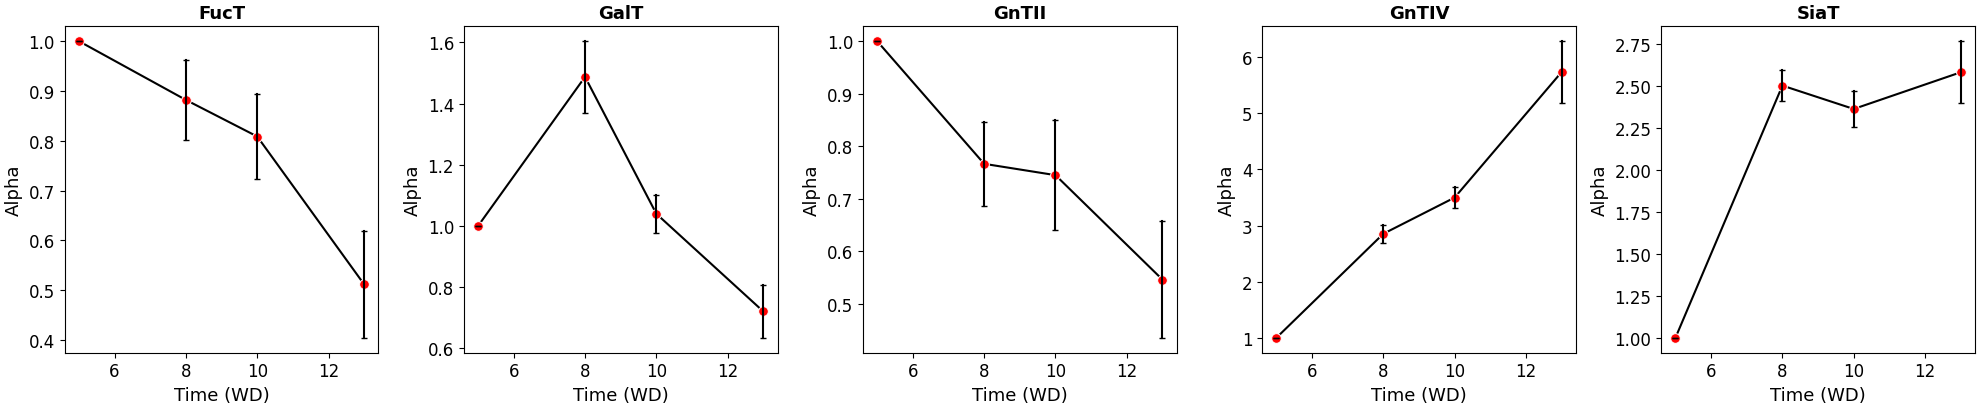

In [43]:
fig = res_data_medpH.plot_alphas(time_col='Time (WD)', meas_cols=None, ncols=5, res_ids=top_n_results_medpH, figsize=None, marker=pH_markers['medpH'],
                                  estimator=lambda x: x.xs(top_n_results_medpH[0], level=0).values)

#### Beta

{'marker': 'o', 'estimator': <function <lambda> at 0x7f0be0429580>}
{'marker': 'o', 'estimator': <function <lambda> at 0x7f0be042a480>}


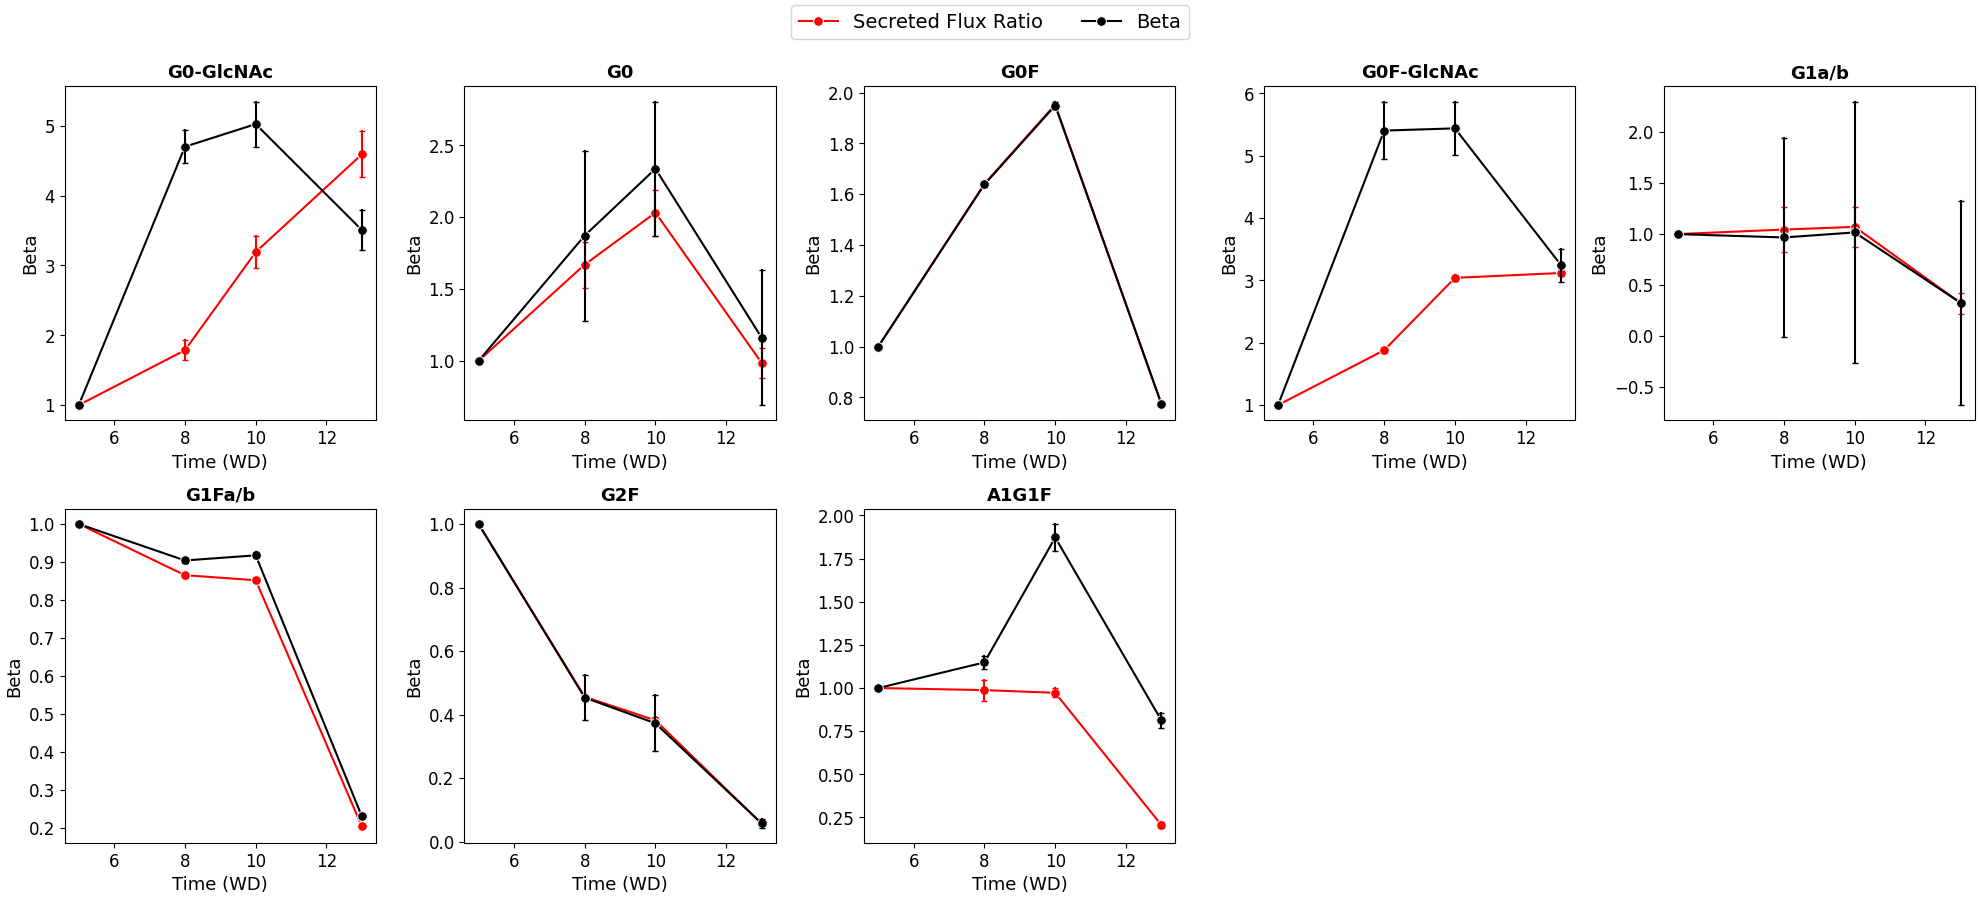

In [44]:
fig = res_data_medpH.plot_betas(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_medpH,
                                  orig_kwargs={'marker': pH_markers['medpH'],
                                              'estimator': lambda x: x.xs(top_n_results_medpH[0], level=0).values},
                                 smooth_kwargs={'marker': pH_markers['medpH'],
                                                'estimator': lambda x: x.xs(top_n_results_medpH[0], level=0).values})

#### Gamma

{'marker': 'o', 'estimator': <function <lambda> at 0x7f0be0957d80>}


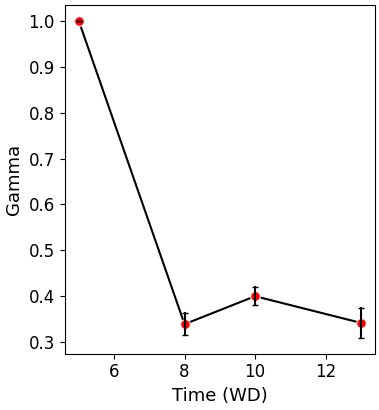

In [45]:
fig = res_data_medpH.plot_gamma(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_medpH, marker=pH_markers['medpH'], estimator=lambda x: x.xs(top_n_results_medpH[0], level=0).values)

#### Entry Flux

{'marker': 'o', 'estimator': <function <lambda> at 0x7f0bdaeff060>}


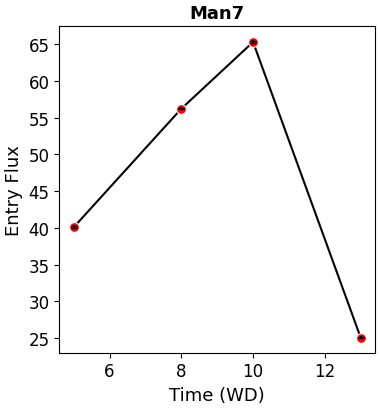

In [46]:
fig = res_data_medpH.plot_entry_flux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_medpH, marker=pH_markers['medpH'], estimator=lambda x: x.xs(top_n_results_medpH[0], level=0).values)

#### Reference Fluxes

None
{'hatch': '\\\\\\', 'estimator': <function <lambda> at 0x7f0bdaede3e0>, 'zorder': 10}


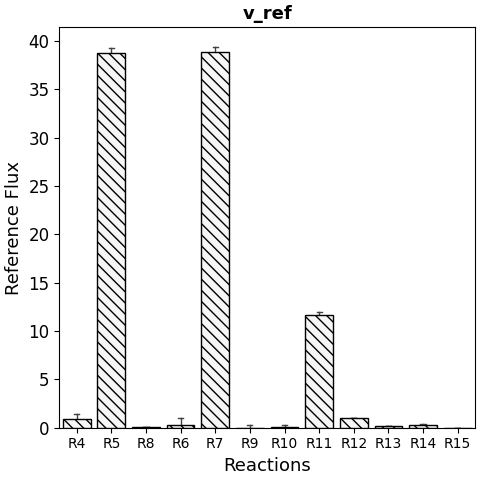

In [47]:
fig = res_data_medpH.plot_vref(x_col='Reactions', meas_cols=None, ncols=5, figsize=(5, 5), res_ids=top_n_results_medpH, hatch=pH_hatch_patterns['medpH'], estimator=lambda x: x.xs(top_n_results_medpH[0], level=0).values[0], zorder=10)
plt.setp(fig.axes[0].get_xticklabels(), fontsize=10)
plt.show()

#### Secreted Fluxes

{'marker': 'o'}
{'markersize': 0, 'estimator': <function <lambda> at 0x7f0bda25e5c0>}


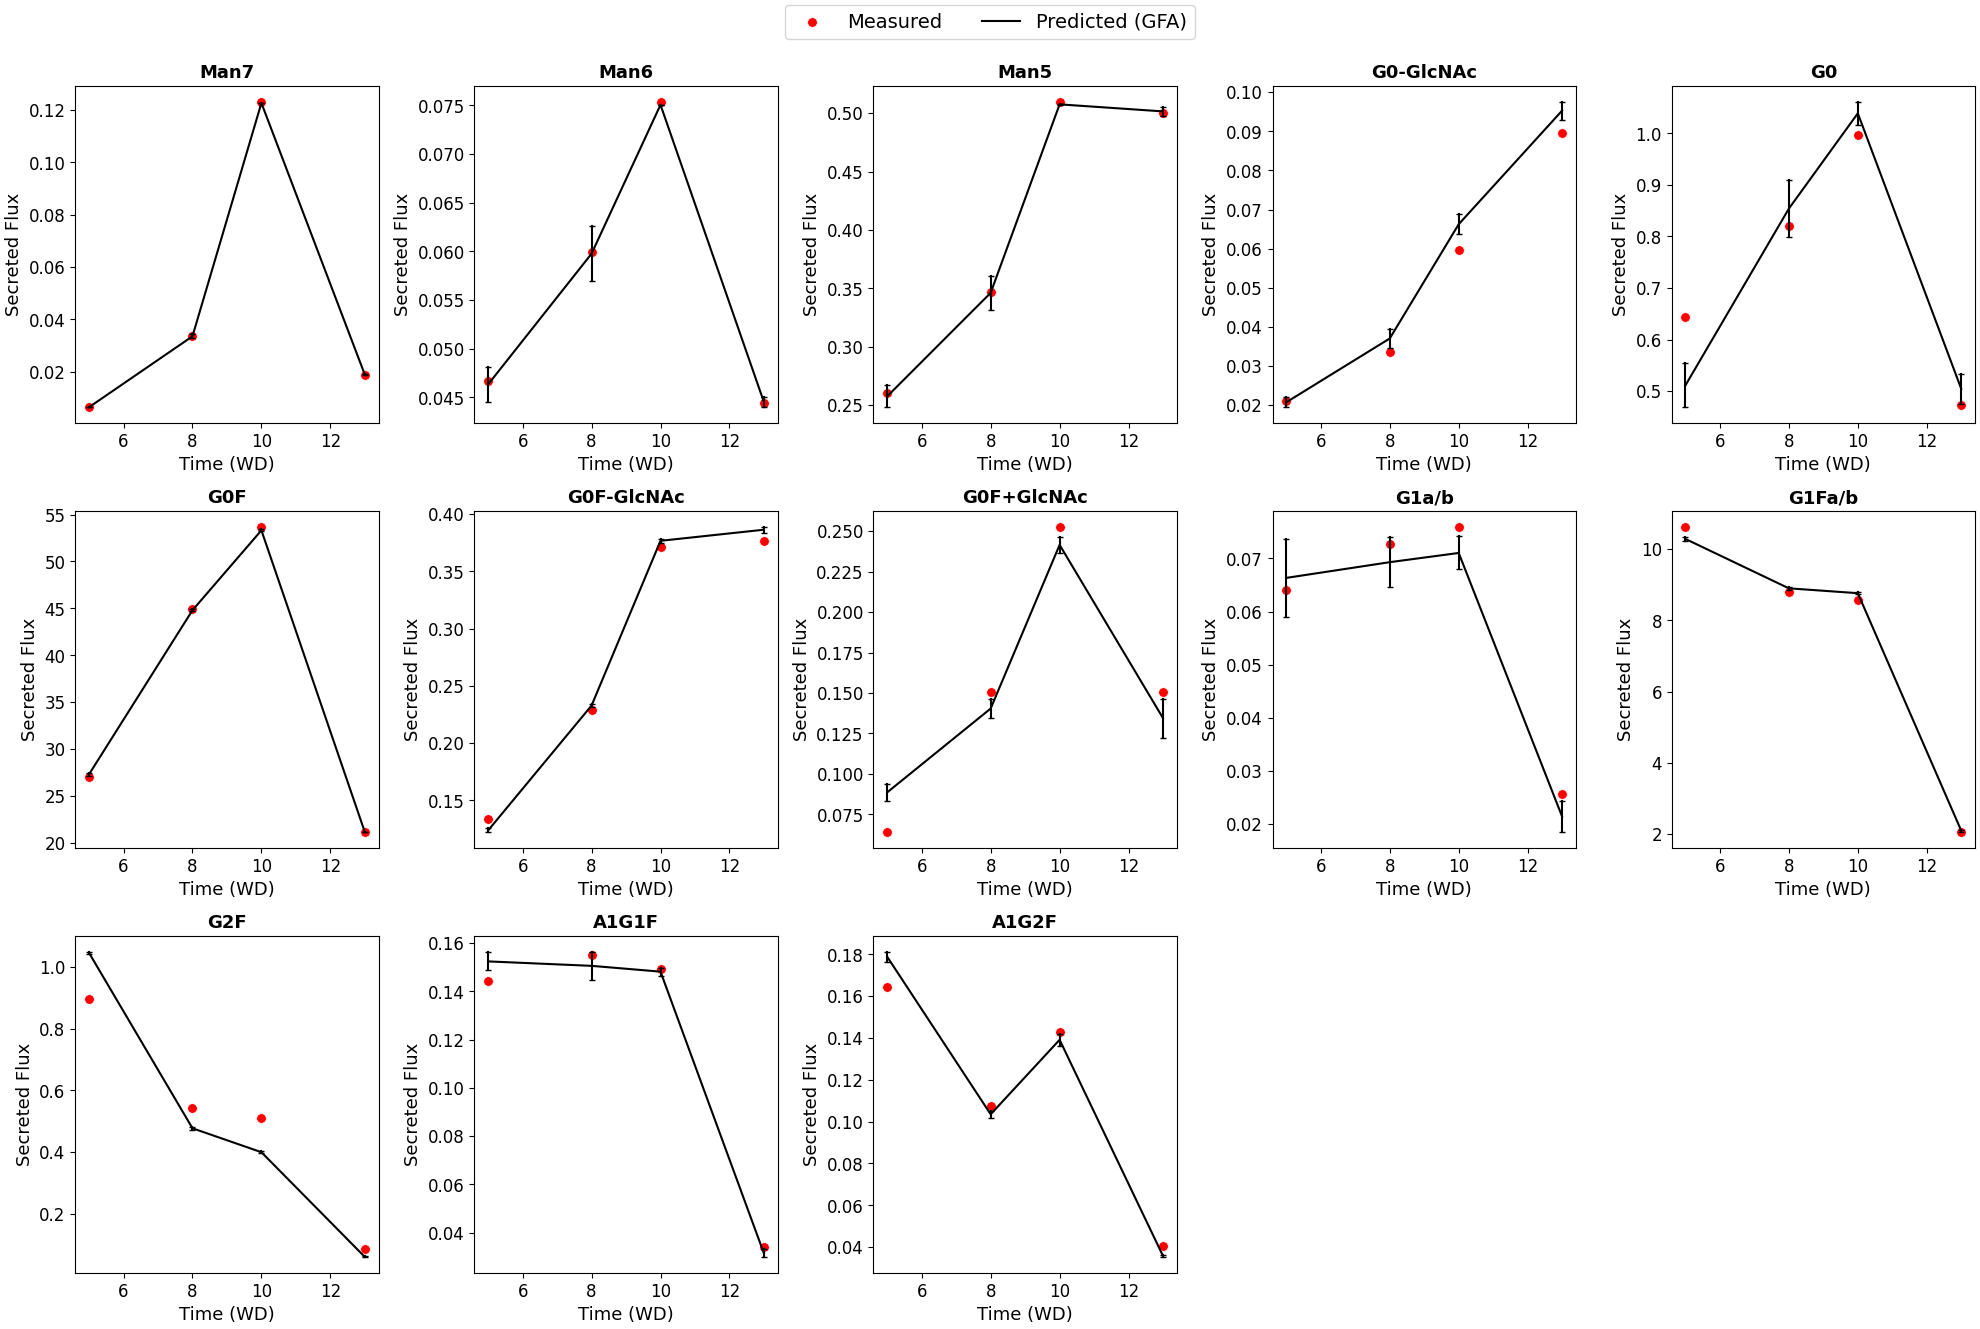

In [48]:
fig = res_data_medpH.plot_secretedflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_medpH, orig_kwargs={'marker': pH_markers['medpH']}, smooth_kwargs={'markersize': 0, 'estimator': lambda x: x.xs(top_n_results_medpH[0], level=0).values})

#### Internal Fluxes

{'marker': 'o', 'estimator': <function <lambda> at 0x7f0bd9b06de0>}


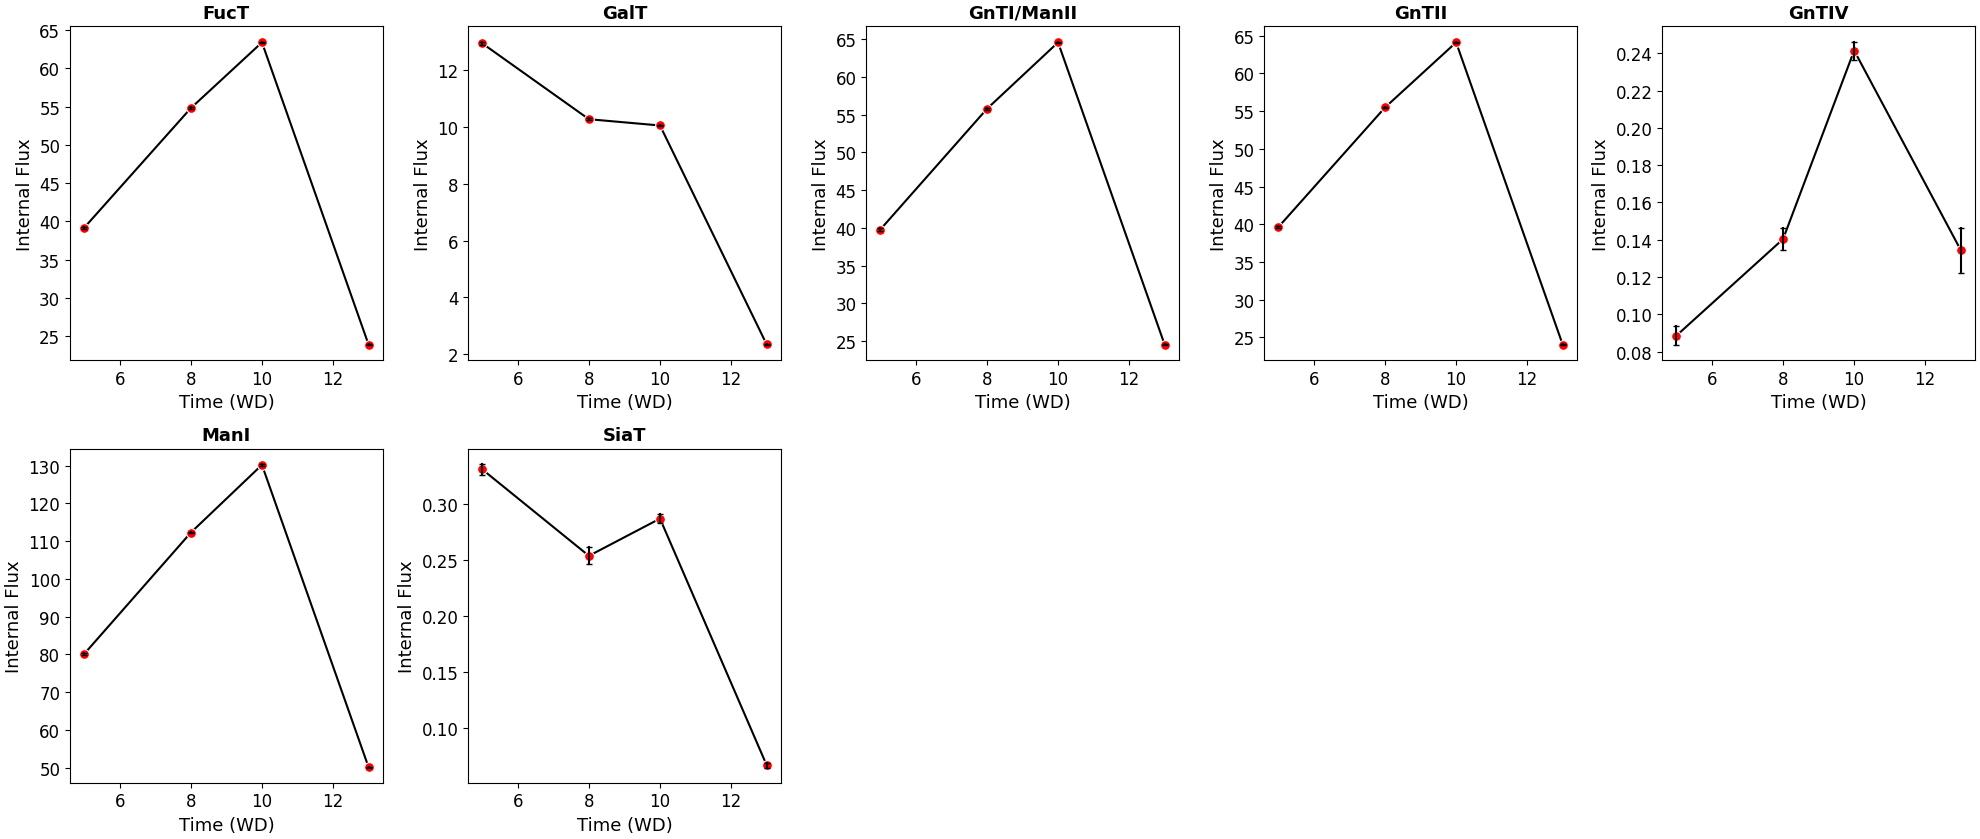

In [49]:
fig = res_data_medpH.plot_internalflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_medpH, marker=pH_markers['medpH'], estimator=lambda x: x.xs(top_n_results_medpH[0], level=0).values)

### Perturbation Analysis

In [50]:
perturb_results = res_data_medpH.curr_result.copy()

#### Perturb alpha

In [51]:
result_alpha = res_data_medpH.perturb_alpha(model_perturb, enzyme_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_alpha[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Enzymes'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/7 [00:00<?]

alpha_deltapert : Size=28, Index=timepoints*enzymes, Domain=NonNegativeReals, Default=None, Mutable=False
    Key                : Value
           (5, 'FucT') :     1
           (5, 'GalT') :     1
     (5, 'GnTI/ManII') :     1
          (5, 'GnTII') :     1
          (5, 'GnTIV') :     1
           (5, 'ManI') :   1.1
           (5, 'SiaT') :     1
           (8, 'FucT') :     1
           (8, 'GalT') :     1
     (8, 'GnTI/ManII') :     1
          (8, 'GnTII') :     1
          (8, 'GnTIV') :     1
           (8, 'ManI') :   1.1
           (8, 'SiaT') :     1
          (10, 'FucT') :     1
          (10, 'GalT') :     1
    (10, 'GnTI/ManII') :     1
         (10, 'GnTII') :     1
         (10, 'GnTIV') :     1
          (10, 'ManI') :   1.1
          (10, 'SiaT') :     1
          (13, 'FucT') :     1
          (13, 'GalT') :     1
    (13, 'GnTI/ManII') :     1
         (13, 'GnTII') :     1
         (13, 'GnTIV') :     1
          (13, 'ManI') :   1.1
          (13, 'SiaT') :  

##### Unnormalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


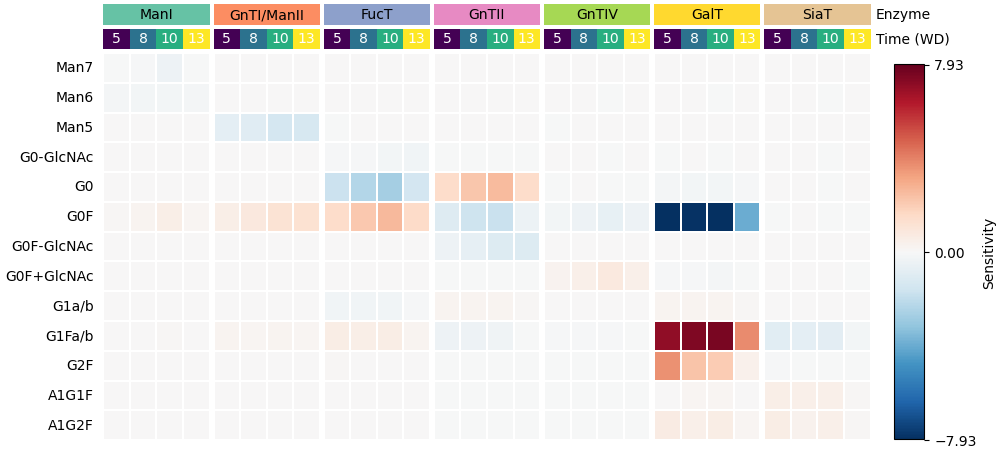

In [52]:
df = perturb_alpha[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Normalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


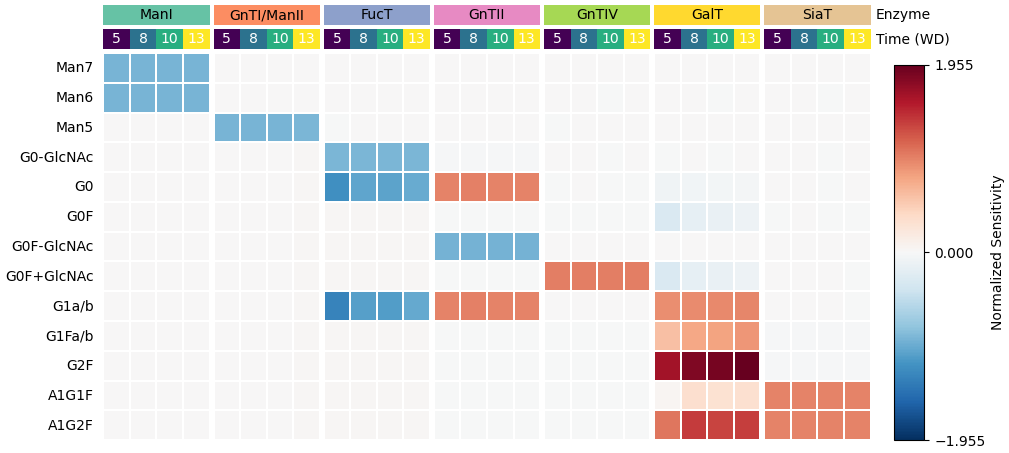

In [53]:
df = perturb_alpha[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Unnormalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


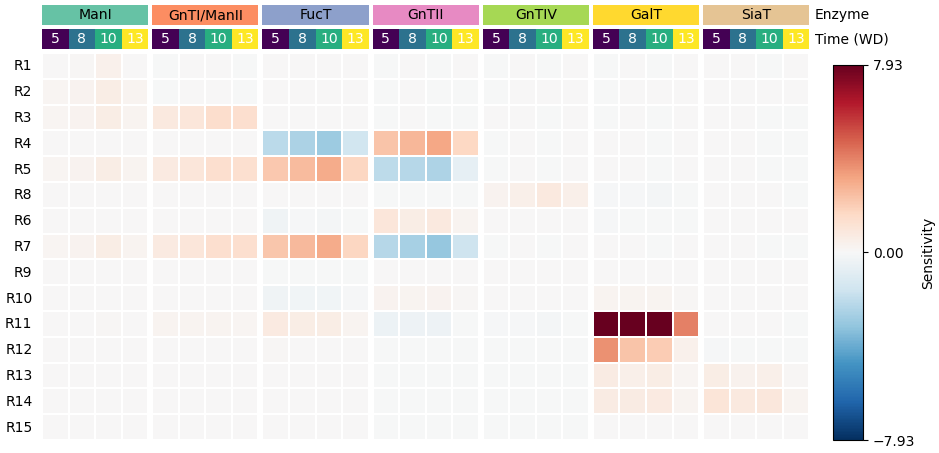

In [54]:
df = perturb_alpha[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


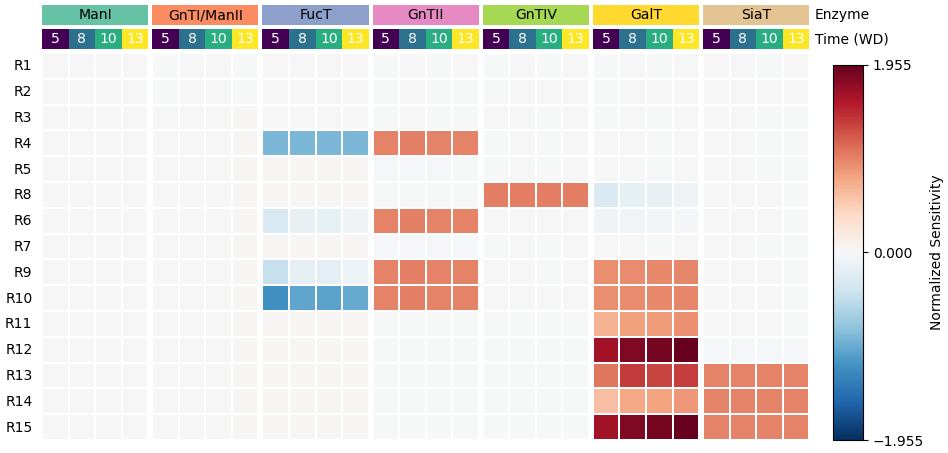

In [55]:
df = perturb_alpha[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])

cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


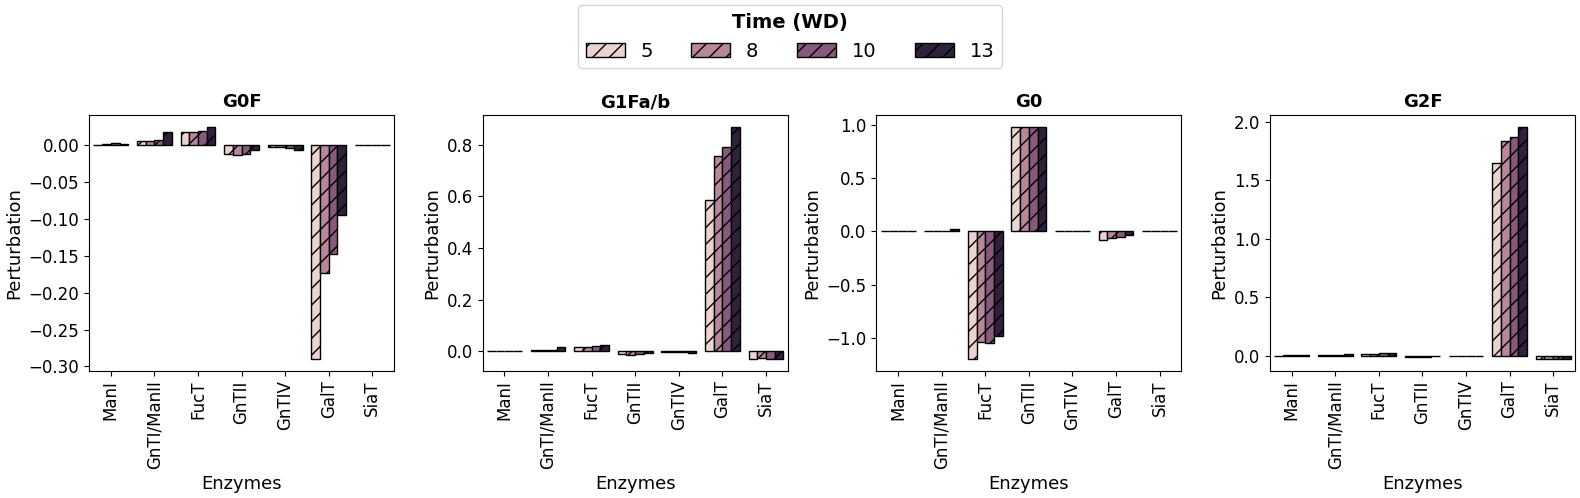

In [56]:
fig = res_data_medpH.plot_perturb(perturb_alpha[pH_scale]['norm_dsecreted_flux'], x_col='Enzymes', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


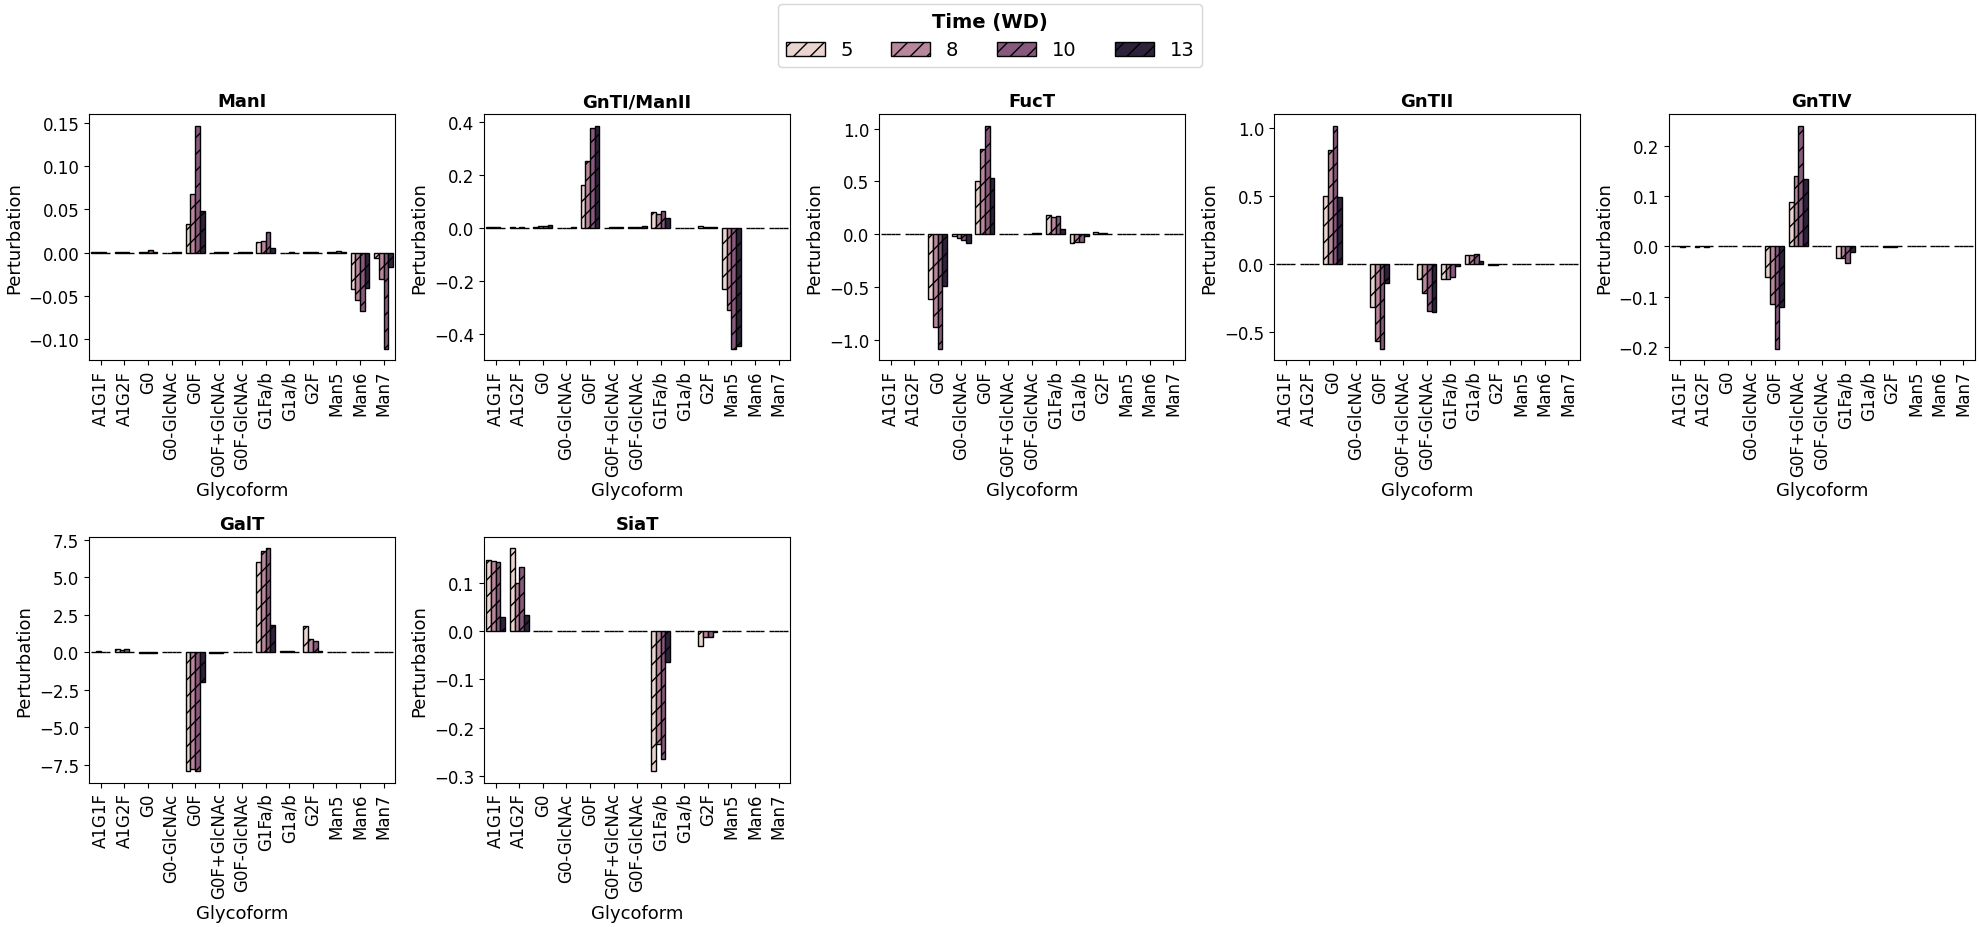

In [57]:
transposed_data = (perturb_alpha[pH_scale]['dsecreted_flux'].reset_index().
                   melt(id_vars=['Enzymes', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Enzymes', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_medpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=enzyme_list, hatch='//')

#### Perturb 1 reaction at a time

In [58]:
result_alpha = res_data_medpH.perturb_vref(model_perturb, reaction_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_vref[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Reaction ID'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/15 [00:00<?]

vref_deltapert : Size=15, Index=internal_rxns, Domain=NonNegativeReals, Default=None, Mutable=False
    Key : Value
     R1 :   1.1
    R10 :     1
    R11 :     1
    R12 :     1
    R13 :     1
    R14 :     1
    R15 :     1
     R2 :     1
     R3 :     1
     R4 :     1
     R5 :     1
     R6 :     1
     R7 :     1
     R8 :     1
     R9 :     1
Ipopt 3.14.16: max_iter=100000
linear_solver=mumps
warm_start_init_point=yes
print_level=4


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:       44
                     variables with only lower bounds:        0
                variables with lower 

##### Unnormalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


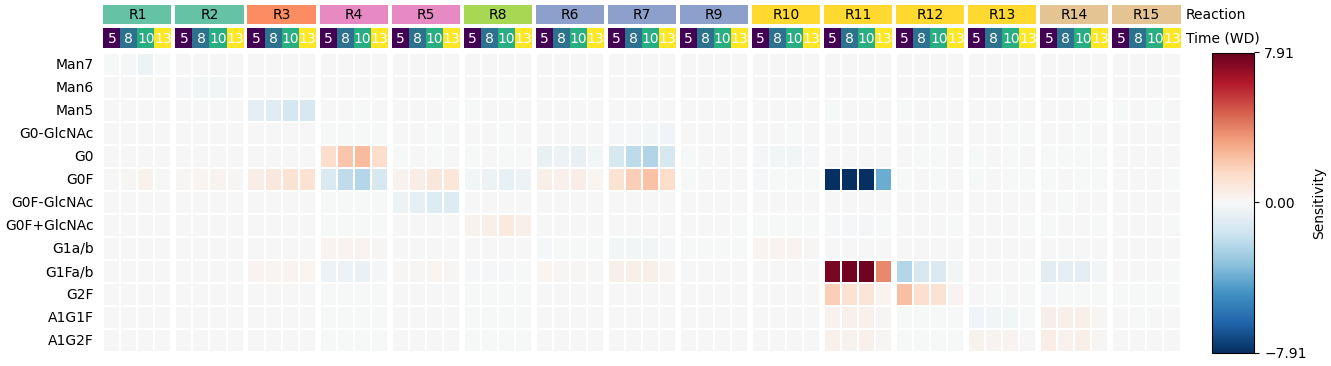

In [59]:
df = perturb_vref[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


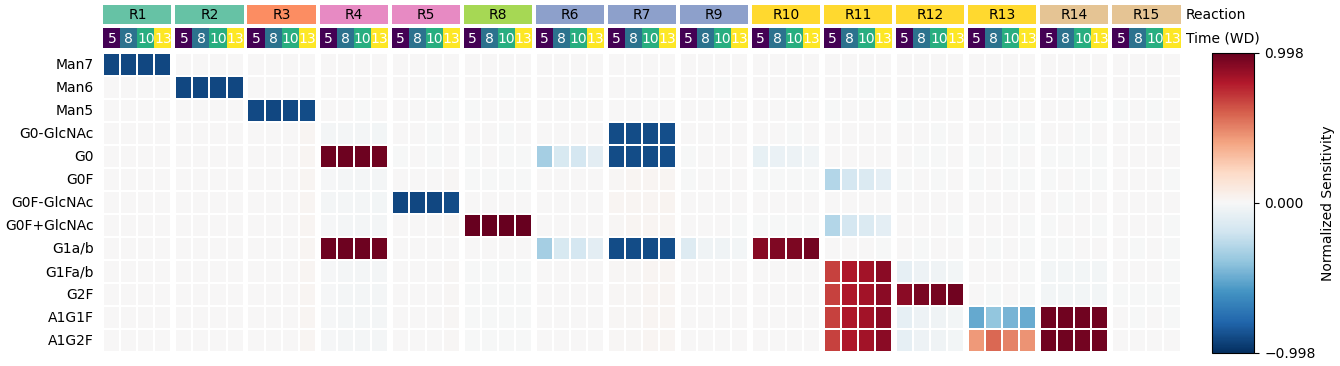

In [60]:
df = perturb_vref[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Unnormalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


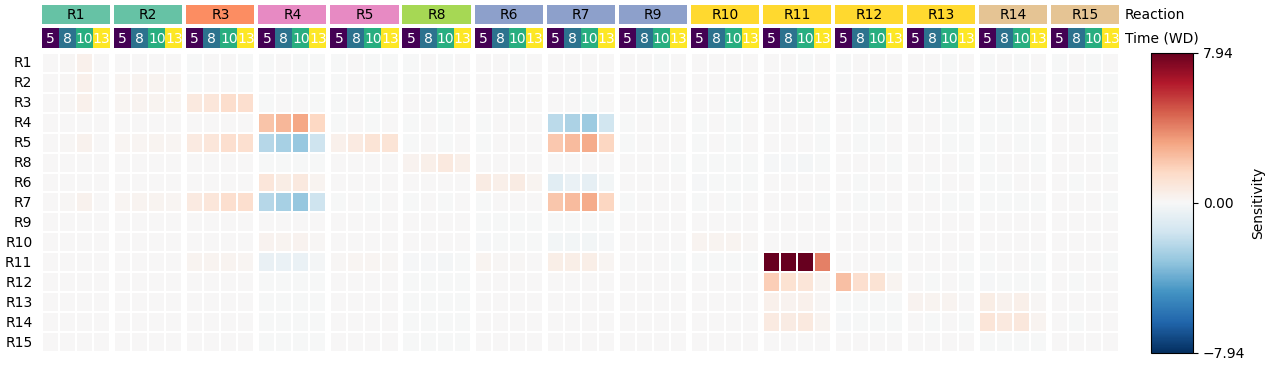

In [61]:
df = perturb_vref[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


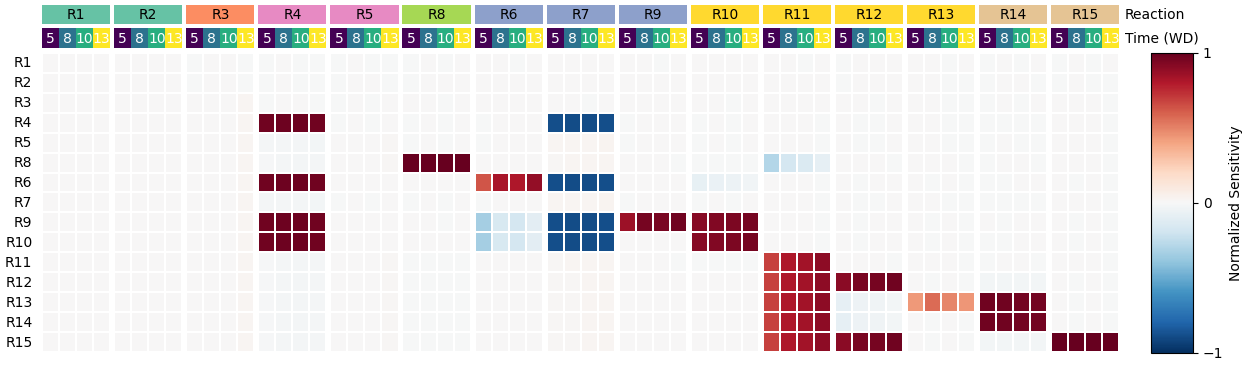

In [62]:
df = perturb_vref[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


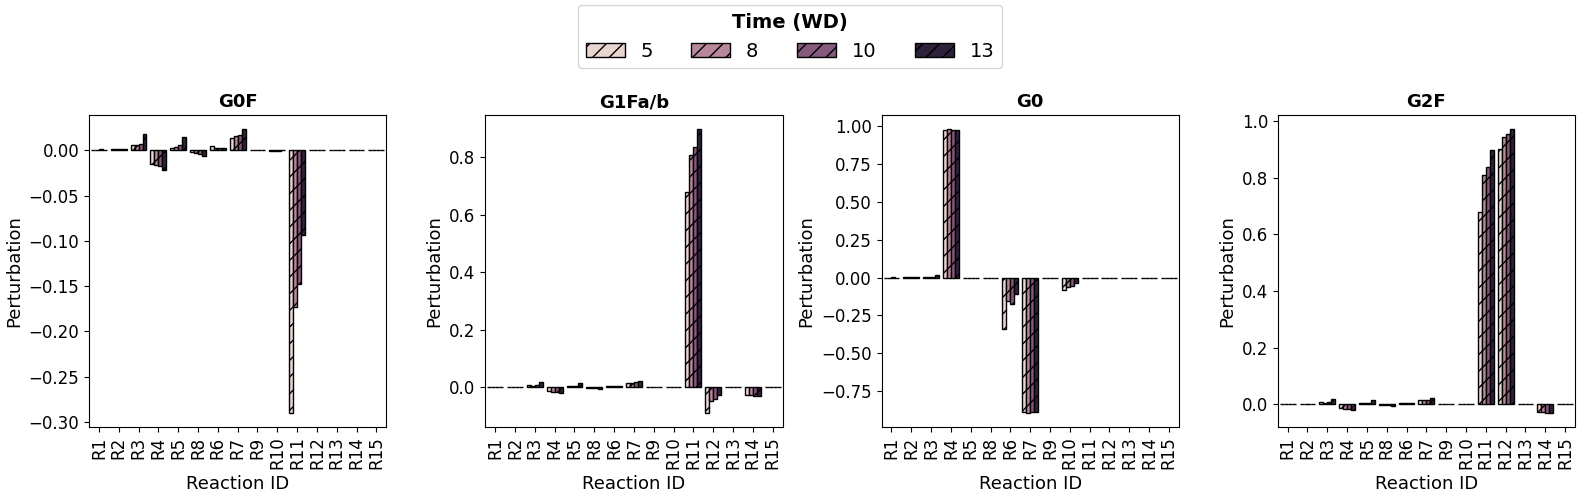

In [63]:
fig = res_data_medpH.plot_perturb(perturb_vref[pH_scale]['norm_dsecreted_flux'], x_col='Reaction ID', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


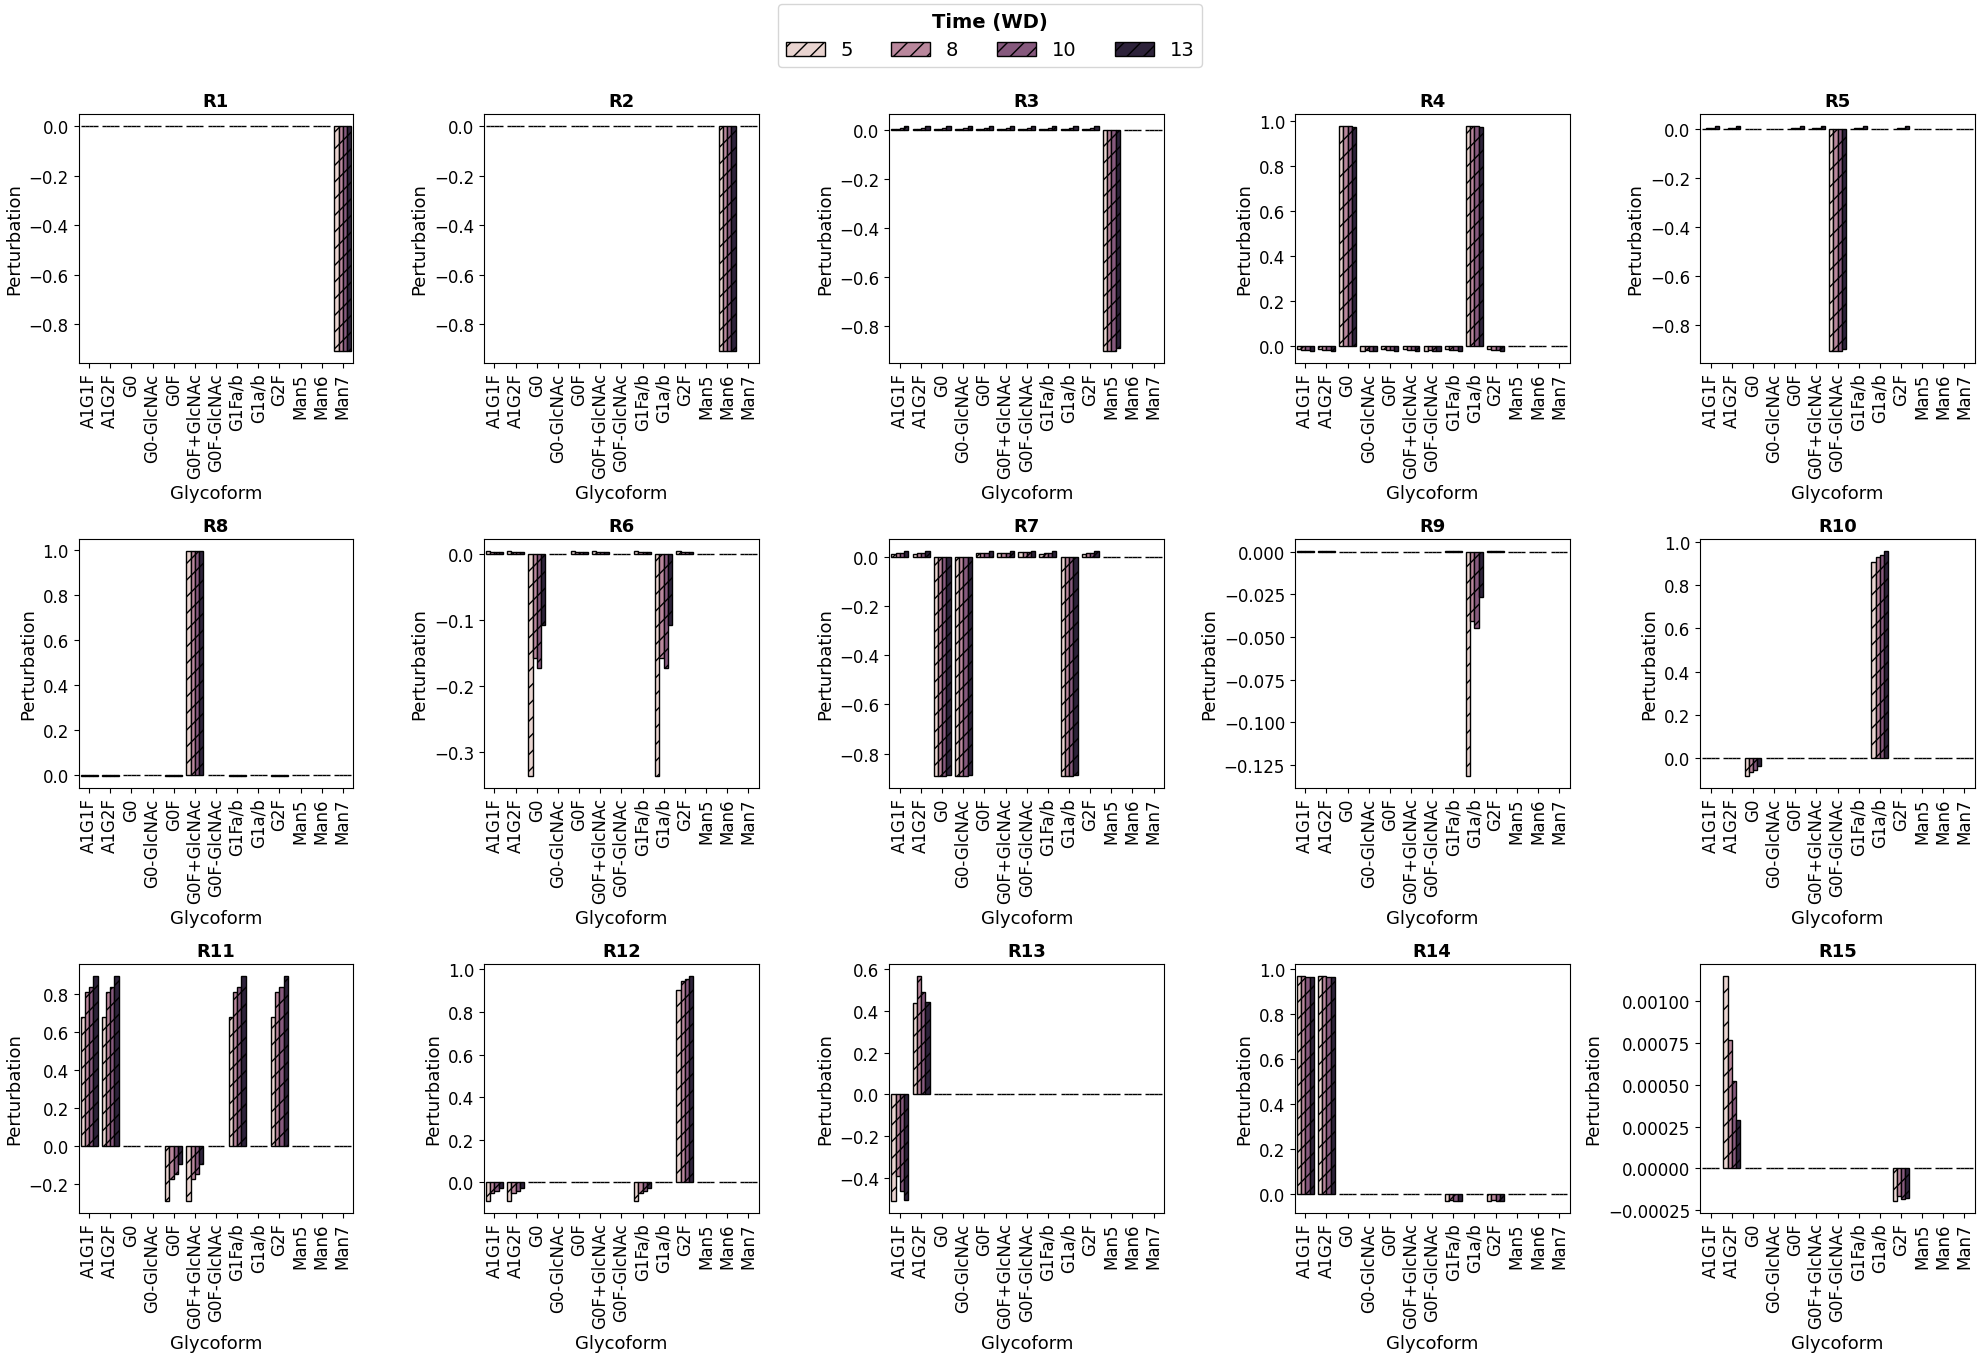

In [64]:
transposed_data = (perturb_vref[pH_scale]['norm_dsecreted_flux'].reset_index().
                   melt(id_vars=['Reaction ID', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Reaction ID', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_medpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=reaction_list, hatch='//')

### low pH

In [65]:
pH_scale = 'lowpH'

In [66]:
display(res_data_lowpH.summarize_runs())

In [67]:
top_n_results_lowpH = res_data_lowpH.choose_top_n('obj', 10, ascending=True)  # Used to plot error bars with lines

In [68]:
res_data_lowpH.sel_result(top_n_results_lowpH[1])
print(res_data_lowpH)


- Name: <undefined>
  Status: ok
  Return code: <undefined>
  Message: Ipopt 3.14.16\x3a Solved To Acceptable Level.
  User time: <undefined>
  System time: <undefined>
  Wallclock time: <undefined>
  Termination condition: optimal
  Termination message: <undefined>
  Id: 1
  Error rc: 0
  Time: 0.36841917037963867

Results class (name=None) with 100 experiments (Active=9):
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99


#### Alpha

{'marker': 'D', 'estimator': <function <lambda> at 0x7f0dca7d5ee0>}


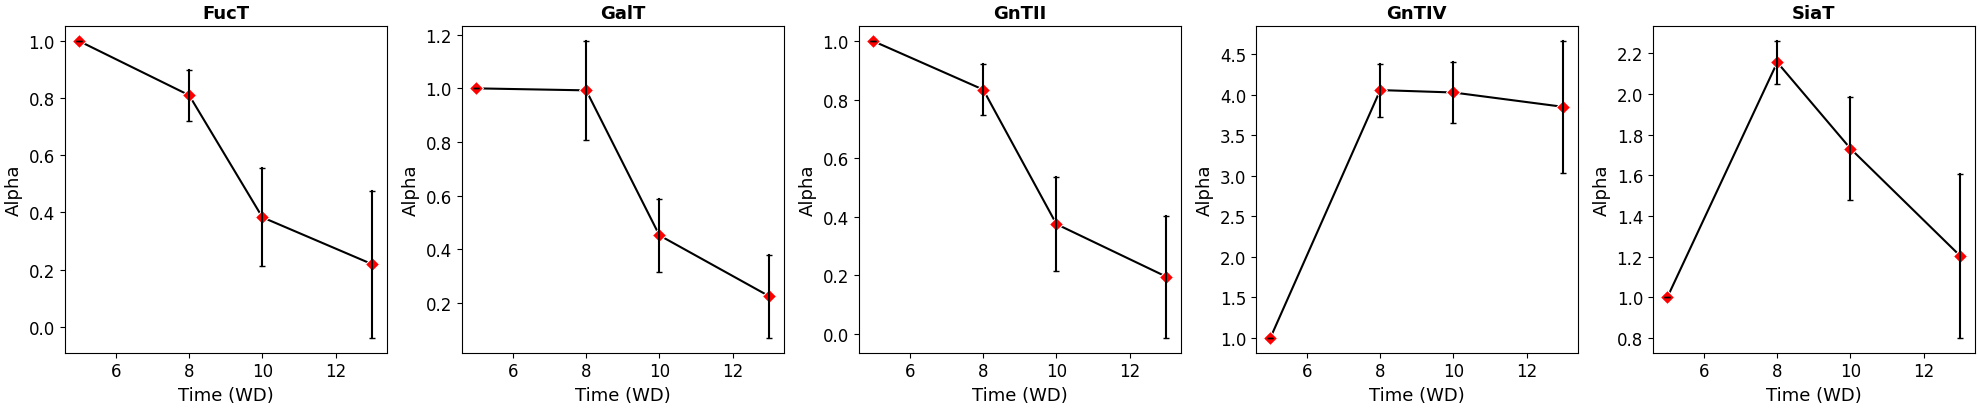

In [69]:
fig = res_data_lowpH.plot_alphas(time_col='Time (WD)', meas_cols=None, ncols=5, res_ids=top_n_results_lowpH, figsize=None, marker=pH_markers['lowpH'],
                                  estimator=lambda x: x.xs(top_n_results_lowpH[0], level=0).values)

#### Beta

{'marker': 'D', 'estimator': <function <lambda> at 0x7f0bdbd27c40>}
{'marker': 'D', 'estimator': <function <lambda> at 0x7f0bdbd27d80>}


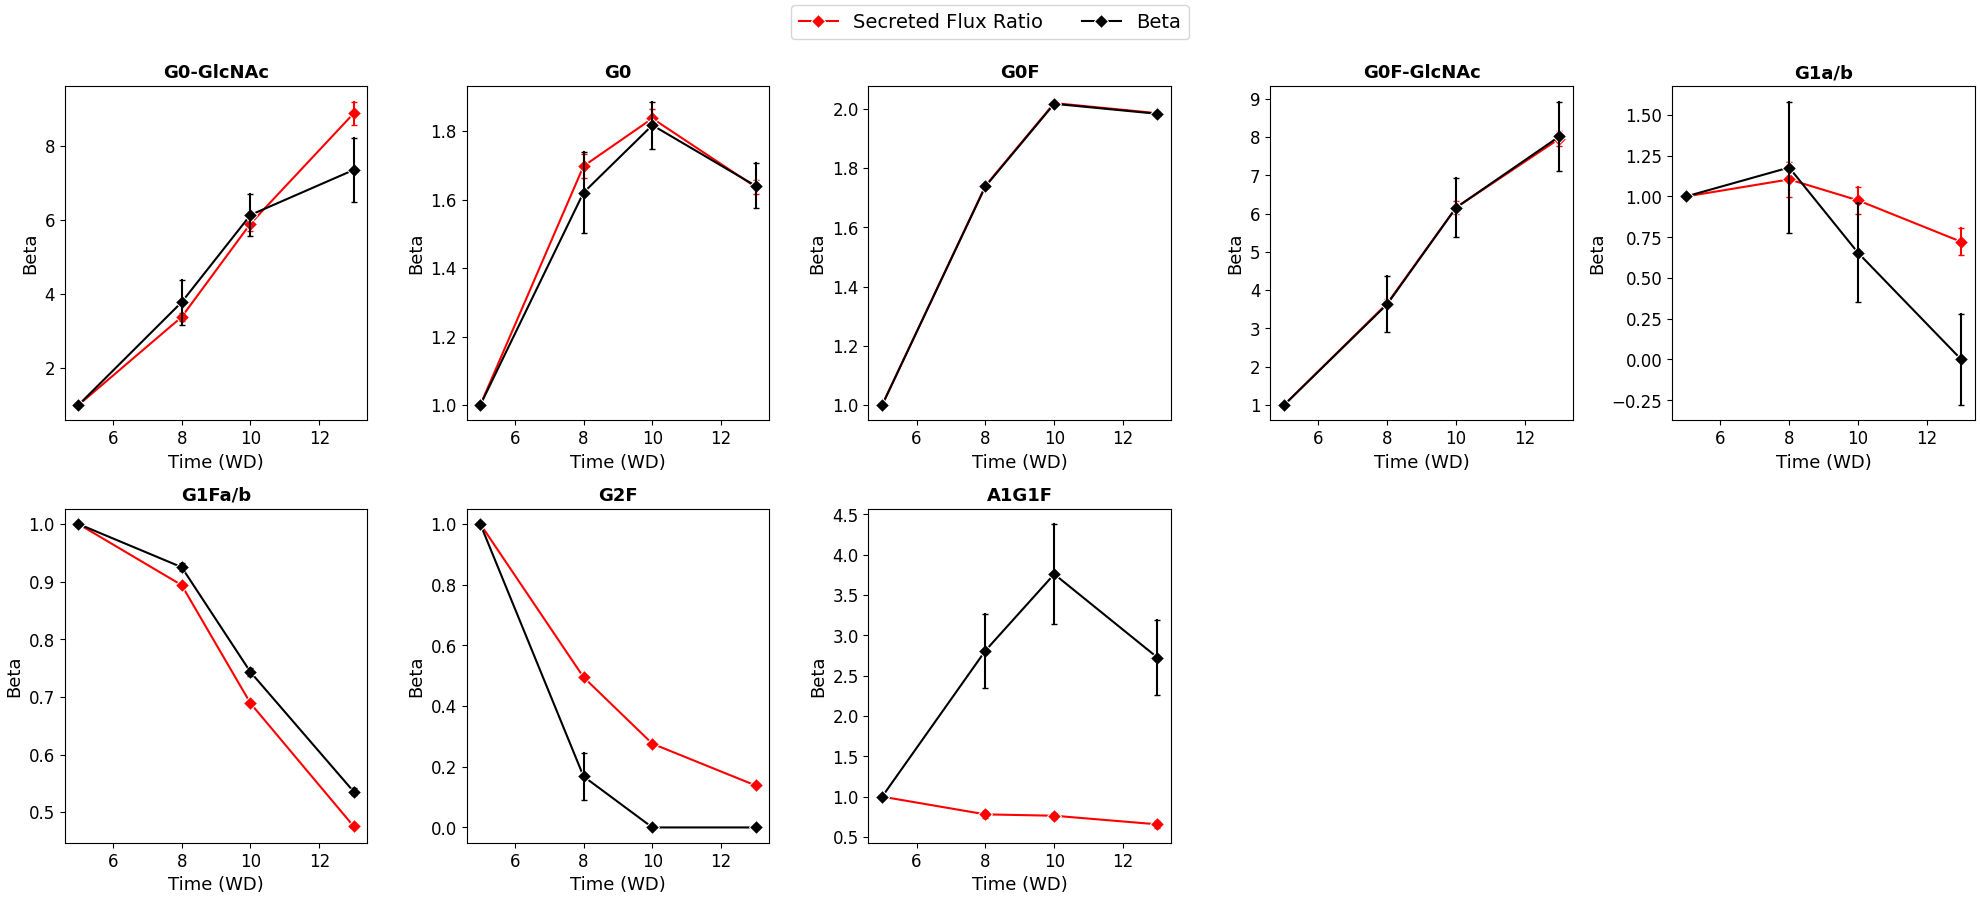

In [70]:
fig = res_data_lowpH.plot_betas(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_lowpH,
                                  orig_kwargs={'marker': pH_markers['lowpH'],
                                              'estimator': lambda x: x.xs(top_n_results_lowpH[0], level=0).values},
                                 smooth_kwargs={'marker': pH_markers['lowpH'],
                                                'estimator': lambda x: x.xs(top_n_results_lowpH[0], level=0).values})

#### Gamma

{'marker': 'D', 'estimator': <function <lambda> at 0x7f0be19ad440>}


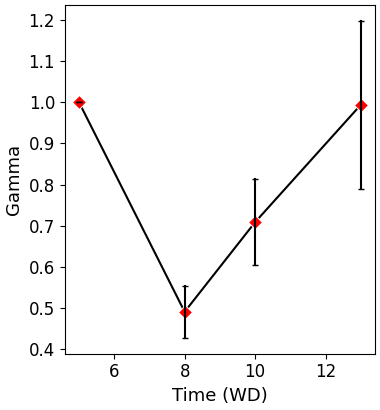

In [71]:
fig = res_data_lowpH.plot_gamma(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_lowpH, marker=pH_markers['lowpH'], estimator=lambda x: x.xs(top_n_results_lowpH[0], level=0).values)

#### Entry Flux

{'marker': 'D', 'estimator': <function <lambda> at 0x7f0be1e97ec0>}


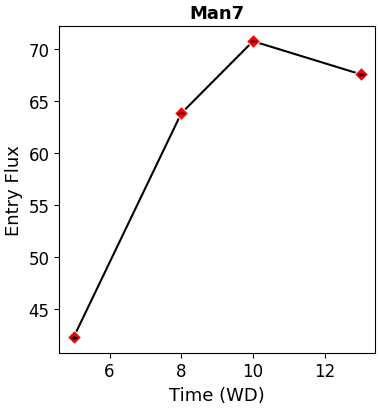

In [72]:
fig = res_data_lowpH.plot_entry_flux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_lowpH, marker=pH_markers['lowpH'], estimator=lambda x: x.xs(top_n_results_lowpH[0], level=0).values)

#### Reference Fluxes

None
{'hatch': '///', 'estimator': <function <lambda> at 0x7f0be1ef36a0>, 'zorder': 10}


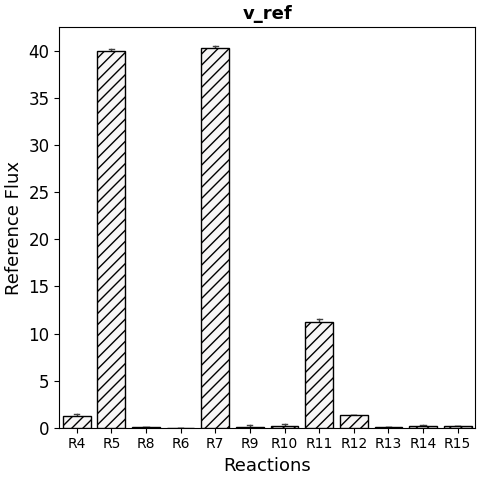

In [73]:
fig = res_data_lowpH.plot_vref(x_col='Reactions', meas_cols=None, ncols=5, figsize=(5, 5), res_ids=top_n_results_lowpH, hatch=pH_hatch_patterns['lowpH'], estimator=lambda x: x.xs(top_n_results_lowpH[0], level=0).values[0], zorder=10)
plt.setp(fig.axes[0].get_xticklabels(), fontsize=10)
plt.show()

#### Secreted Fluxes

{'marker': 'D'}
{'markersize': 0, 'estimator': <function <lambda> at 0x7f0bdb7e5da0>}


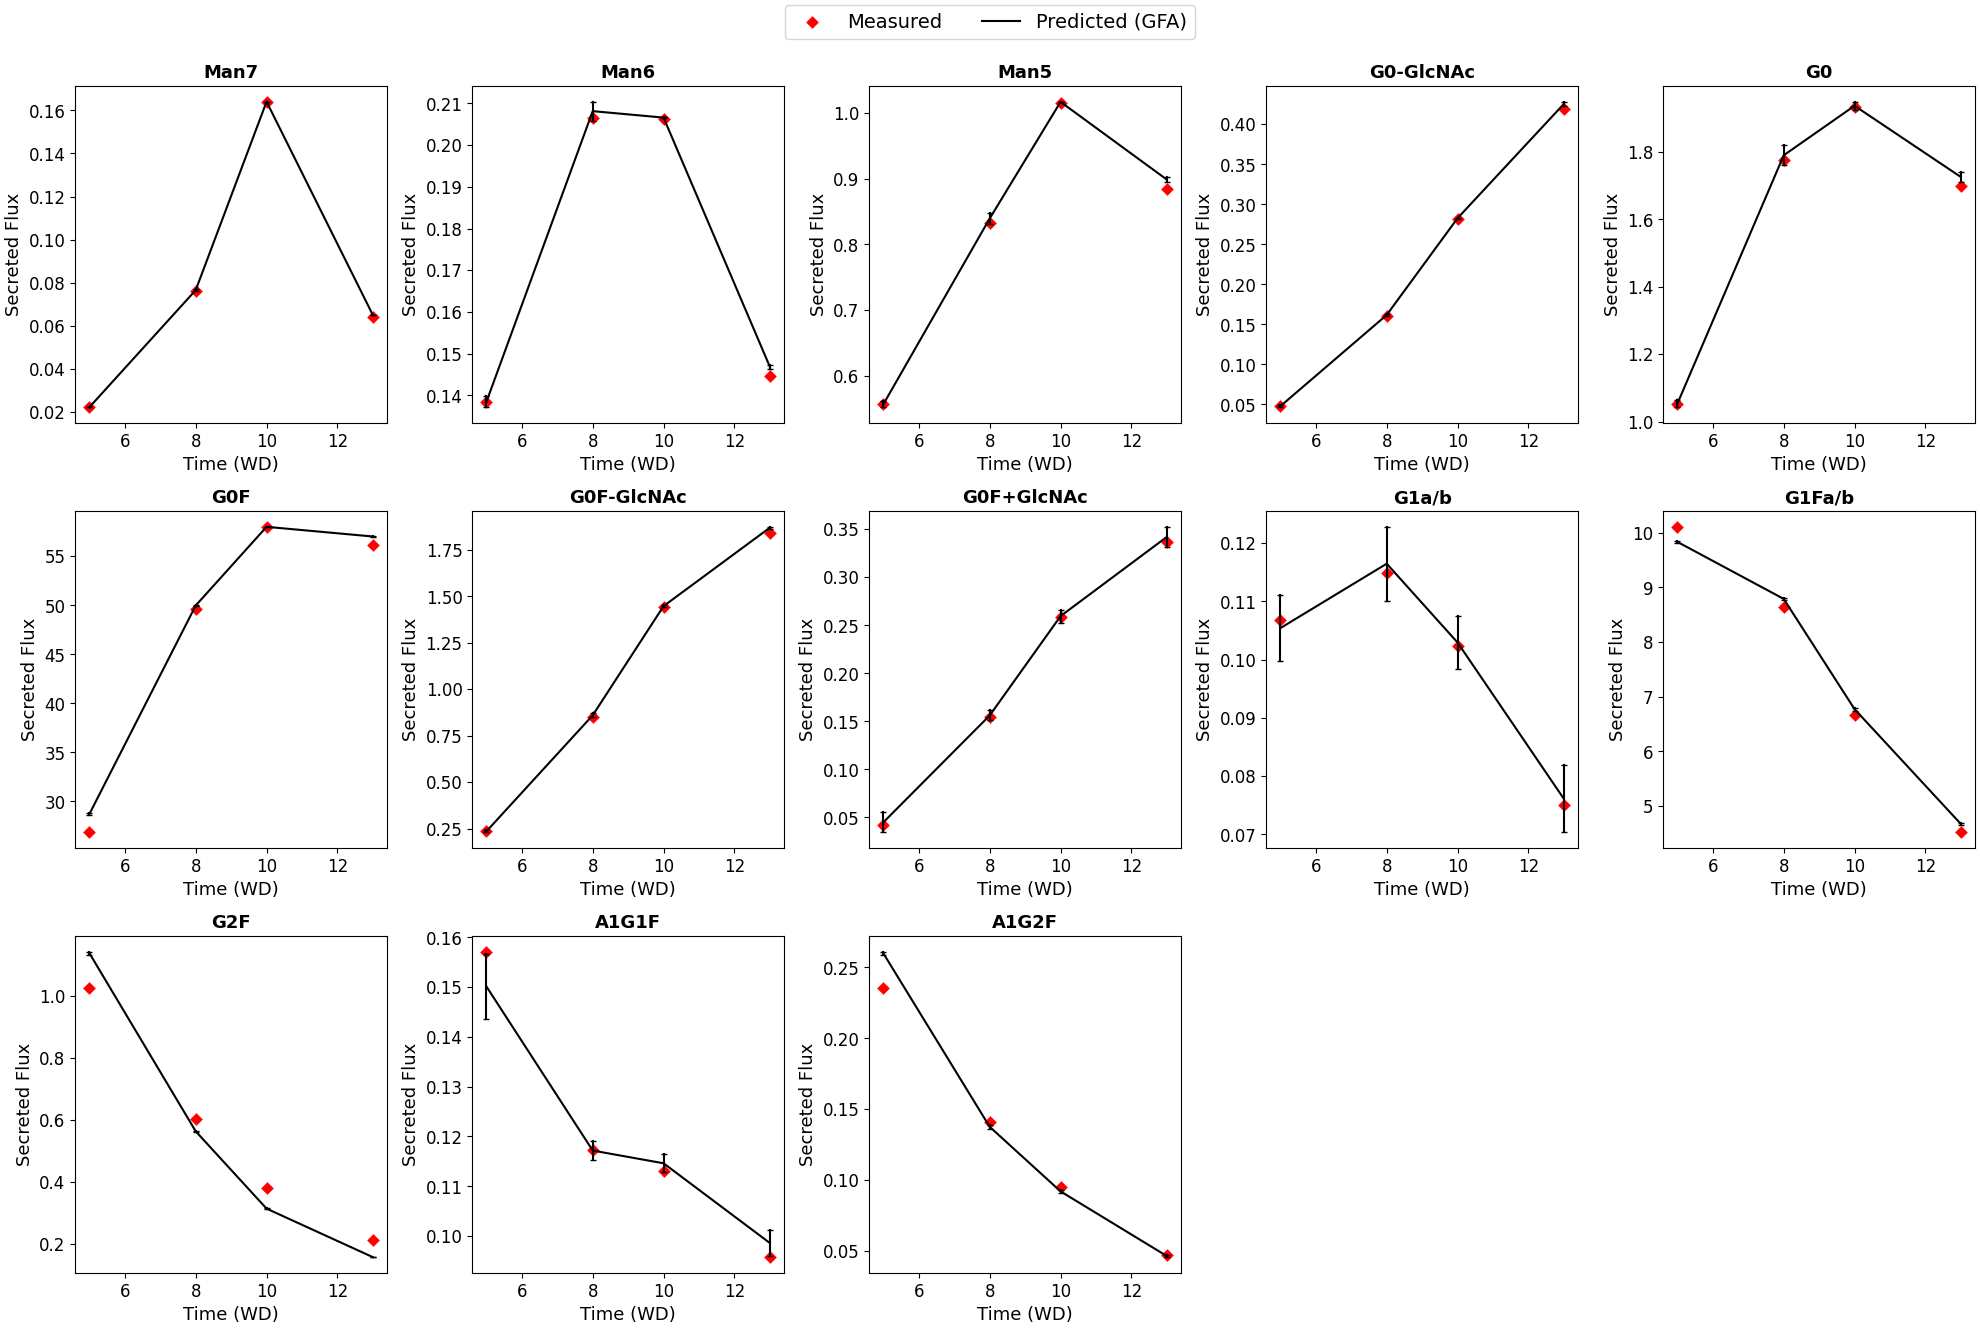

In [74]:
fig = res_data_lowpH.plot_secretedflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_lowpH, orig_kwargs={'marker': pH_markers['lowpH']}, smooth_kwargs={'markersize': 0, 'estimator': lambda x: x.xs(top_n_results_lowpH[0], level=0).values})

#### Internal Fluxes

{'marker': 'D', 'estimator': <function <lambda> at 0x7f0bd93e09a0>}


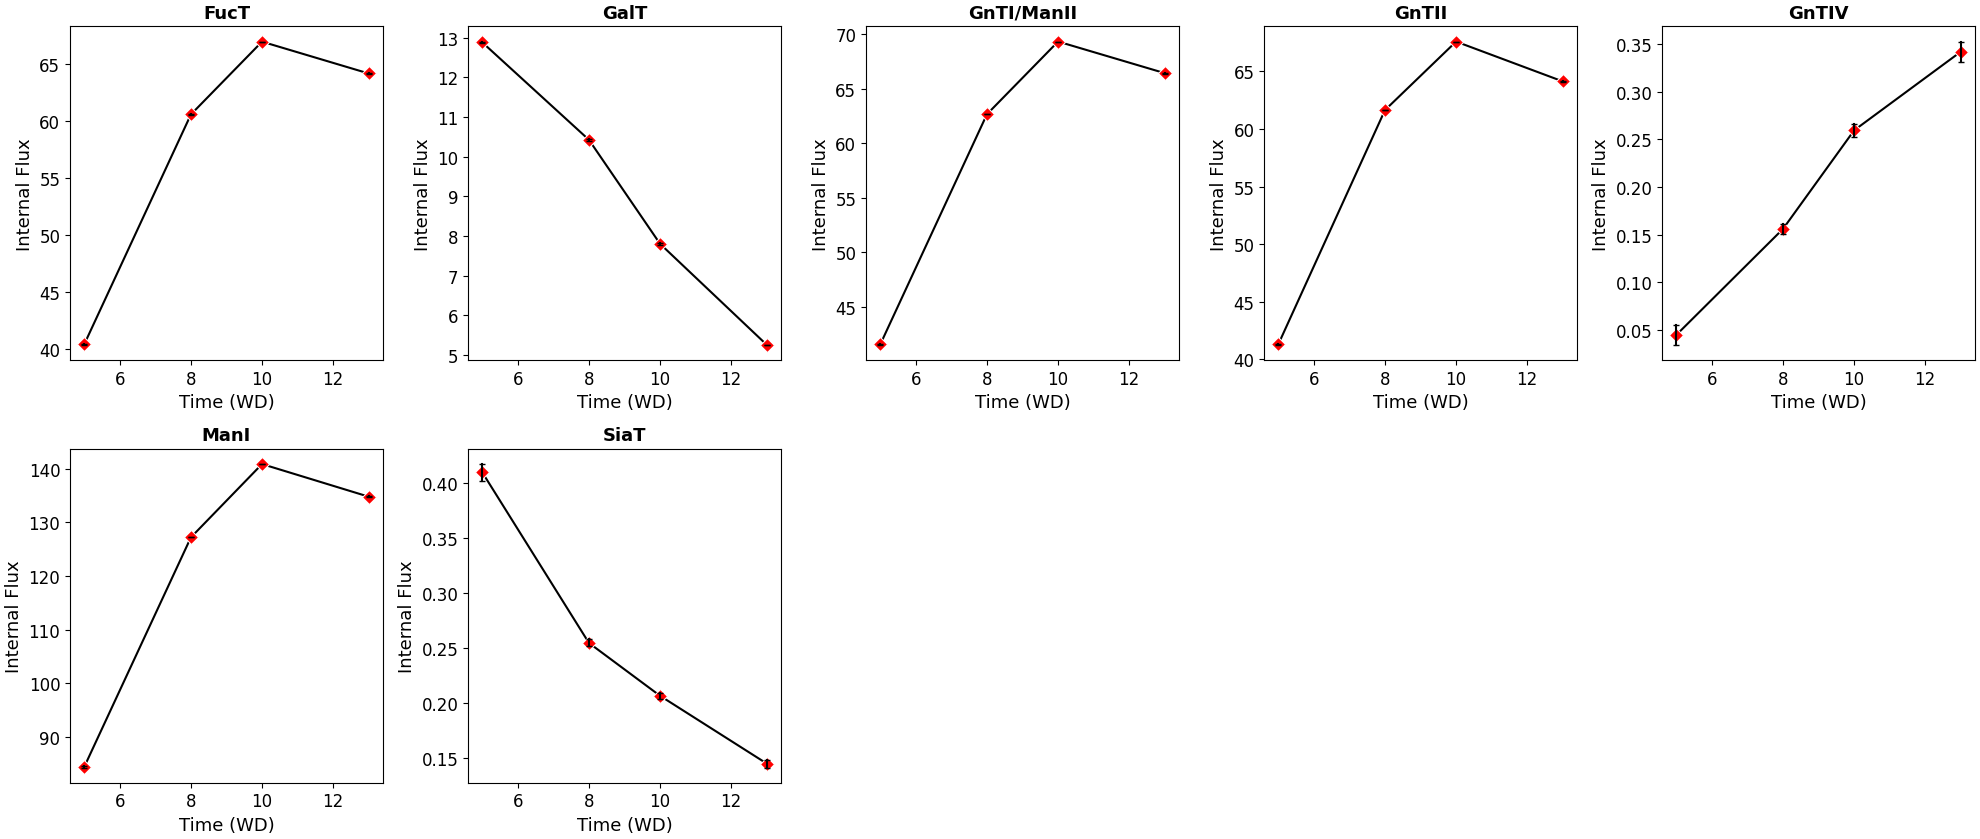

In [75]:
fig = res_data_lowpH.plot_internalflux(time_col='Time (WD)', meas_cols=None, ncols=5, figsize=None, res_ids=top_n_results_lowpH, marker=pH_markers['lowpH'], estimator=lambda x: x.xs(top_n_results_lowpH[0], level=0).values)

### Perturbation Analysis

In [76]:
perturb_results = res_data_lowpH.curr_result.copy()

#### Perturb alpha

In [77]:
result_alpha = res_data_lowpH.perturb_alpha(model_perturb, enzyme_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_alpha[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Enzymes'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/7 [00:00<?]

alpha_deltapert : Size=28, Index=timepoints*enzymes, Domain=NonNegativeReals, Default=None, Mutable=False
    Key                : Value
           (5, 'FucT') :     1
           (5, 'GalT') :     1
     (5, 'GnTI/ManII') :     1
          (5, 'GnTII') :     1
          (5, 'GnTIV') :     1
           (5, 'ManI') :   1.1
           (5, 'SiaT') :     1
           (8, 'FucT') :     1
           (8, 'GalT') :     1
     (8, 'GnTI/ManII') :     1
          (8, 'GnTII') :     1
          (8, 'GnTIV') :     1
           (8, 'ManI') :   1.1
           (8, 'SiaT') :     1
          (10, 'FucT') :     1
          (10, 'GalT') :     1
    (10, 'GnTI/ManII') :     1
         (10, 'GnTII') :     1
         (10, 'GnTIV') :     1
          (10, 'ManI') :   1.1
          (10, 'SiaT') :     1
          (13, 'FucT') :     1
          (13, 'GalT') :     1
    (13, 'GnTI/ManII') :     1
         (13, 'GnTII') :     1
         (13, 'GnTIV') :     1
          (13, 'ManI') :   1.1
          (13, 'SiaT') :  

##### Unnormalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


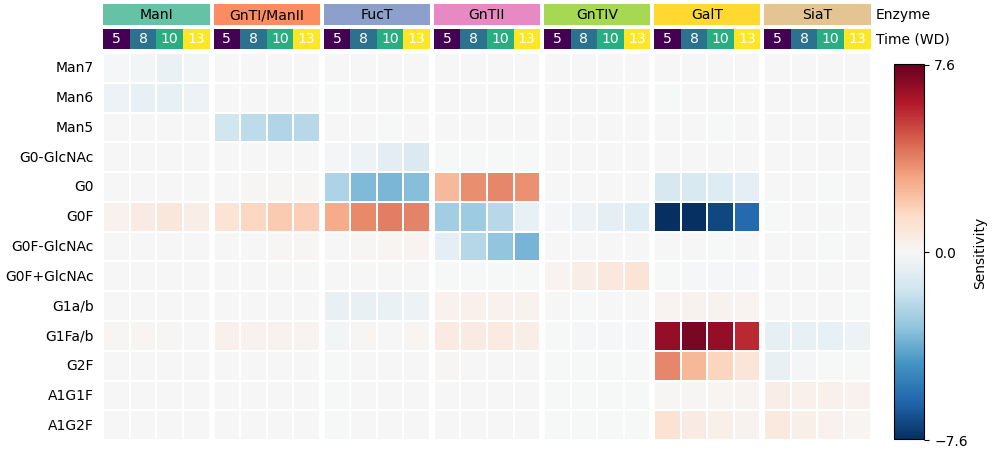

In [78]:
df = perturb_alpha[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Normalized dflux/dalpha for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


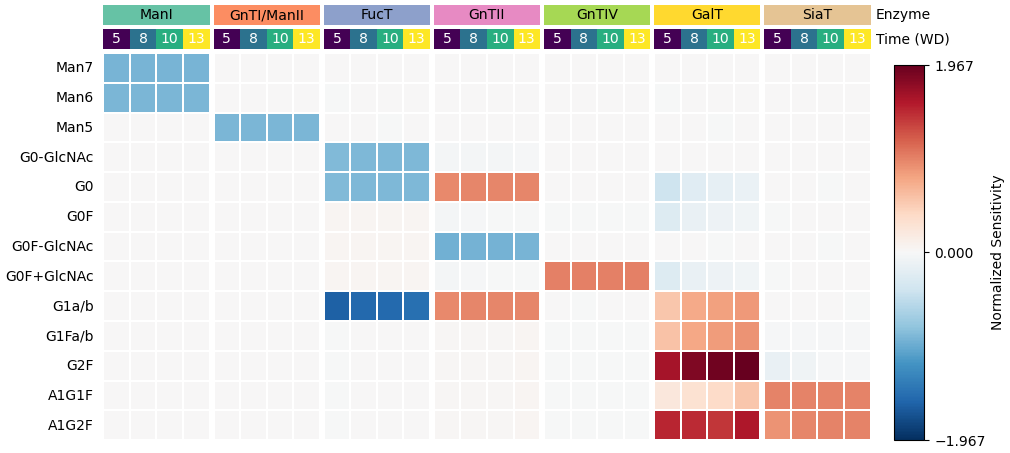

In [79]:
df = perturb_alpha[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])
fig = cm.ax.get_figure()

##### Unnormalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


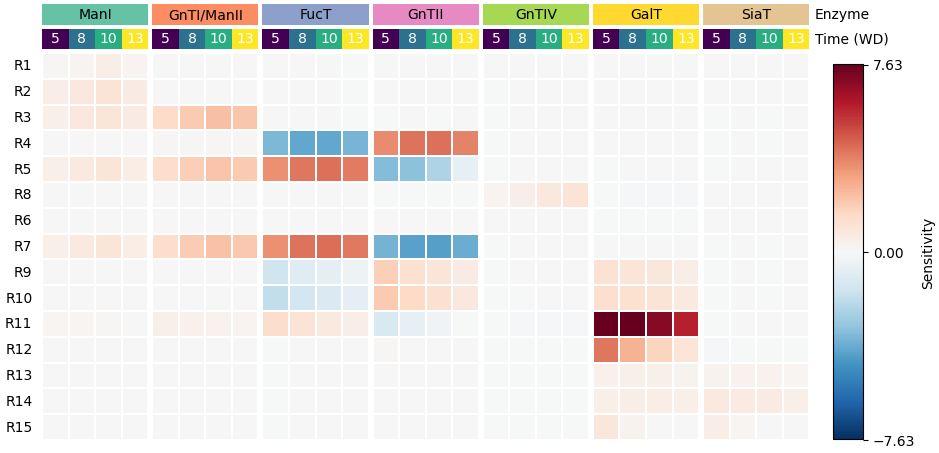

In [80]:
df = perturb_alpha[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dalpha for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


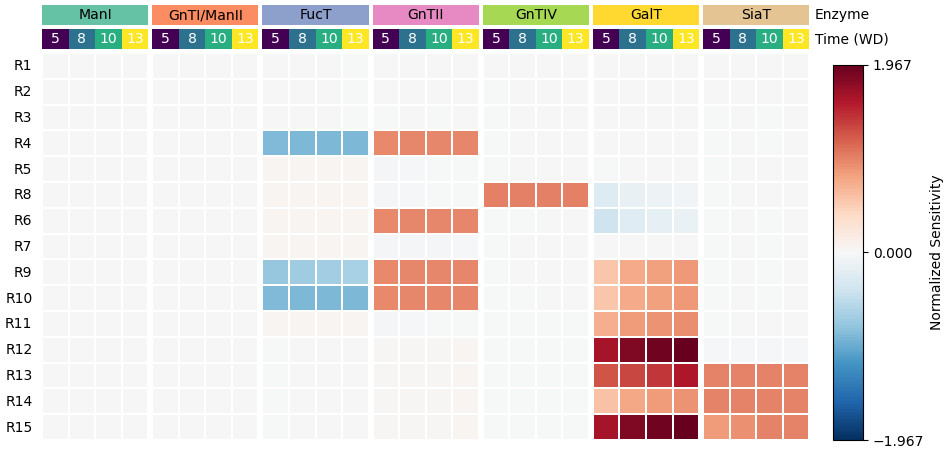

In [81]:
df = perturb_alpha[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['enz', 't'])
plt.figure(figsize=(10, 5))
top_annotations = {'Enzyme': pch.anno_simple(df_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['enz'], col_split_order=df_meta['enz'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


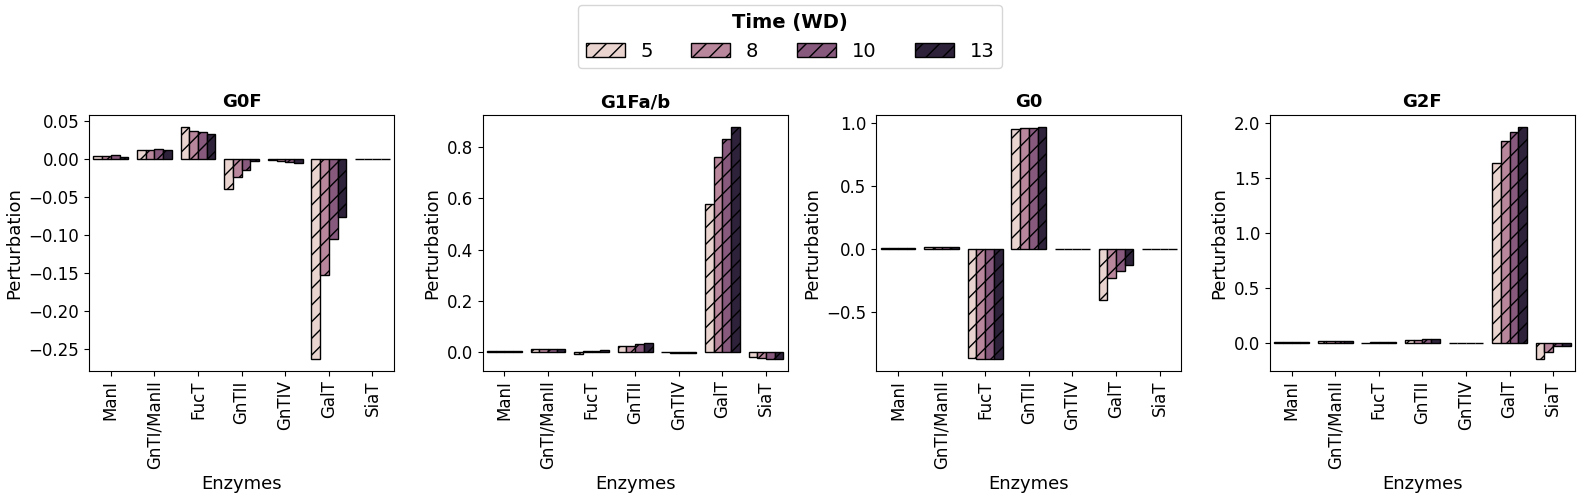

In [82]:
fig = res_data_lowpH.plot_perturb(perturb_alpha[pH_scale]['norm_dsecreted_flux'], x_col='Enzymes', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


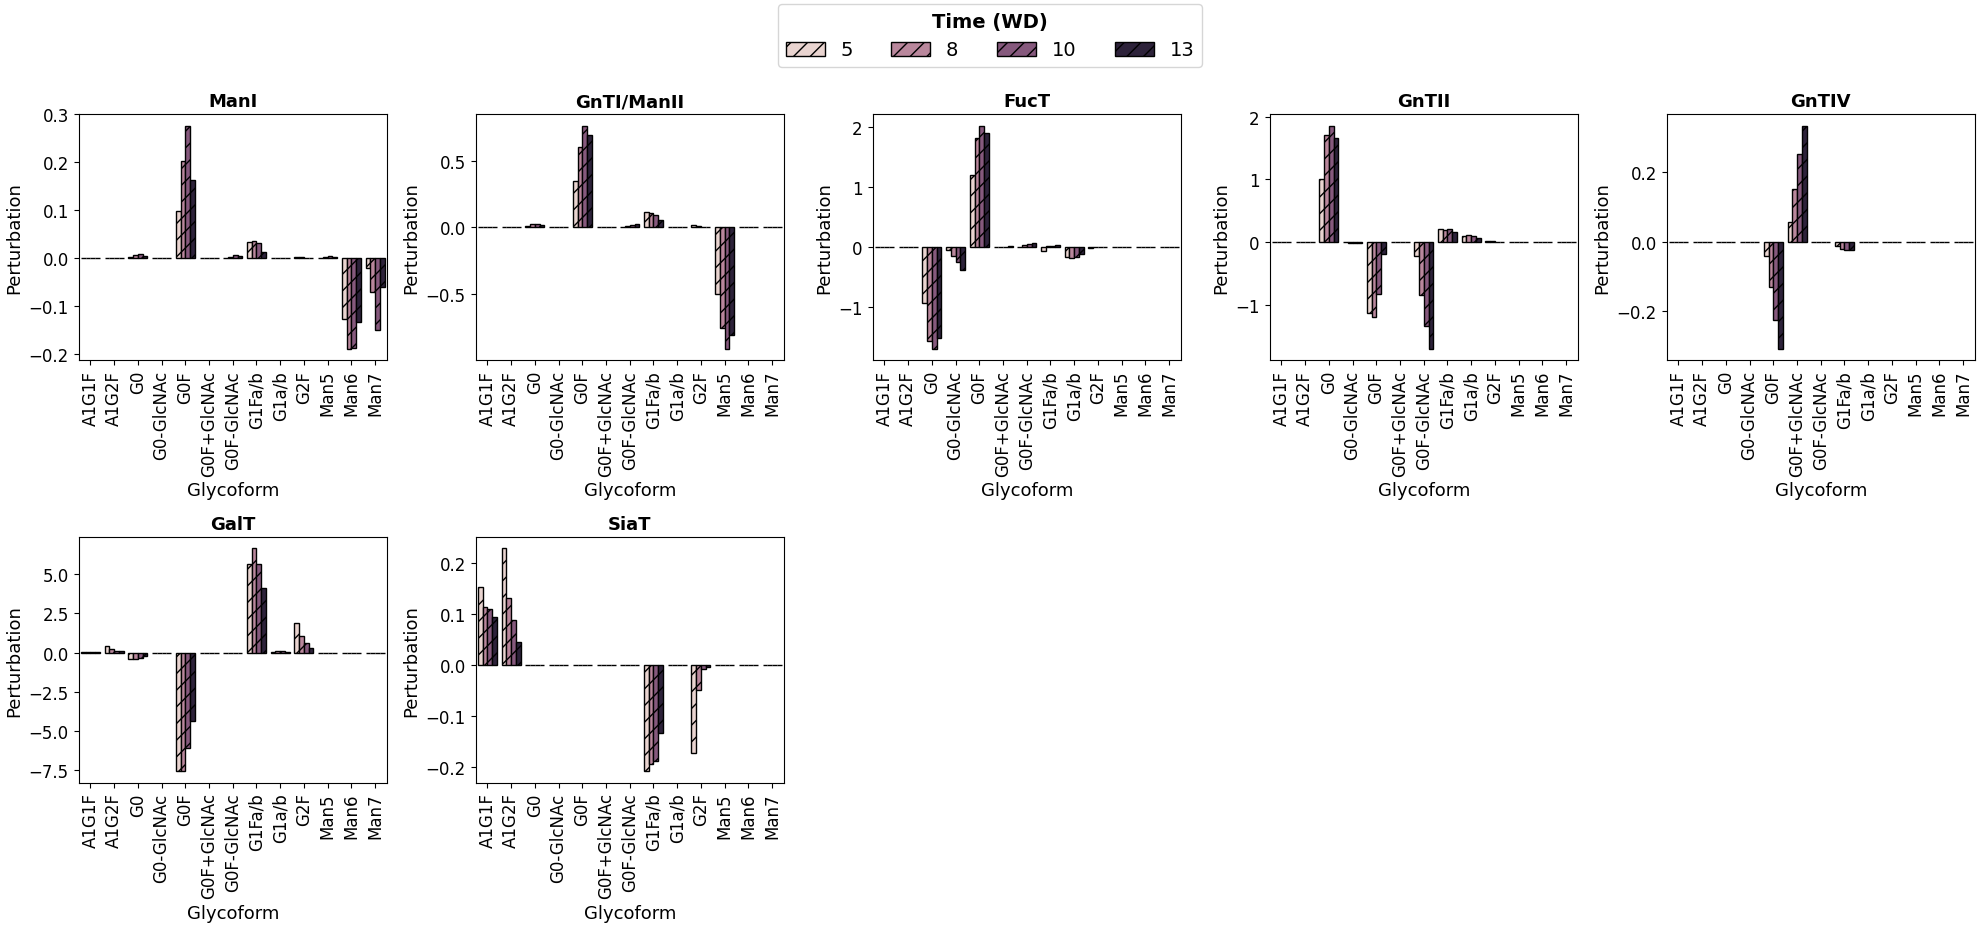

In [83]:
transposed_data = (perturb_alpha[pH_scale]['dsecreted_flux'].reset_index().
                   melt(id_vars=['Enzymes', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Enzymes', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_lowpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=enzyme_list, hatch='//')

#### Perturb 1 reaction at a time

In [84]:
result_alpha = res_data_lowpH.perturb_vref(model_perturb, reaction_list, perc_val=0.1, get_fullresults=True, nominal_result=perturb_results)
perturb_vref[pH_scale] = {e: (pd.concat({k: v[e] for k, v in result_alpha.items() if e in v}, names=['Reaction ID'])) for i, e in enumerate(['dsecreted_flux', 'norm_dsecreted_flux', 'dinternal_flux', 'norm_dinternal_flux', 'beta_delta'])}

Progress:   0%|          | 0/15 [00:00<?]

vref_deltapert : Size=15, Index=internal_rxns, Domain=NonNegativeReals, Default=None, Mutable=False
    Key : Value
     R1 :   1.1
    R10 :     1
    R11 :     1
    R12 :     1
    R13 :     1
    R14 :     1
    R15 :     1
     R2 :     1
     R3 :     1
     R4 :     1
     R5 :     1
     R6 :     1
     R7 :     1
     R8 :     1
     R9 :     1
Ipopt 3.14.16: max_iter=100000
linear_solver=mumps
warm_start_init_point=yes
print_level=4


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:       44
                     variables with only lower bounds:        0
                variables with lower 

##### Unnormalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


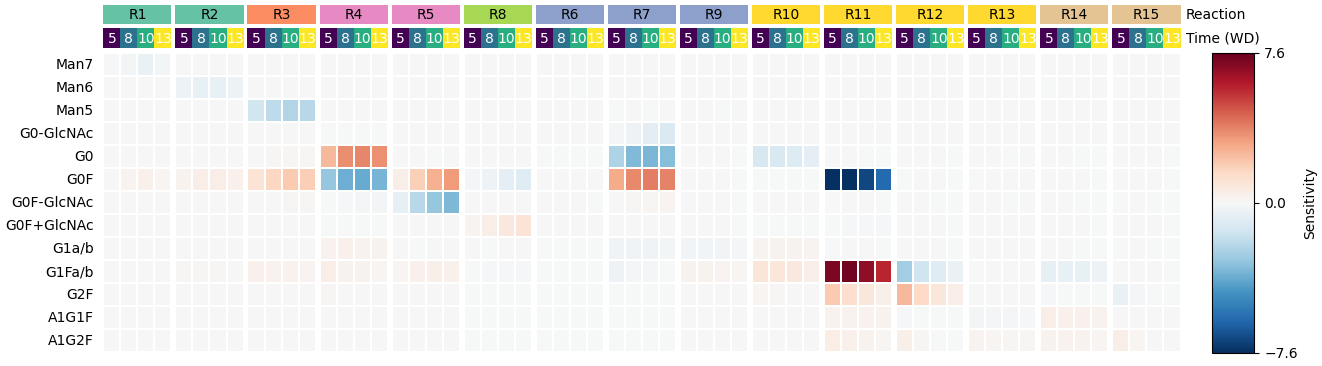

In [85]:
df = perturb_vref[pH_scale]['dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for Secreted Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


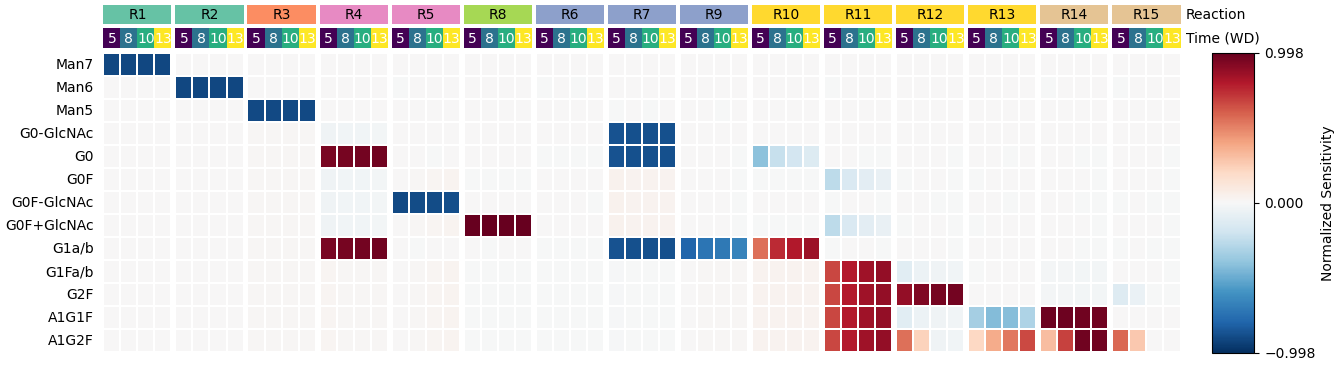

In [86]:
df = perturb_vref[pH_scale]['norm_dsecreted_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Unnormalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


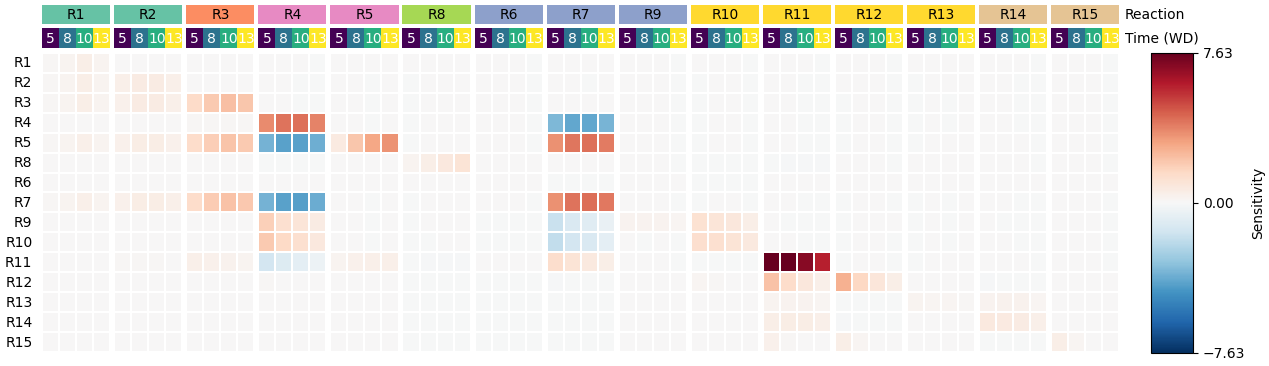

In [87]:
df = perturb_vref[pH_scale]['dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

##### Normalized dflux/dreaction for internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


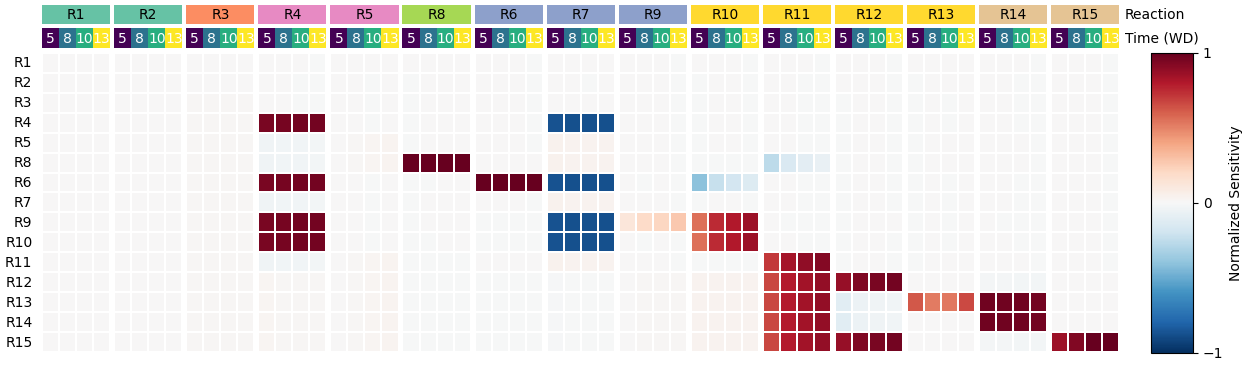

In [88]:
df = perturb_vref[pH_scale]['norm_dinternal_flux'].T
df_meta = df.columns.to_frame(name=['rxn', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'Reaction': pch.anno_simple(df_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['rxn'], col_split_order=df_meta['rxn'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

{'hatch': '//'}


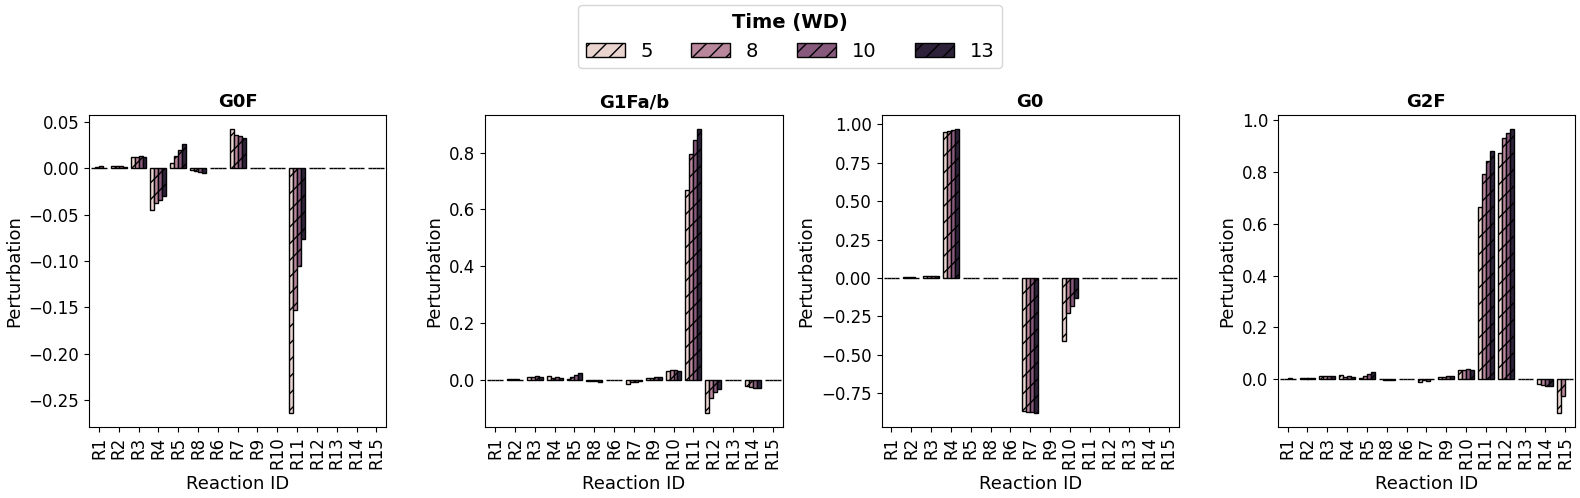

In [89]:
fig = res_data_lowpH.plot_perturb(perturb_vref[pH_scale]['norm_dsecreted_flux'], x_col='Reaction ID', time_col='Time (WD)', meas_cols=['G0F', 'G1Fa/b', 'G0', 'G2F'], hatch='//')

{'hatch': '//'}


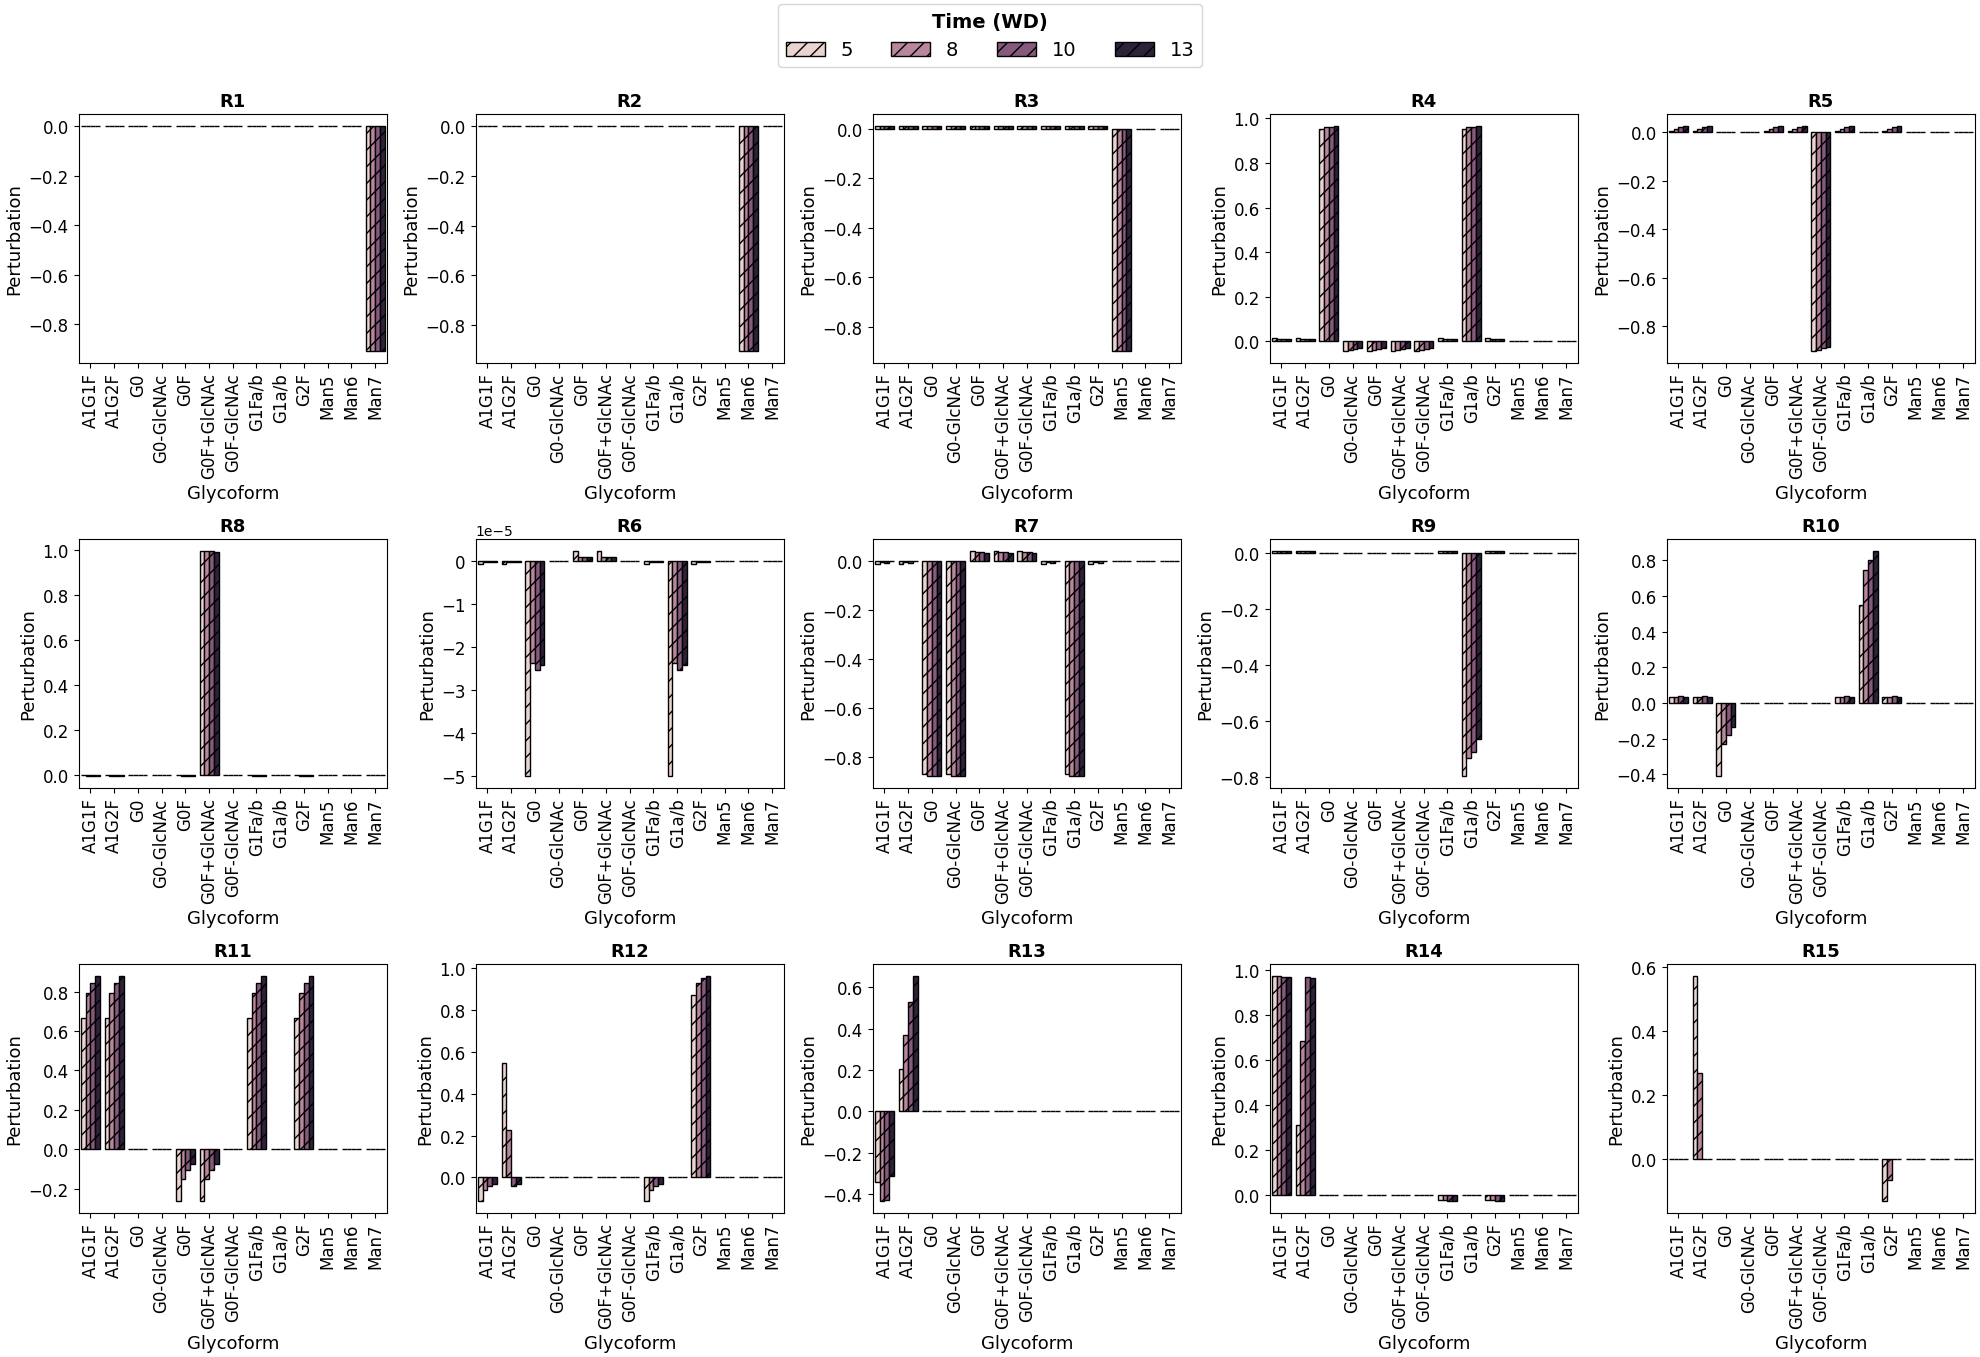

In [90]:
transposed_data = (perturb_vref[pH_scale]['norm_dsecreted_flux'].reset_index().
                   melt(id_vars=['Reaction ID', 'Time (WD)'], var_name='Glycoform').
                   pivot(columns='Reaction ID', index=['Glycoform', 'Time (WD)']).droplevel(level=0, axis='columns'))
fig = res_data_lowpH.plot_perturb(transposed_data, x_col='Glycoform', time_col='Time (WD)', meas_cols=reaction_list, hatch='//')

## Plot all pH together

In [91]:
top_results_pH = {'lowpH': top_n_results_lowpH[1], 'medpH': top_n_results_medpH[0], 'highpH': top_n_results_highpH[0]}

In [92]:
# orig_data_all = {}
# orig_data_all['lowpH'] = res_data_lowpH.get_params_n([top_results_pH['lowpH']], 'secreted_flux_data')
# orig_data_all['medpH'] = res_data_medpH.get_params_n([top_results_pH['medpH']], 'secreted_flux_data')
# orig_data_all['highpH'] = res_data_highpH.get_params_n([top_results_pH['highpH']], 'secreted_flux_data')

# smooth_data_all = {}
# smooth_data_all['lowpH'] = res_data_lowpH.get_params_n([top_results_pH['lowpH']], 'secreted_flux')
# smooth_data_all['medpH'] = res_data_medpH.get_params_n([top_results_pH['medpH']], 'secreted_flux')
# smooth_data_all['highpH'] = res_data_highpH.get_params_n([top_results_pH['highpH']], 'secreted_flux')

# np.sqrt((((orig_data_all['highpH'] - smooth_data_all['highpH'])**2)/orig_data_all['highpH']).sum())

### Secreted Fluxes Fit

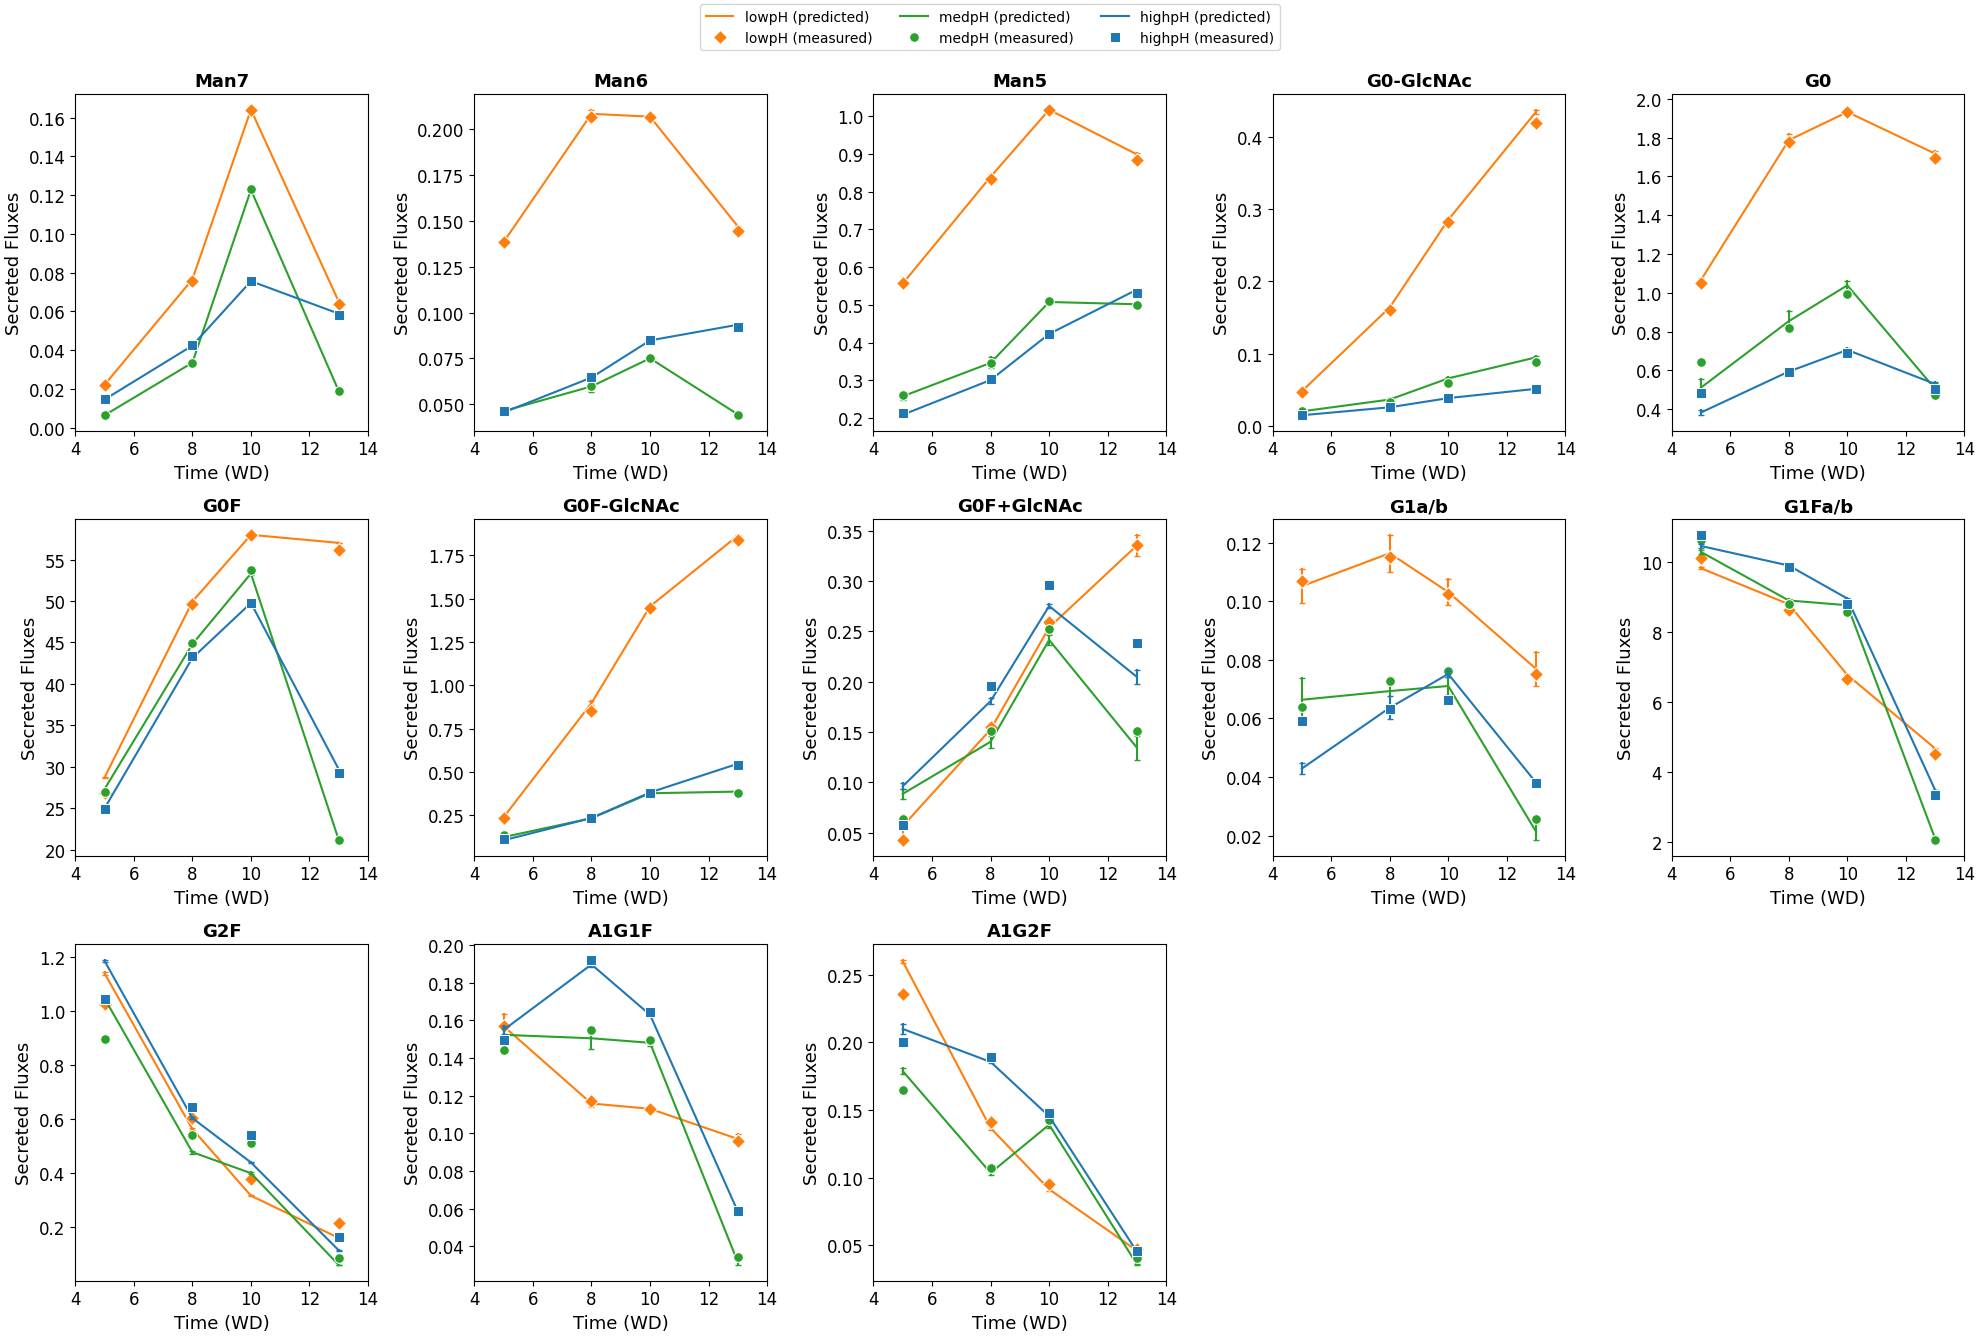

In [93]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'secreted_flux_data')
orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'secreted_flux_data')
orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'secreted_flux_data')

smooth_data_all = {}
smooth_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'secreted_flux')
smooth_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'secreted_flux')
smooth_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'secreted_flux')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
nrows = 3
ncols = np.ceil(len(meas_cols)/nrows).astype(int)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4.3), layout='tight', sharey=False, sharex=False)
axes = axes.ravel()

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 - ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=smooth_data_all[pH_scale], x=time_col, y=meas_col, c=pH_colors[pH_scale], label=pH_scale+' (predicted)', ax=axes[j],
                     errorbar='sd',
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c=pH_colors[pH_scale], label=pH_scale+' (measured)', ax=axes[j],
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor=pH_colors[pH_scale],
                     linestyle='',
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        if i<len(pH_scales):
            axes[j].get_legend().remove()
        axes[j].set_xlabel(axes[j].get_xlabel(), fontsize=13)
        axes[j].set_ylabel('Secreted Fluxes', fontsize=13)
        axes[j].set_title(meas_col, fontsize=13, fontweight='bold')
        axes[j].set_xlim((4, 14))
        plt.setp(axes[j].get_xticklabels(), fontsize=12)
        plt.setp(axes[j].get_yticklabels(), fontsize=12)

for k in np.arange(j+1, len(axes)):
    axes[k].set_axis_off()

handles, labels = axes[len(meas_cols)-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1), frameon=True)
# for ax, row in zip(axes, pH_scales):
#     ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 size=14, ha='right', va='center', fontweight='bold')

### Alpha

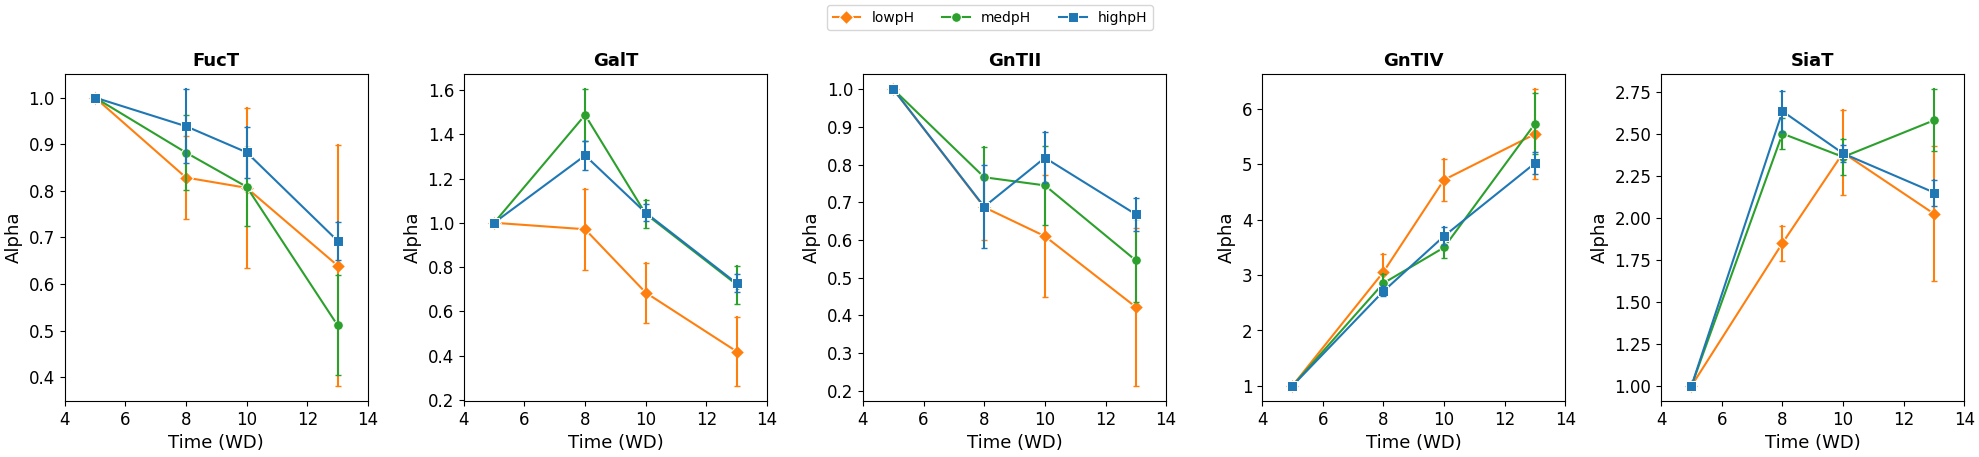

In [94]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'alpha')
orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'alpha')
orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'alpha')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
nrows = len(pH_scales)
ncols = len(meas_cols)
fig, axes = plt.subplots(1, ncols, figsize=(ncols*4, 1*4.3), layout='tight', sharey='col', sharex=False)

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 - ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c=pH_colors[pH_scale], label=pH_scale, ax=axes[j],
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor=pH_colors[pH_scale],
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        if i<len(pH_scales):
            axes[j].get_legend().remove()
        axes[j].set_xlabel(axes[j].get_xlabel(), fontsize=13)
        axes[j].set_ylabel('Alpha', fontsize=13)
        axes[j].set_title(meas_col, fontsize=13, fontweight='bold')
        axes[j].set_xlim((4, 14))
        plt.setp(axes[j].get_xticklabels(), fontsize=12)
        plt.setp(axes[j].get_yticklabels(), fontsize=12)

handles, labels = axes[len(meas_cols)-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1), frameon=True)
# for ax, row in zip(axes, pH_scales):
#     ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 size=14, ha='right', va='center', fontweight='bold')

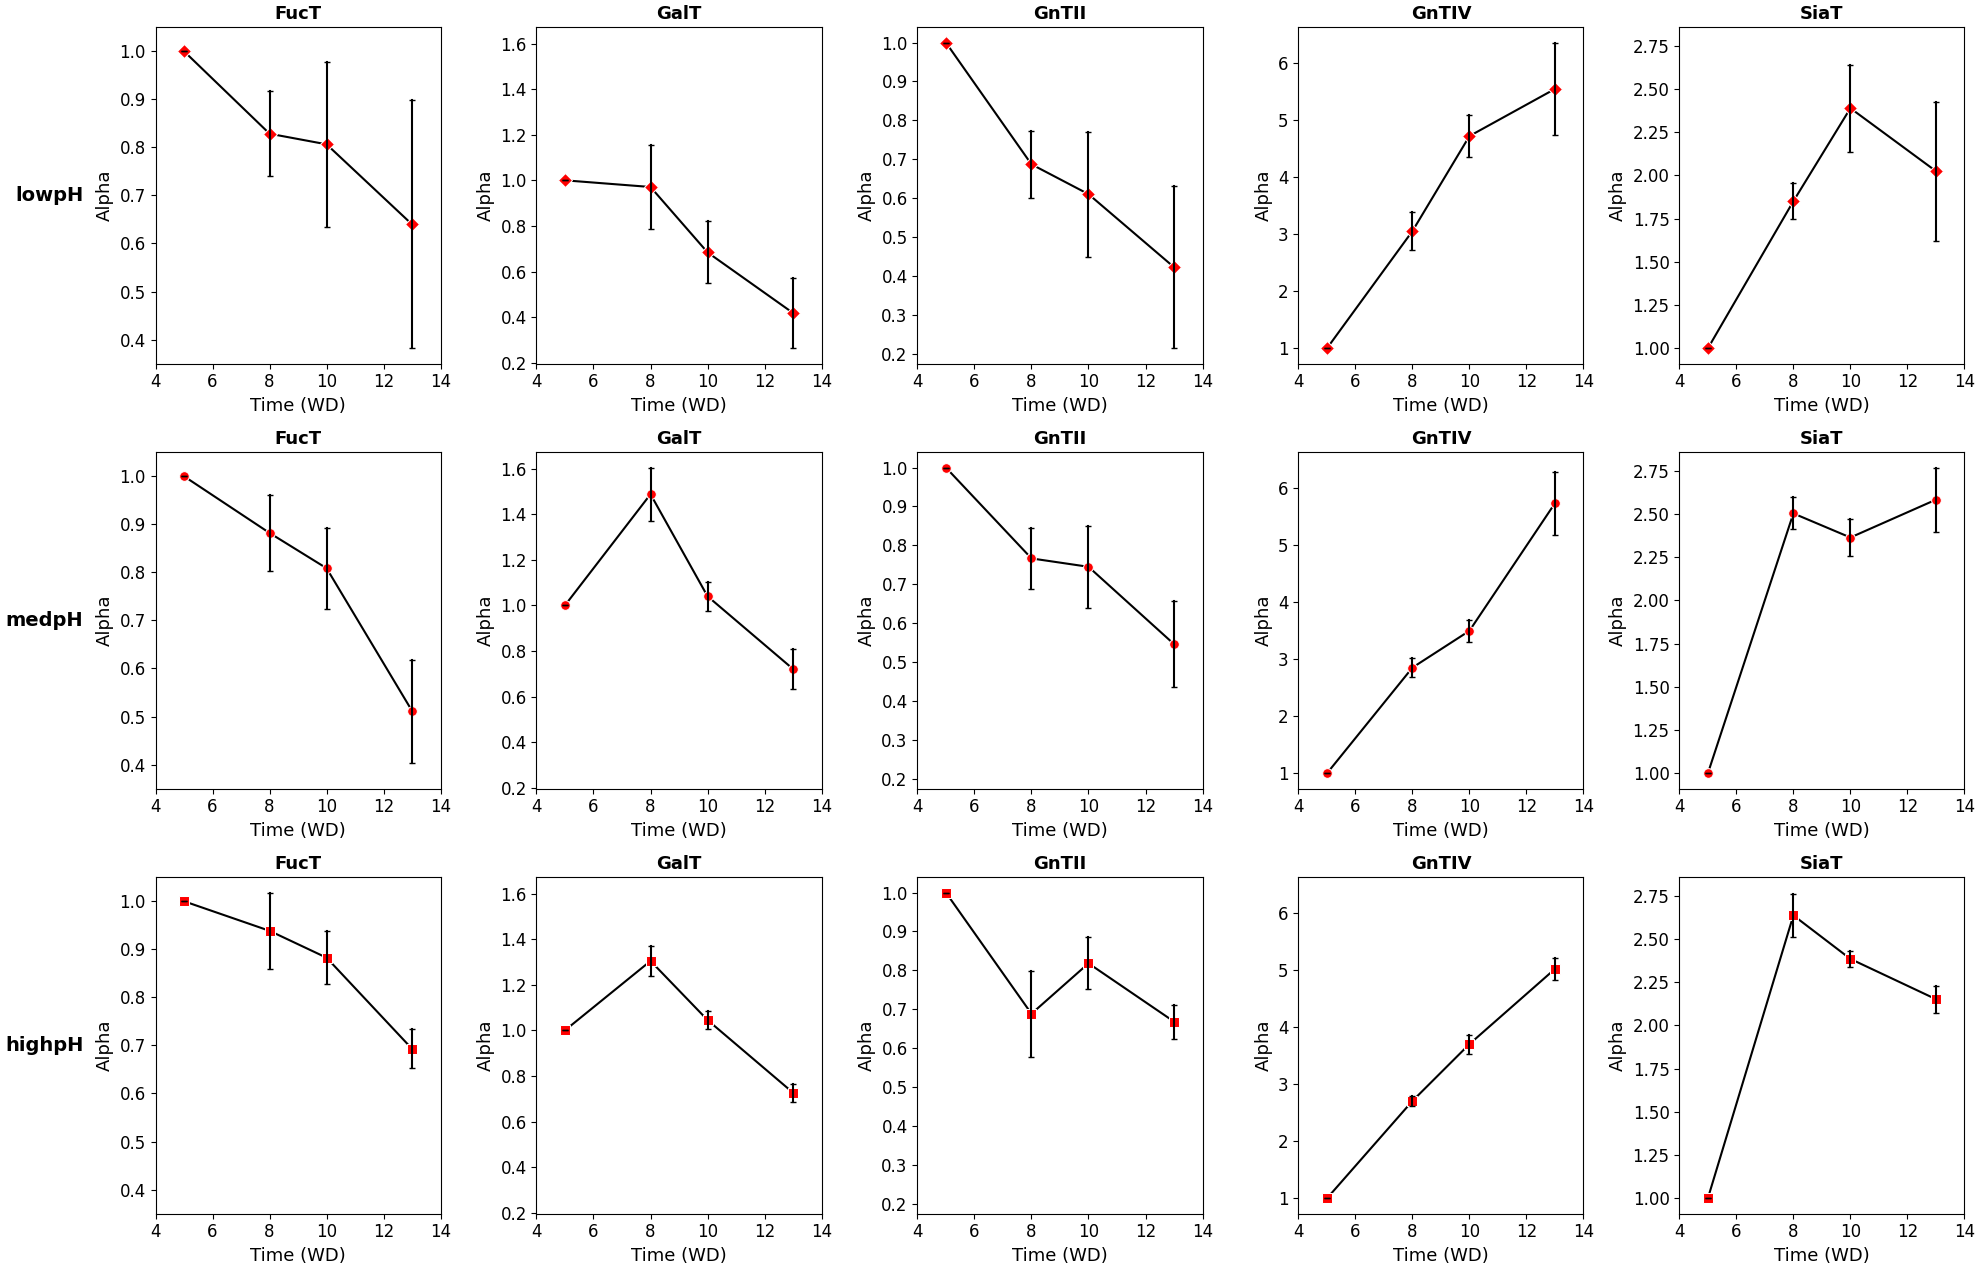

In [95]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'alpha')
orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'alpha')
orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'alpha')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
nrows = len(pH_scales)
ncols = len(meas_cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4.3), layout='tight', sharey='col', sharex=False)

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 - ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c='k', label="Alpha", ax=axes[i, j],
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor='r',
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        axes[i, j].get_legend().remove()
        axes[i, j].set_xlabel(axes[i, j].get_xlabel(), fontsize=13)
        axes[i, j].set_ylabel('Alpha', fontsize=13)
        axes[i, j].set_title(meas_col, fontsize=13, fontweight='bold')
        axes[i, j].set_xlim((4, 14))
        plt.setp(axes[i, j].get_xticklabels(), fontsize=12)
        plt.setp(axes[i, j].get_yticklabels(), fontsize=12)

for ax, row in zip(axes[:, 0], pH_scales):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', fontweight='bold')

### Betas

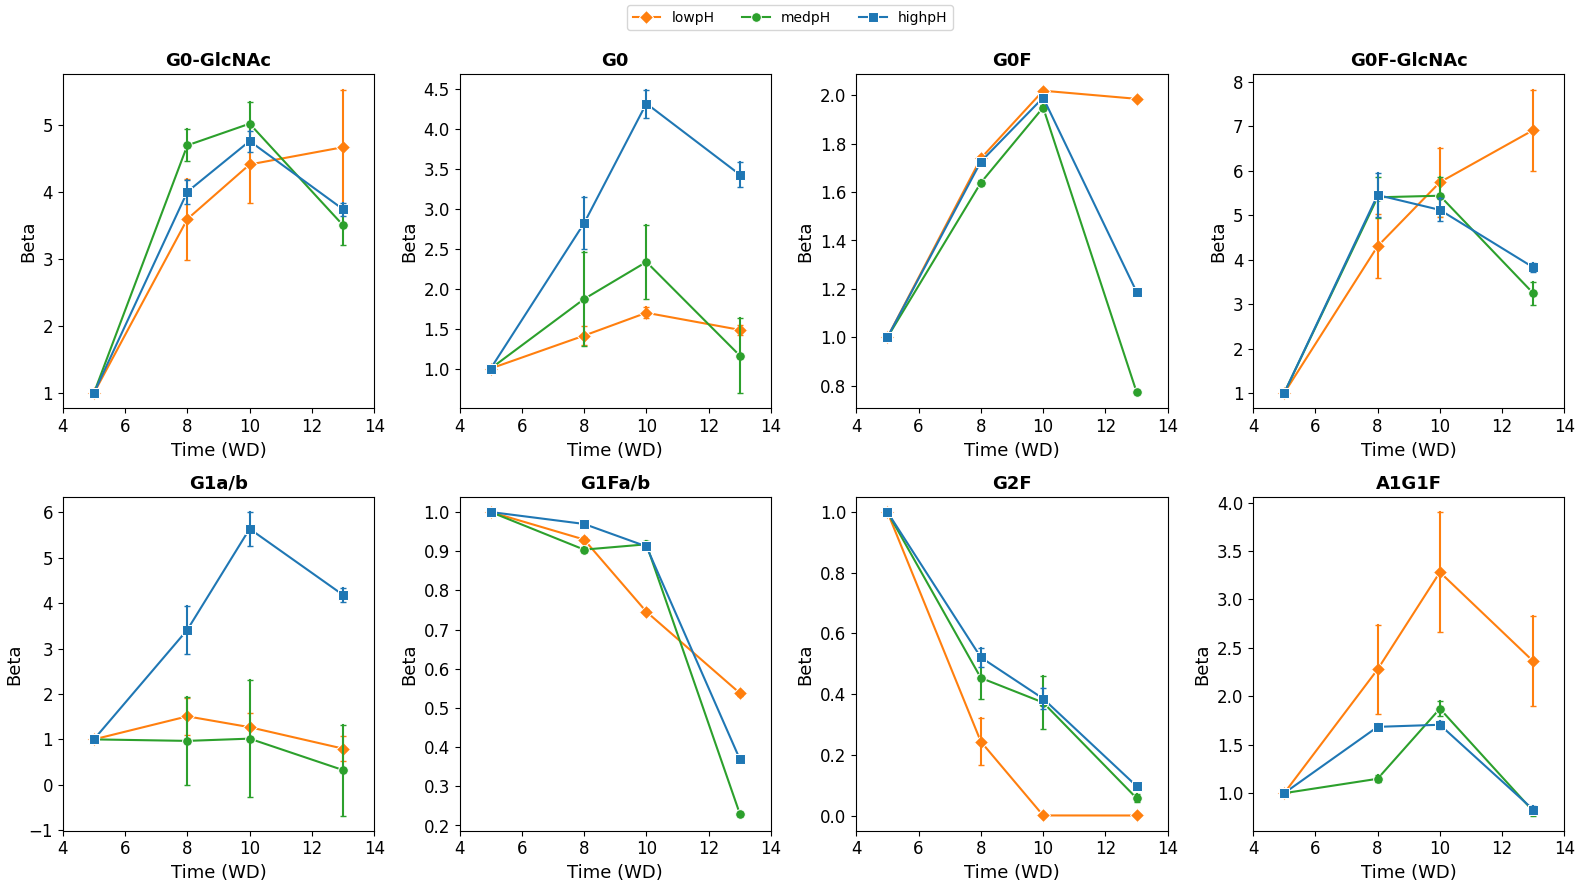

In [96]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'beta')
orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'beta')
orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'beta')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
nrows = 2
ncols = np.ceil(len(meas_cols)/nrows).astype(int)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4.3), layout='tight', sharey=False, sharex=False)
axes = axes.ravel()

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 - ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c=pH_colors[pH_scale], label=pH_scale, ax=axes[j],
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor=pH_colors[pH_scale],
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        if i<len(pH_scales):
            axes[j].get_legend().remove()
        axes[j].set_xlabel(axes[j].get_xlabel(), fontsize=13)
        axes[j].set_ylabel('Beta', fontsize=13)
        axes[j].set_title(meas_col, fontsize=13, fontweight='bold')
        axes[j].set_xlim((4, 14))
        plt.setp(axes[j].get_xticklabels(), fontsize=12)
        plt.setp(axes[j].get_yticklabels(), fontsize=12)

handles, labels = axes[len(meas_cols)-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1), frameon=True)

### Gamma

In [97]:
qprod = res_data_lowpH.get_params_n(top_n_results_lowpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)

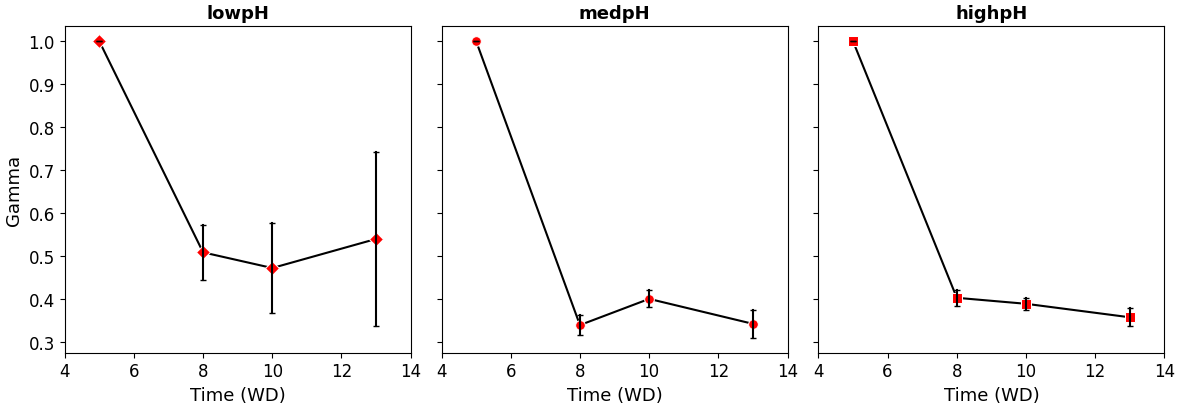

In [98]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'gamma')
# qprod = res_data_lowpH.get_params_n(top_n_results_lowpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['lowpH'] = orig_data_all['lowpH'].mul(qprod_ratio, axis='index')

orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'gamma')
# qprod = res_data_medpH.get_params_n(top_n_results_medpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['medpH'] = orig_data_all['medpH'].mul(qprod_ratio, axis='index')

orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'gamma')
# qprod = res_data_highpH.get_params_n(top_n_results_highpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['highpH'] = orig_data_all['highpH'].mul(qprod_ratio, axis='index')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
ncols = len(pH_scales)
nrows = len(meas_cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4.3), layout='tight', sharey=True, sharex=False)

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 + ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c='k', label=pH_scale, ax=axes[i],
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor='r',
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        axes[i].get_legend().remove()
        axes[i].set_xlabel(axes[0].get_xlabel(), fontsize=13)
        axes[i].set_ylabel('Gamma', fontsize=13)
        axes[i].set_title(pH_scale, fontsize=13, fontweight='bold')
        axes[i].set_xlim((4, 14))
        plt.setp(axes[i].get_xticklabels(), fontsize=12)
        plt.setp(axes[i].get_yticklabels(), fontsize=12)

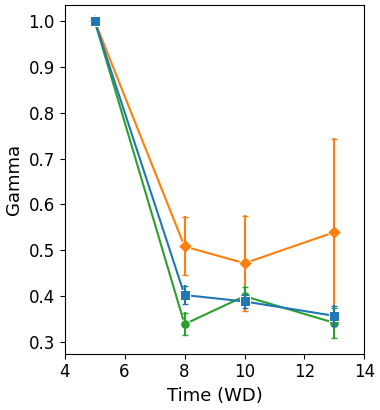

In [99]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'gamma')
# qprod = res_data_lowpH.get_params_n(top_n_results_lowpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['lowpH'] = orig_data_all['lowpH'].mul(qprod_ratio, axis='index')

orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'gamma')
# qprod = res_data_medpH.get_params_n(top_n_results_medpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['medpH'] = orig_data_all['medpH'].mul(qprod_ratio, axis='index')

orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'gamma')
# qprod = res_data_highpH.get_params_n(top_n_results_highpH, 'entry_flux').rename(columns={'Man7': 'gamma'})
# qprod_ratio = qprod.div(qprod.xs(5, level=1), level=0)
# orig_data_all['highpH'] = orig_data_all['highpH'].mul(qprod_ratio, axis='index')

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
ncols = len(pH_scales)
nrows = len(meas_cols)
fig, axes = plt.subplots(nrows, 1, figsize=(1*4, nrows*4.3), layout='tight', sharey=True, sharex=False)

for i, pH_scale in enumerate(pH_scales):
    # print(0.5 + ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.lineplot(data=orig_data_all[pH_scale], x=time_col, y=meas_col, c=pH_colors[pH_scale], label=pH_scale, ax=axes,
                     errorbar='sd', marker=pH_markers[pH_scale], markersize=7, markerfacecolor=pH_colors[pH_scale],
                     err_style='bars', err_kws={'capsize': 2.5}, estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values)
        axes.get_legend().remove()
        axes.set_xlabel(axes.get_xlabel(), fontsize=13)
        axes.set_ylabel('Gamma', fontsize=13)
        # axes.set_title(pH_scale, fontsize=13, fontweight='bold')
        axes.set_xlim((4, 14))
        plt.setp(axes.get_xticklabels(), fontsize=12)
        plt.setp(axes.get_yticklabels(), fontsize=12)

### Reference Fluxes

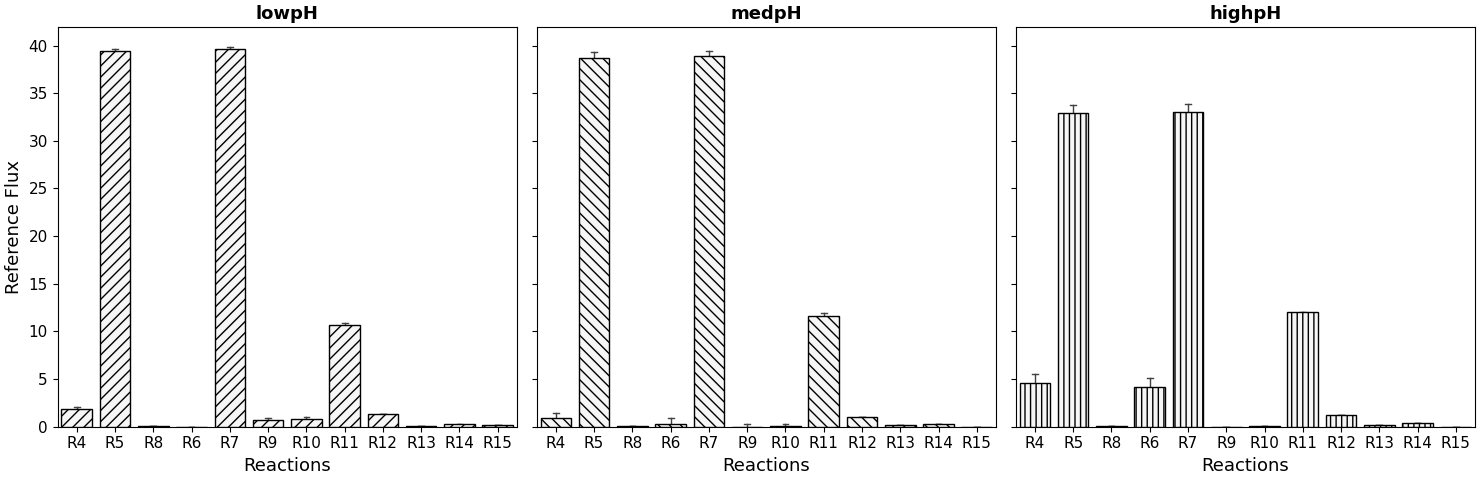

In [100]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n(top_n_results_lowpH, 'v_ref').rename_axis(index=['trial', 'Reactions'])
orig_data_all['medpH'] = res_data_medpH.get_params_n(top_n_results_medpH, 'v_ref').rename_axis(index=['trial', 'Reactions'])
orig_data_all['highpH'] = res_data_highpH.get_params_n(top_n_results_highpH, 'v_ref').rename_axis(index=['trial', 'Reactions'])

meas_cols = orig_data_all['lowpH'].columns.tolist()
time_col = 'Time (WD)'
ncols = len(pH_scales)
nrows = len(meas_cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5), layout='tight', sharey=True, sharex=False)
temp = []
for i, pH_scale in enumerate(pH_scales):
    # print(0.5 + ((i-1) / nrows))
    for j, meas_col in enumerate(meas_cols):
        sns.barplot(data=orig_data_all[pH_scale], x='Reactions', y=meas_col, fill=True, facecolor='#F7F6F6', edgecolor='k', ax=axes[i],
                    capsize=0.15, linewidth=1, errorbar='sd', err_kws={'linewidth': 1}, hatch=pH_hatch_patterns[pH_scale], zorder=10,
                    estimator=lambda x: x.xs(top_results_pH[pH_scale], level=0).values[0])
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=13)
        axes[i].set_ylabel('Reference Flux', fontsize=13)
        axes[i].set_title(pH_scale, fontsize=13, fontweight='bold')
        plt.setp(axes[i].get_xticklabels(), fontsize=11)
        plt.setp(axes[i].get_yticklabels(), fontsize=11)
        temp.append(axes[i].get_ylim()[1])

for ax in axes:
    ax.set_ylim(bottom=0, top=max(temp))

### Secreted Fluxes

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


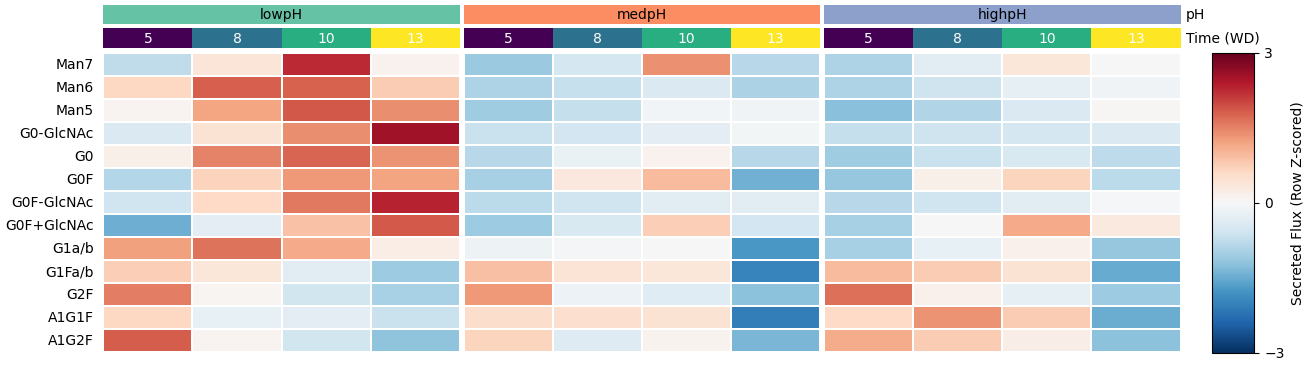

In [111]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n([top_results_pH['lowpH']], 'secreted_flux')
orig_data_all['medpH'] = res_data_medpH.get_params_n([top_results_pH['medpH']], 'secreted_flux')
orig_data_all['highpH'] = res_data_highpH.get_params_n([top_results_pH['highpH']], 'secreted_flux')
all_secreted_fluxes = pd.concat(orig_data_all, names=['pH_condition']).droplevel(level=1, axis='index')

df = all_secreted_fluxes.T
df_meta = df.columns.to_frame(name=['pH', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'pH': pch.anno_simple(df_meta['pH'], cmap='Set2', add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
# df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Secreted Flux (Row Z-scored)', cmap='RdBu_r', vmin=-3, vmax=3,
                           z_score=0,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['pH'], col_split_order=df_meta['pH'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

### Internal Flux

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 7.5 mm


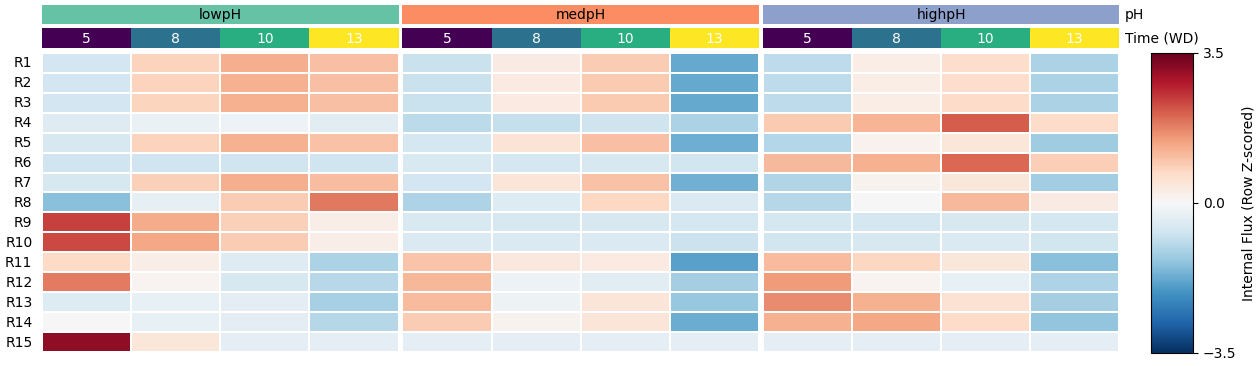

In [114]:
orig_data_all = {}
orig_data_all['lowpH'] = res_data_lowpH.get_params_n([top_results_pH['lowpH']], 'internal_flux')
orig_data_all['medpH'] = res_data_medpH.get_params_n([top_results_pH['medpH']], 'internal_flux')
orig_data_all['highpH'] = res_data_highpH.get_params_n([top_results_pH['highpH']], 'internal_flux')
all_secreted_fluxes = pd.concat(orig_data_all, names=['pH_condition']).droplevel(level=1, axis='index')

df = all_secreted_fluxes.loc[:, ['R'+str(e) for e in np.arange(1, 16)]].T
df_meta = df.columns.to_frame(name=['pH', 't'])
plt.figure(figsize=(14, 4))
top_annotations = {'pH': pch.anno_simple(df_meta['pH'], cmap='Set2', add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_meta['t'], cmap='viridis', add_text=True, height=5)}
# df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Internal Flux (Row Z-scored)', cmap='RdBu_r', vmin=-3.5, vmax=3.5,
                           z_score=0,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False, row_names_side='left',
                           col_split=df_meta['pH'], col_split_order=df_meta['pH'].unique().tolist(), col_split_gap=1,
                           # row_split=df.columns.to_series(), row_split_order=df.columns.unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.01, 0.03, 0.75])

### Perturbation Analysis - All figures in 1

#### Plot Alpha perturbations

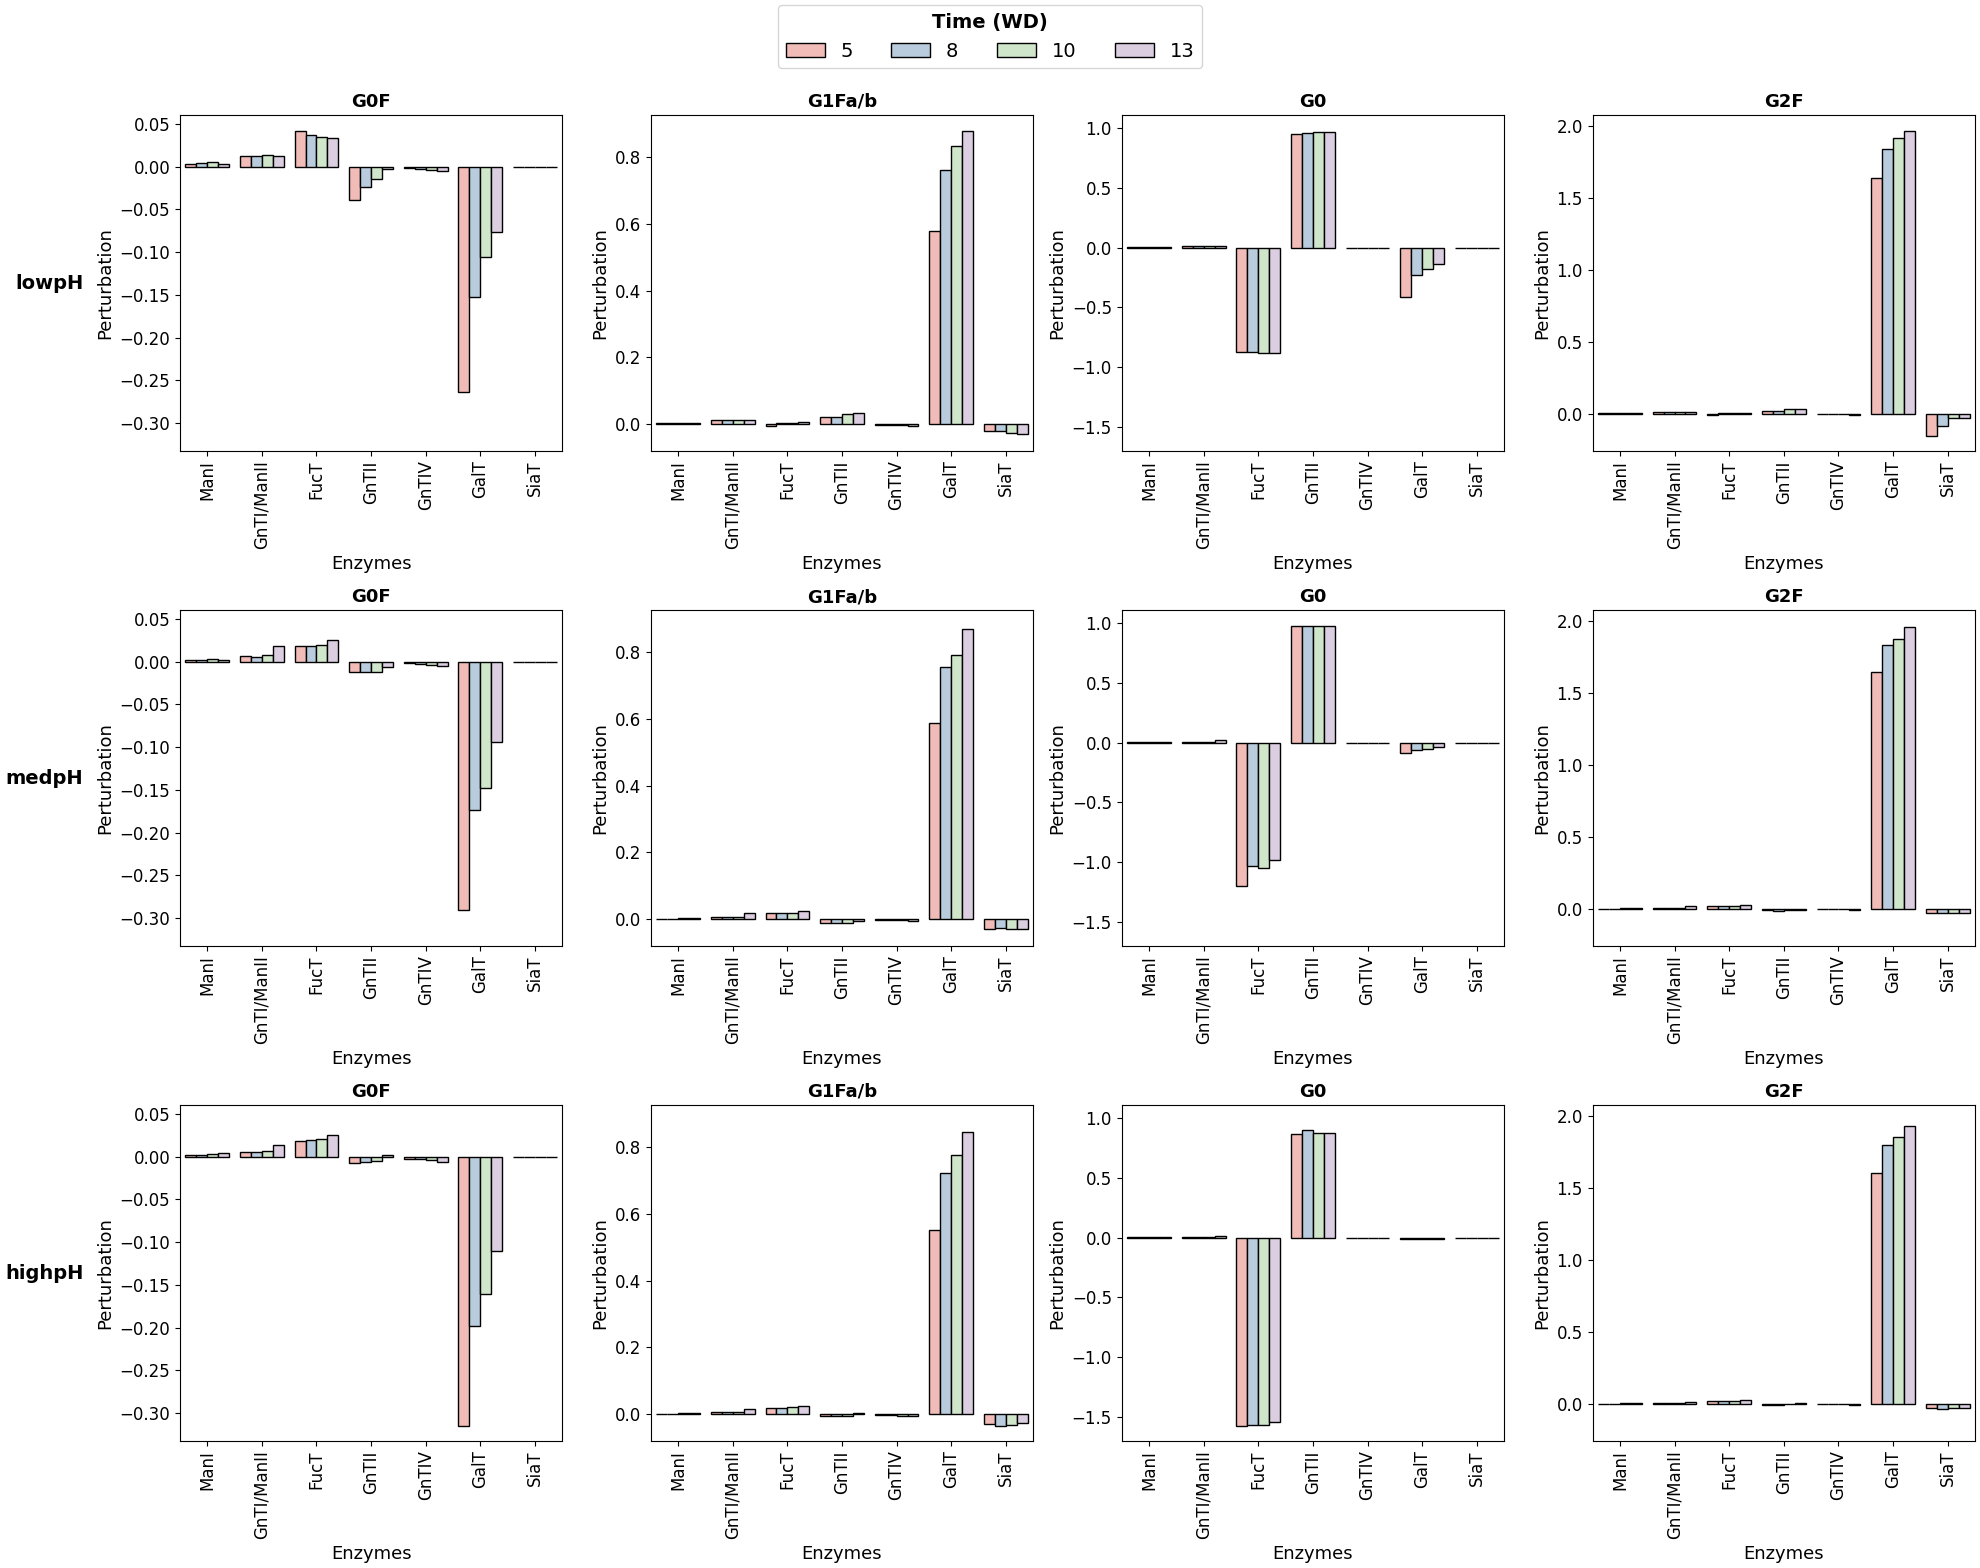

In [101]:
time_col = 'Time (WD)'
meas_cols = ['G0F', 'G1Fa/b', 'G0', 'G2F']  # perturb_pH['highpH'].columns.tolist()
nrows = len(pH_scales)
ncols = len(meas_cols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5), layout='tight', sharey='col', sharex=False)
for i, pH_scale in enumerate(pH_scales):
    for j, meas_col in enumerate(meas_cols):
        sns.barplot(perturb_alpha[pH_scale]['norm_dsecreted_flux'], x='Enzymes', y=meas_col, ax=axes[i, j], hue=time_col,
                    capsize=0.15, fill=True, edgecolor='k', linewidth=1, errorbar='sd', err_kws={'linewidth': 1}, palette='Pastel1')

        axes[i, j].get_legend().remove()
        axes[i, j].set_xlabel(axes[i, j].get_xlabel(), fontsize=13)
        axes[i, j].set_ylabel('Perturbation', fontsize=13)
        axes[i, j].set_title(meas_col, fontsize=13, fontweight='bold')
        plt.setp(axes[i, j].get_xticklabels(), fontsize=12, rotation=90)
        plt.setp(axes[i, j].get_yticklabels(), fontsize=12)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles=handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 1), title=time_col,
           frameon=True, fontsize=14, title_fontproperties={'weight': 'bold', 'size': 14})

for ax, row in zip(axes[:, 0], pH_scales):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', fontweight='bold')

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


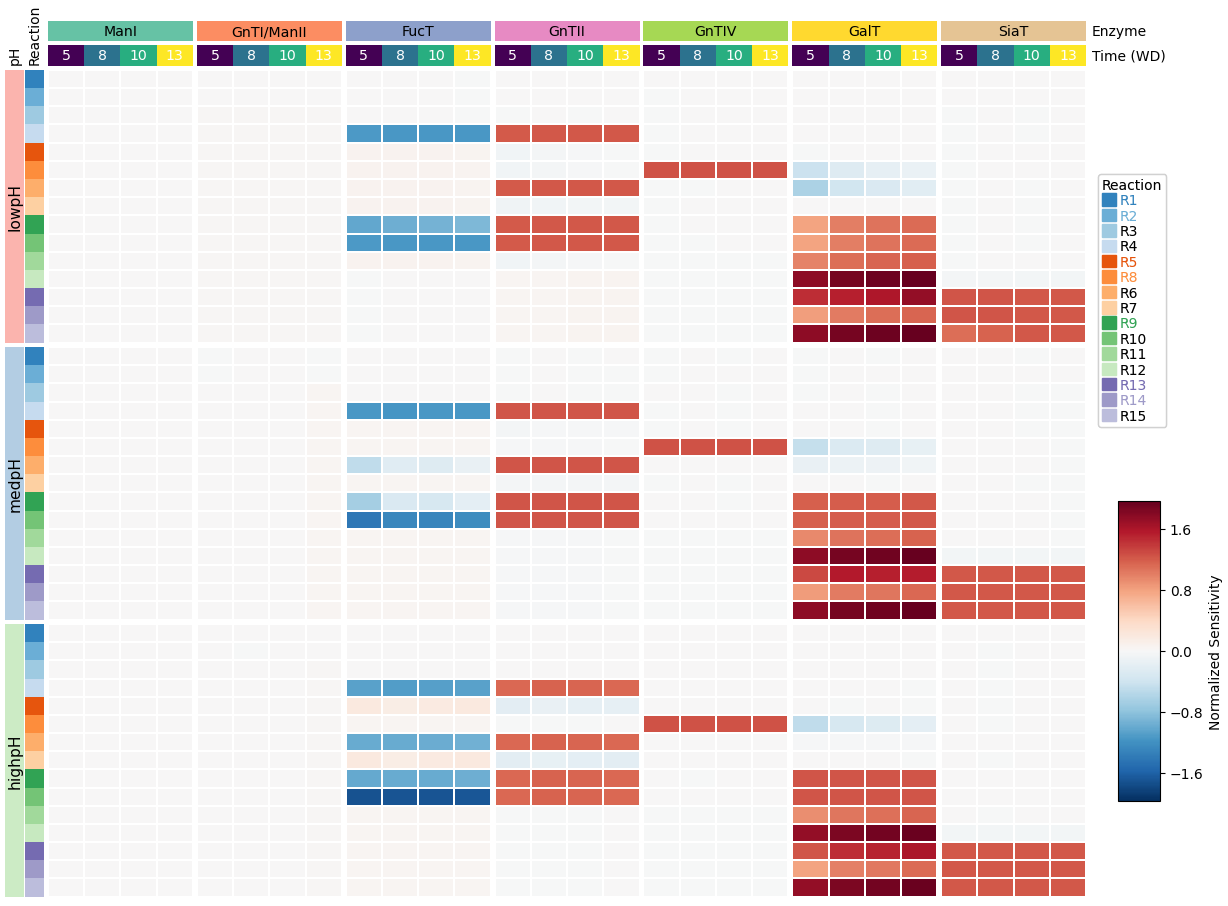

In [115]:
df = pd.concat({pH_scale: perturb_alpha[pH_scale]['norm_dinternal_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['enz', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'rxn'])
plt.figure(figsize=(14, 10))
top_annotations = {'Enzyme': pch.anno_simple(df_col_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Reaction': pch.anno_simple(df_row_meta['rxn'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['enz'], col_split_order=df_col_meta['enz'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)

tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cm.cbars[0].locator = tick_locator
cm.cbars[0].update_ticks()

cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


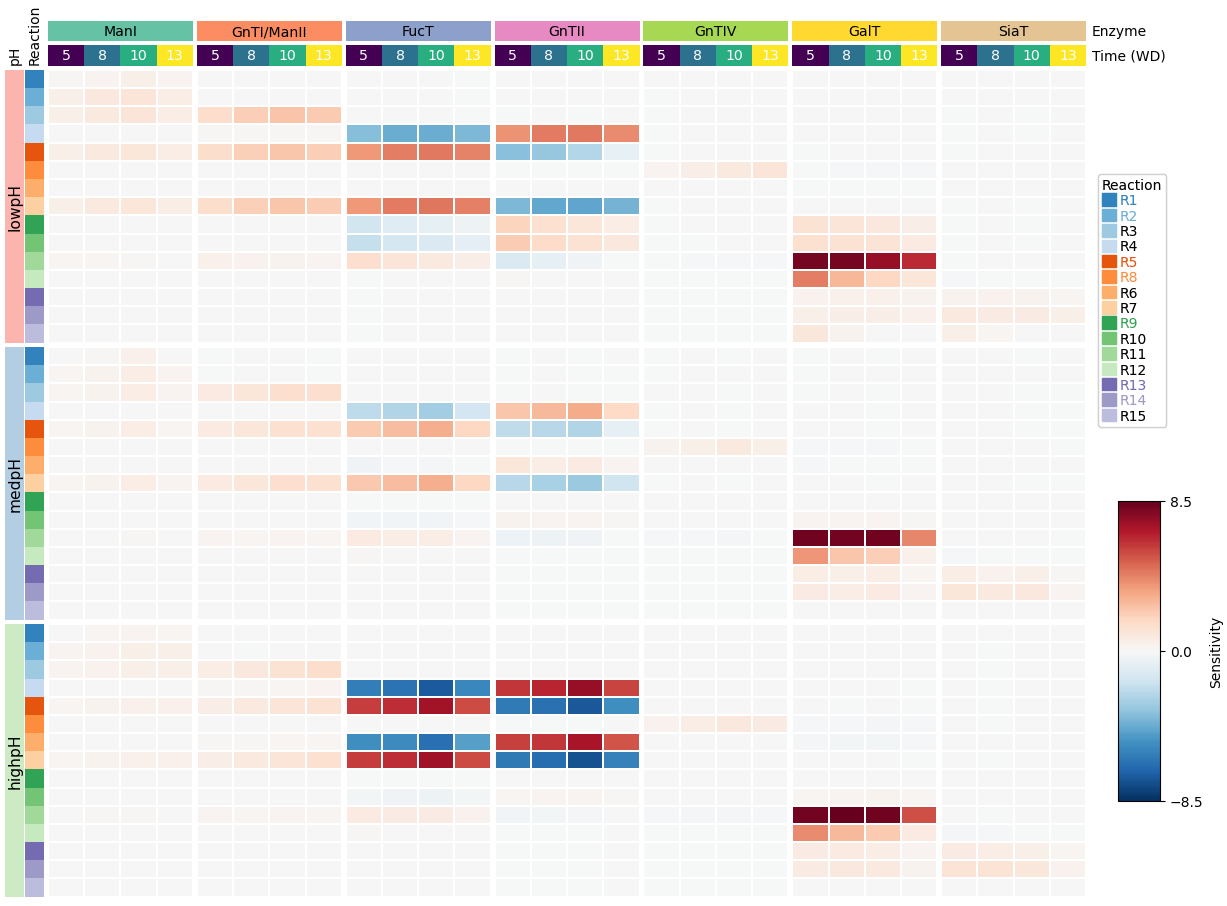

In [103]:
df = pd.concat({pH_scale: perturb_alpha[pH_scale]['dinternal_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['enz', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'rxn'])
plt.figure(figsize=(14, 10))
top_annotations = {'Enzyme': pch.anno_simple(df_col_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Reaction': pch.anno_simple(df_row_meta['rxn'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['enz'], col_split_order=df_col_meta['enz'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 25.930555555555557 mm


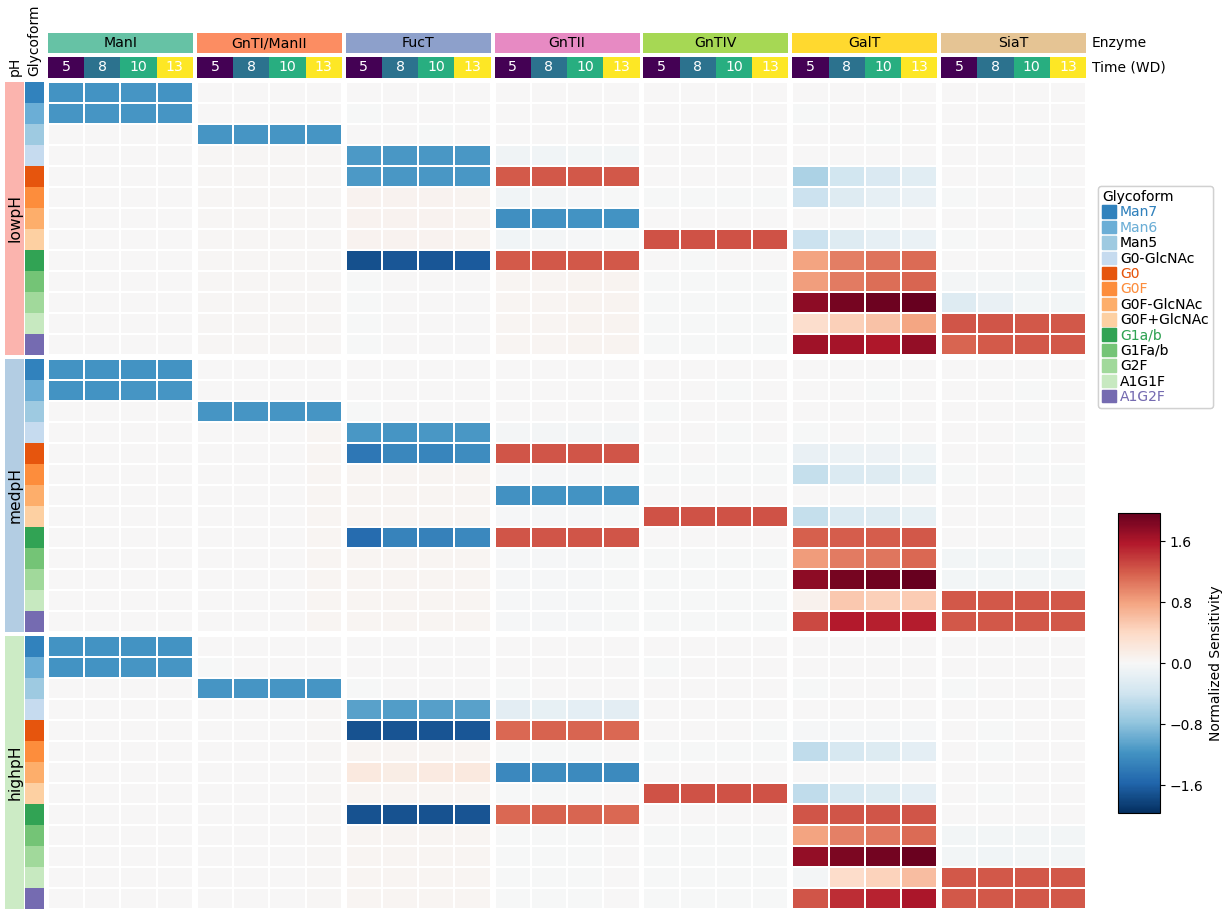

In [116]:
df = pd.concat({pH_scale: perturb_alpha[pH_scale]['norm_dsecreted_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['enz', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(14, 10))
top_annotations = {'Enzyme': pch.anno_simple(df_col_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Glycoform': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1, 
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['enz'], col_split_order=df_col_meta['enz'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)

tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cm.cbars[0].locator = tick_locator
cm.cbars[0].update_ticks()
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 25.930555555555557 mm


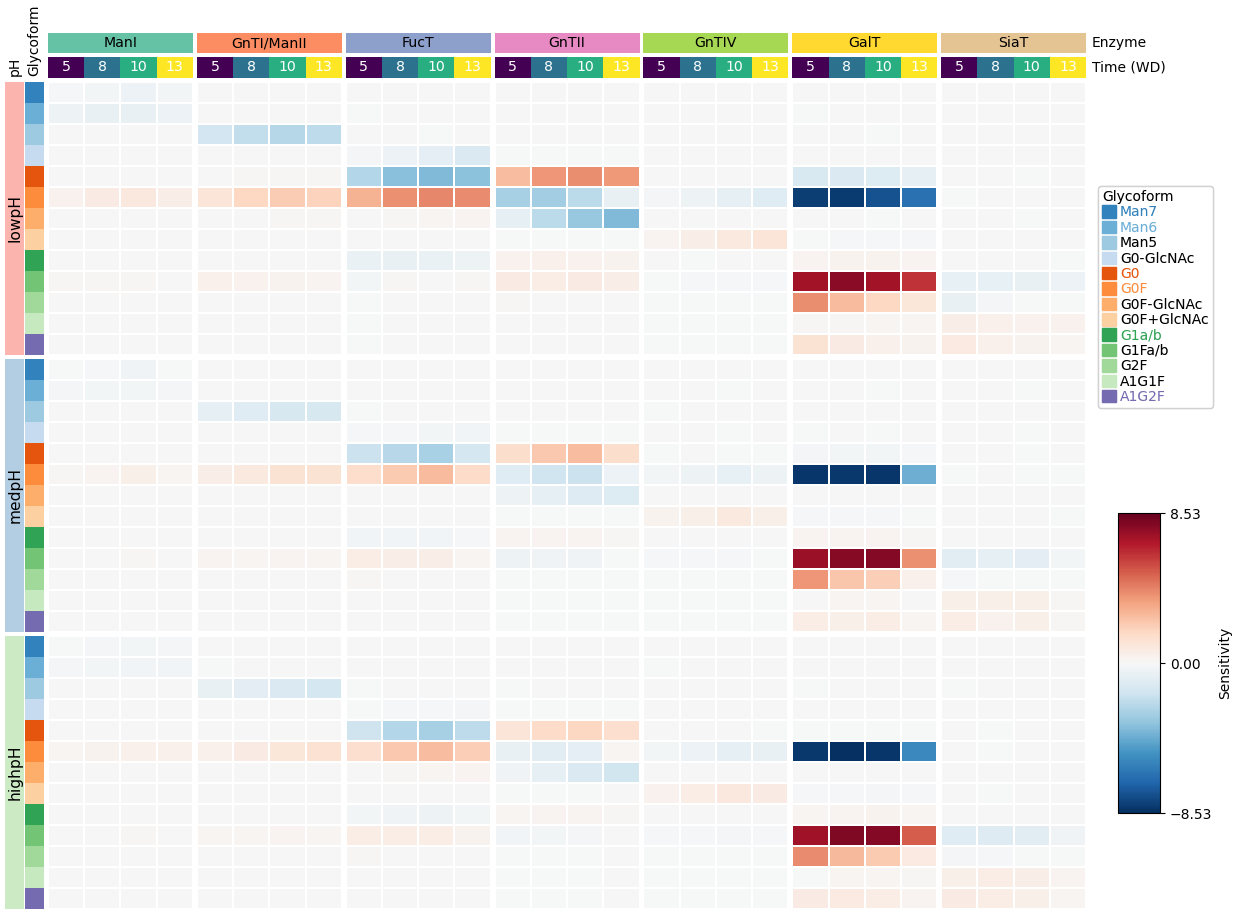

In [105]:
df = pd.concat({pH_scale: perturb_alpha[pH_scale]['dsecreted_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['enz', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(14, 10))
top_annotations = {'Enzyme': pch.anno_simple(df_col_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Glycoform': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['enz'], col_split_order=df_col_meta['enz'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 23.6375 mm


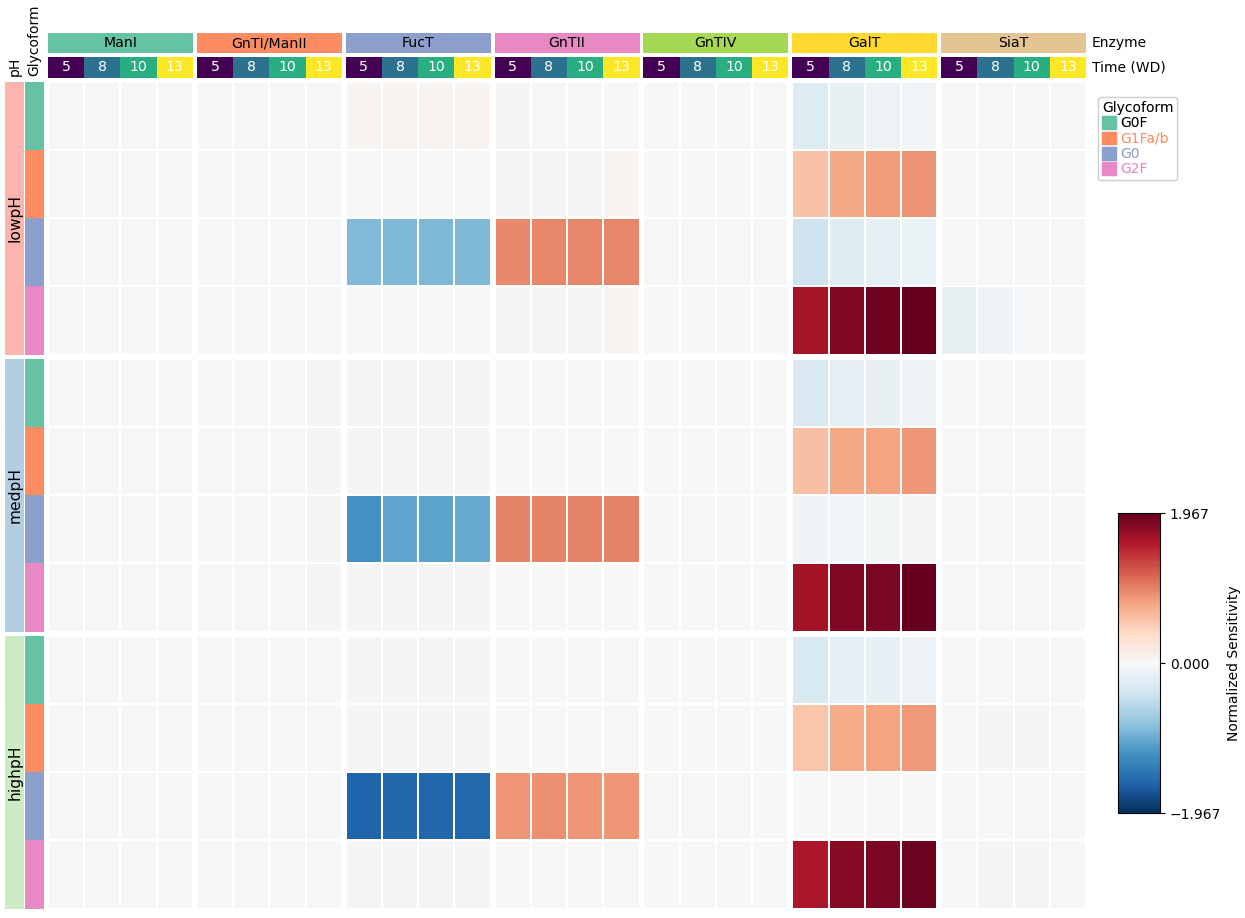

In [106]:
df = pd.concat({pH_scale: perturb_alpha[pH_scale]['norm_dsecreted_flux'][['G0F', 'G1Fa/b', 'G0', 'G2F']] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['enz', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(14, 10))
top_annotations = {'Enzyme': pch.anno_simple(df_col_meta['enz'], colors=color_enz, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Glycoform': pch.anno_simple(df_row_meta['gly'], cmap='Set2', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['enz'], col_split_order=df_col_meta['enz'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[1].ax.set_position([0.92, 0.1, 0.03, 0.3])

#### Plot perturbation of 1 reaction at a time

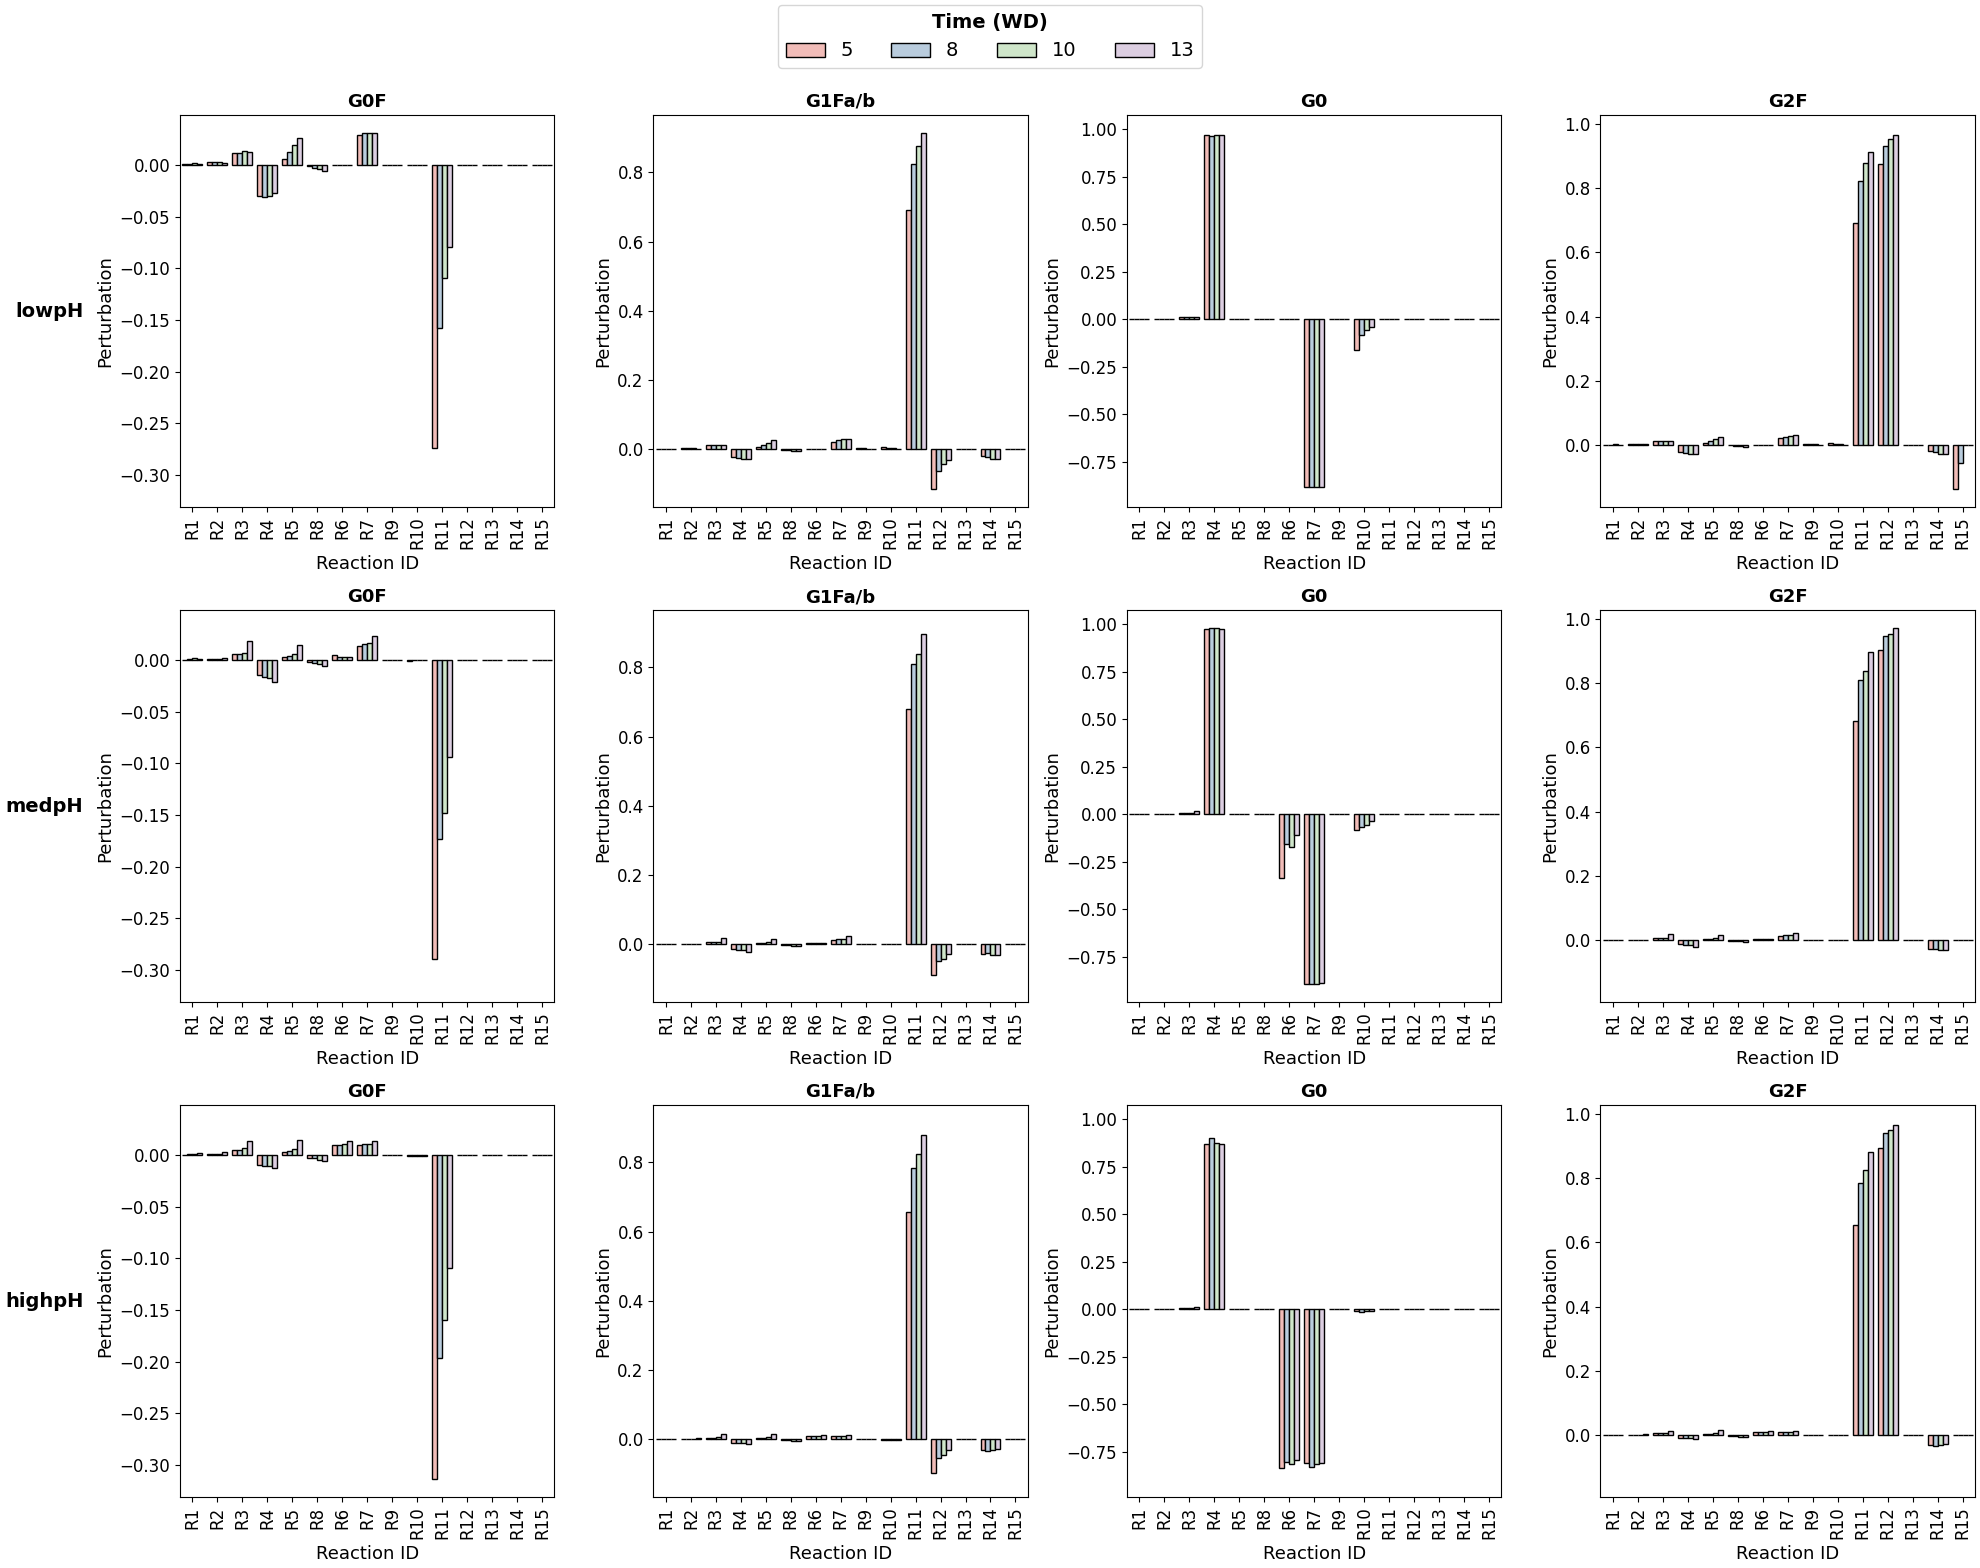

In [105]:
time_col = 'Time (WD)'
meas_cols = ['G0F', 'G1Fa/b', 'G0', 'G2F']
nrows = len(pH_scales)
ncols = len(meas_cols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5), layout='tight', sharey='col', sharex=False)
for i, pH_scale in enumerate(pH_scales):
    for j, meas_col in enumerate(meas_cols):
        sns.barplot(perturb_vref[pH_scale]['norm_dsecreted_flux'], x='Reaction ID', y=meas_col, ax=axes[i, j], hue=time_col,
                    capsize=0.15, fill=True, edgecolor='k', linewidth=1, errorbar='sd', err_kws={'linewidth': 1}, palette='Pastel1')

        axes[i, j].get_legend().remove()
        axes[i, j].set_xlabel(axes[i, j].get_xlabel(), fontsize=13)
        axes[i, j].set_ylabel('Perturbation', fontsize=13)
        axes[i, j].set_title(meas_col, fontsize=13, fontweight='bold')
        plt.setp(axes[i, j].get_xticklabels(), fontsize=12, rotation=90)
        plt.setp(axes[i, j].get_yticklabels(), fontsize=12)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles=handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 1), title=time_col,
           frameon=True, fontsize=14, title_fontproperties={'weight': 'bold', 'size': 14})

for ax, row in zip(axes[:, 0], pH_scales):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', fontweight='bold')

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


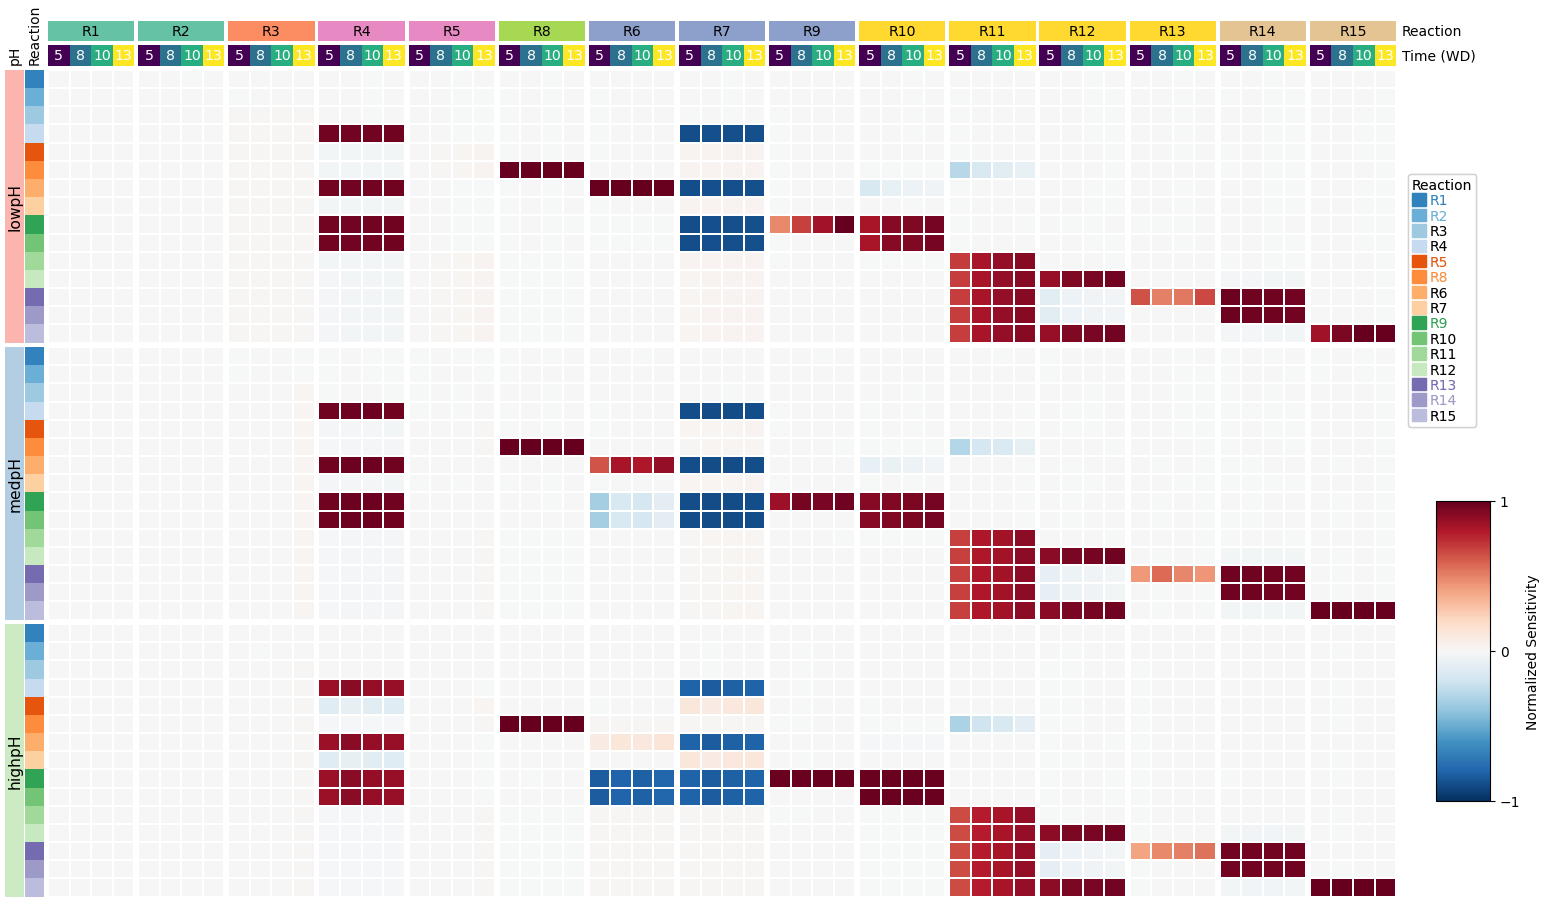

In [106]:
df = pd.concat({pH_scale: perturb_vref[pH_scale]['norm_dinternal_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['rxn', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(18, 10))
top_annotations = {'Reaction': pch.anno_simple(df_col_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Reaction': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True, hgap=0),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['rxn'], col_split_order=df_col_meta['rxn'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


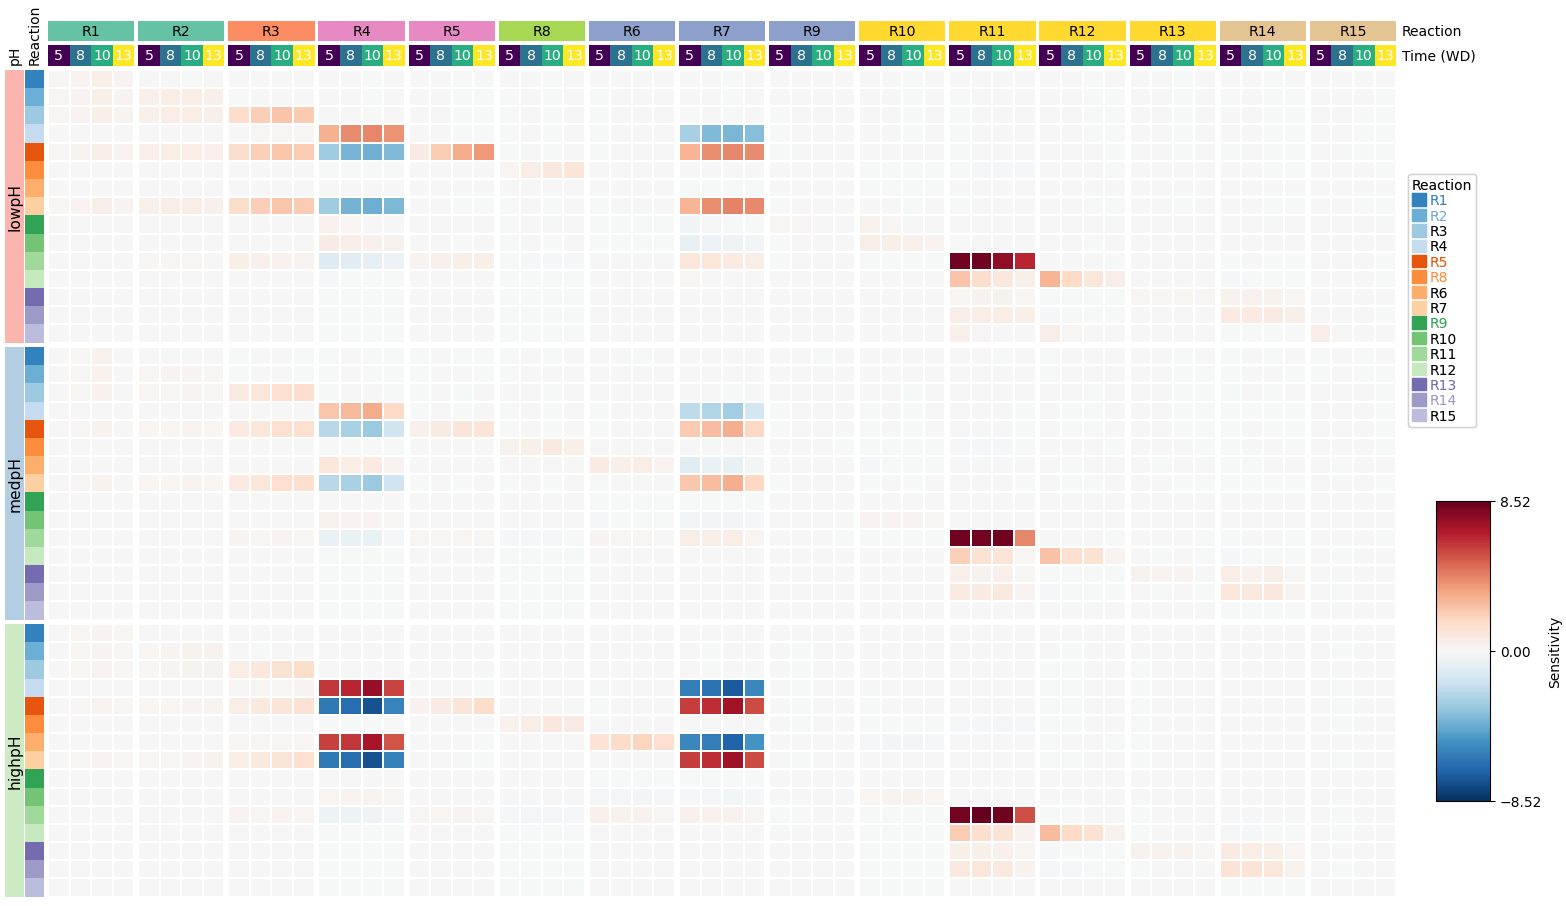

In [107]:
df = pd.concat({pH_scale: perturb_vref[pH_scale]['dinternal_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['rxn', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(18, 10))
top_annotations = {'Reaction': pch.anno_simple(df_col_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Reaction': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True, hgap=0),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['rxn'], col_split_order=df_col_meta['rxn'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 25.930555555555557 mm


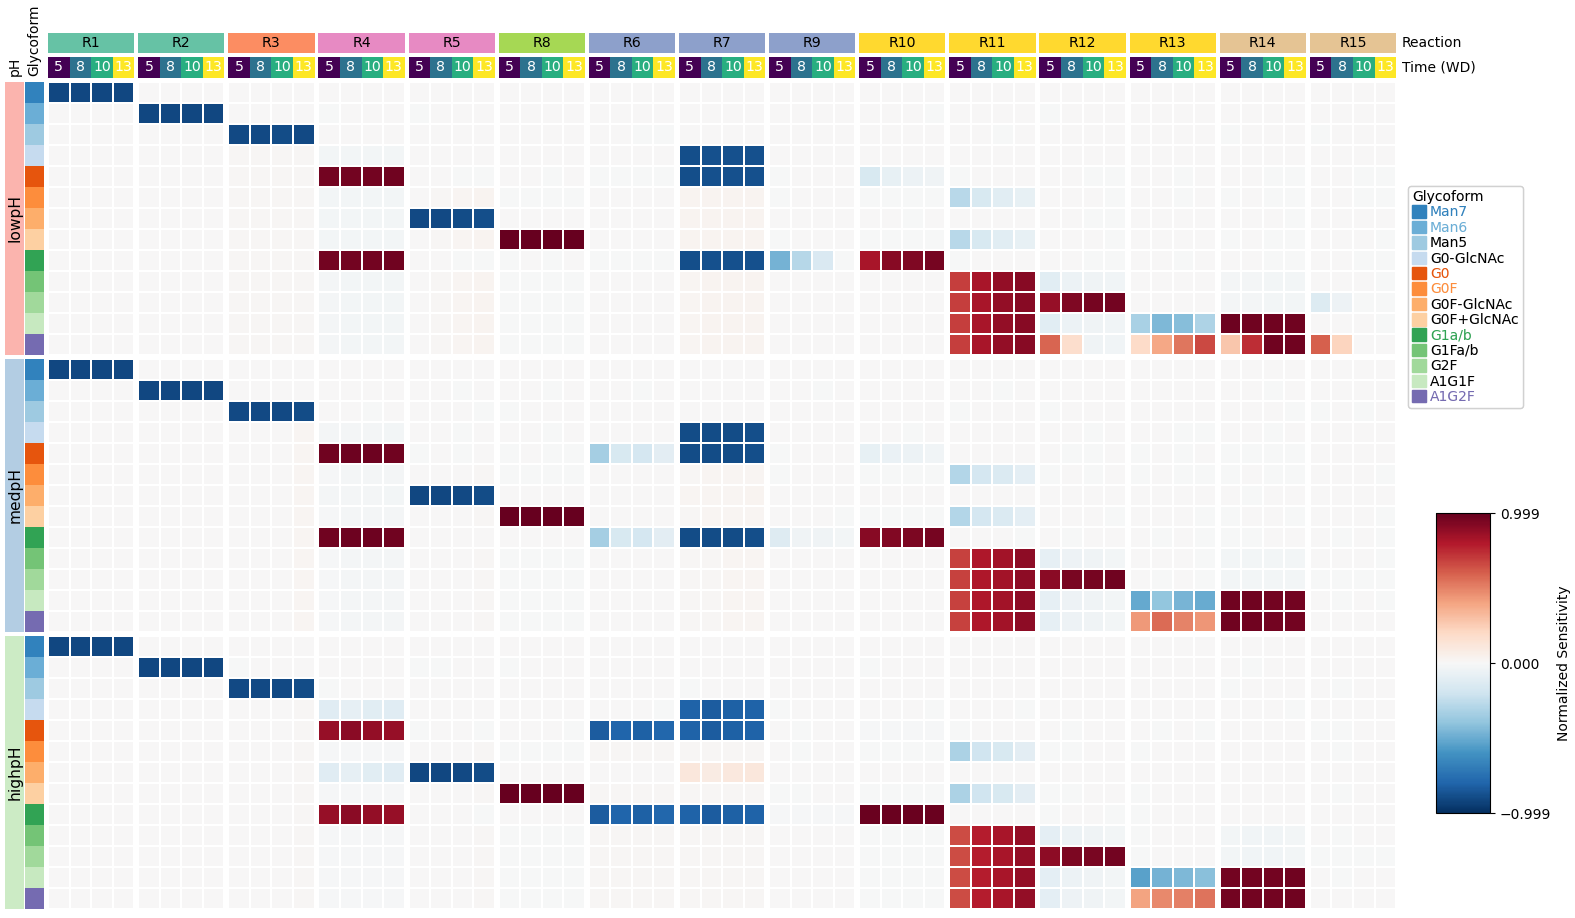

In [108]:
df = pd.concat({pH_scale: perturb_vref[pH_scale]['norm_dsecreted_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['rxn', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(18, 10))
top_annotations = {'Reaction': pch.anno_simple(df_col_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Glycoform': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['rxn'], col_split_order=df_col_meta['rxn'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 25.930555555555557 mm


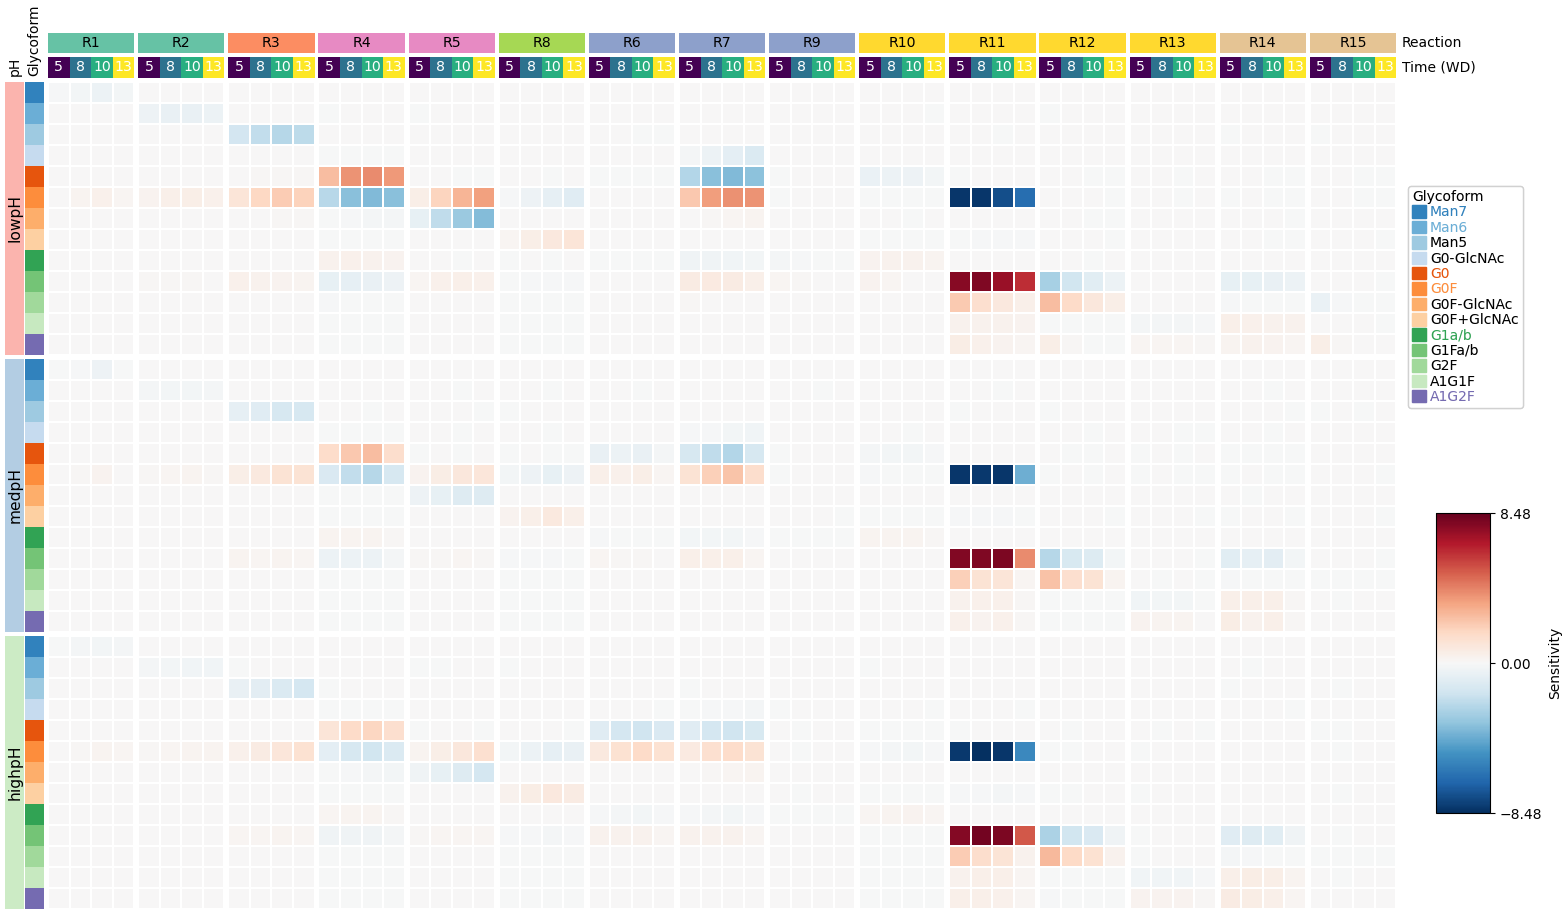

In [109]:
df = pd.concat({pH_scale: perturb_vref[pH_scale]['dsecreted_flux'] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['rxn', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(18, 10))
top_annotations = {'Reaction': pch.anno_simple(df_col_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Glycoform': pch.anno_simple(df_row_meta['gly'], cmap='tab20c', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
def _forward(x): return np.sign(x)*np.log1p(np.abs(x))
def _inverse(x): return np.sign(x)*np.expm1(np.abs(x))
n1 = mpl.colors.FuncNorm((_forward, _inverse), vmin=-df_range, vmax=df_range)
cm = pch.ClusterMapPlotter(data=df, label='Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range, norm=n1,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['rxn'], col_split_order=df_col_meta['rxn'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[0].ax.set_position([0.92, 0.1, 0.03, 0.3])

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 21.344444444444445 mm


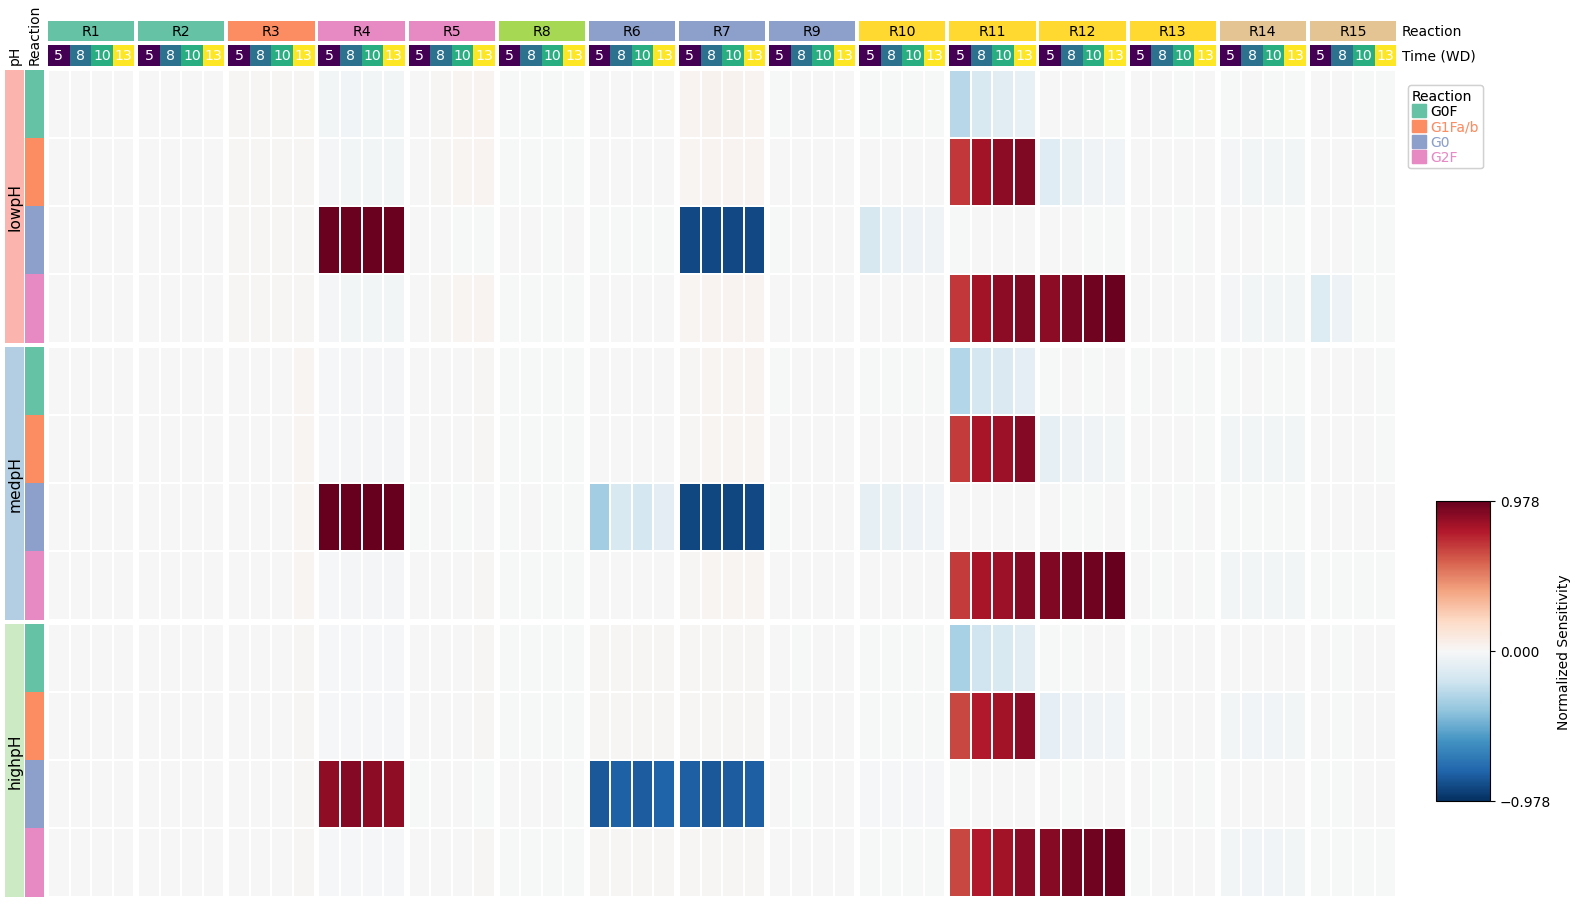

In [110]:
df = pd.concat({pH_scale: perturb_vref[pH_scale]['norm_dsecreted_flux'][['G0F', 'G1Fa/b', 'G0', 'G2F']] for pH_scale in pH_scales}, axis=1).T
df_col_meta = df.columns.to_frame(name=['rxn', 't'])
df_row_meta = df.index.to_frame(name=['pH', 'gly'])
plt.figure(figsize=(18, 10))
top_annotations = {'Reaction': pch.anno_simple(df_col_meta['rxn'], colors=color_rxn, add_text=True, height=5),
                   'Time (WD)': pch.anno_simple(df_col_meta['t'], cmap='viridis', add_text=True, height=5)}
left_annotations = {'pH': pch.anno_simple(df_row_meta['pH'], cmap='Pastel1', add_text=True, height=5, legend=False),
                    'Reaction': pch.anno_simple(df_row_meta['gly'], cmap='Set2', add_text=False, height=5, legend=True)}
df_range = np.max([np.abs(df.min(axis=None)), np.abs(df.max(axis=None))])
cm = pch.ClusterMapPlotter(data=df, label='Normalized Sensitivity', cmap='RdBu_r', vmin=-df_range, vmax=df_range,
                           z_score=None,
                           xticklabels=False, yticklabels=True,
                           top_annotation=pch.HeatmapAnnotation(**top_annotations, axis=1, hgap=1, plot_legend=False),
                           left_annotation=pch.HeatmapAnnotation(**left_annotations, axis=0, vgap=1, plot_legend=True, hgap=0),
                           row_cluster=False, col_cluster=False,
                           row_dendrogram=False, col_dendrogram=False,
                           show_rownames=False, show_colnames=False, row_names_side='right',
                           col_split=df_col_meta['rxn'], col_split_order=df_col_meta['rxn'].unique().tolist(), col_split_gap=1,
                           row_split=df_row_meta['pH'], row_split_order=df_row_meta['pH'].unique().tolist(), row_split_gap=1,
                           linecolor='white', linewidth=0.05)
cm.cbars[1].ax.set_position([0.92, 0.1, 0.03, 0.3])

# Save results as Excel files

In [101]:
results_sel = {}
results_sel['highpH'] = res_data_highpH.curr_result.copy()
results_sel['medpH'] = res_data_medpH.curr_result.copy()
results_sel['lowpH'] = res_data_lowpH.curr_result.copy()
for i, e in enumerate(pH_scales):
    results_sel[e]['enzyme_perturb'] = perturb_alpha[e]['dsecreted_flux'].copy()
    results_sel[e]['rxn_perturb'] = perturb_vref[e]['dsecreted_flux'].copy()

In [66]:
for i, e in enumerate(pH_scales):
    file_path = os.path.join(mainDir, 'results', 'Lee et al', e+'_fitfracs_fitbeta_result.xlsx')
    with pd.ExcelWriter(file_path) as writer:
        for j, s in enumerate(['objectives', 'pred_glycofracs', 'orig_glycofracs', 'alpha', 'beta',
                               'gamma', 'v_ref', 'secreted_flux', 'internal_flux',
                               'entry_flux', 'enzyme_perturb', 'rxn_perturb']):
            if s == 'objectives':
                pd.Series(results_sel[e][s]).to_excel(writer, sheet_name=s)
            else:
                results_sel[e][s].to_excel(writer, sheet_name=s)